In [5]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import random
from numpy import array
import math
from matplotlib.pyplot import scatter
%matplotlib notebook

In [6]:
def tanh(x, derivative=False):
    if (derivative == True):
        return (1 - (np.tanh(x) ** 2))
    return np.tanh(x)

def relu(x, derivative=False):
    if (derivative == True):
        return 1. * (x > 0)
    return x * (x > 0)

def sigmoid(x, derivative=False):
    sigm = 1. / (1. + np.exp(-x))
    if derivative:
        return sigm * (1. - sigm)
    return sigm
    
def activation_function(x, derivative=False):
    return relu(x, derivative)

In [7]:
class Autoencoder:
    
    def __init__(self, neuron_list):
        self.layer_count = len(neuron_list)
        self.neuron_list = neuron_list
        #self.biases = [np.random.randn(y, 1) for y in neuron_list[1:]]
        self.weights = [abs(np.random.randn(y, x)) / 4 for x, y in zip(neuron_list[:-1], neuron_list[1:])] 
        self.biases = [np.zeros((y, 1), dtype=float) for y in neuron_list[1:]]
        #self.weights = [np.full((y, x),0.2,dtype=float) for x, y in zip(neuron_list[:-1], neuron_list[1:])] 
        self.activations = [np.zeros((x)) for x in neuron_list]
        self.deltas = [np.zeros((x)) for x in neuron_list]
        self.learning_rate = 0.1
        
    def forward_propogation(self, x):
        self.activations[0] = x      
        for i in range(self.layer_count-1):
            self.activations[i+1] = activation_function(np.dot(self.weights[i], self.activations[i])+self.biases[i])
        return self.activations[-1]
    
    def compute_deltas(self,output_labels):
        # Compute last layers' activations
        for i in range(self.neuron_list[-1]):
            self.deltas[-1][i] = 2*activation_function(self.activations[-1][i],True)*(output_labels[i]-activation_function(self.activations[-1][i]))            
        
        # Compute all deltas in all layers
        # l is layer starting from L-1, ending at 1
        for l in range(self.layer_count-2, 0, -1):
            # i is representing neuron count in the layer l
            for i in range(len(self.activations[l])):
                # j is representing next layer's neurons
                for j in range(len(self.activations[l+1])):
                    self.deltas[l][i] = self.deltas[l+1][j]*self.weights[l][j][i]*activation_function(self.activations[l][i],True)
                 
    def back_propogation(self, output_labels):
        # Compute deltas
        self.compute_deltas(output_labels)
        # Update weights 
        # l is layer starting from L-1, ending at 1
        for l in range(0,self.layer_count-1):
            # i is representing neuron count in the layer l
            for i in range(len(self.activations[l])):
                # j is representing next layer's neurons
                for j in range(len(self.activations[l+1])):
                    self.weights[l][j][i] += self.learning_rate*self.deltas[l+1][j]*self.activations[l][i]

                 
    def train(self, x, y, epoch):
        error = []
       
        for e in range(epoch):
            pass_error = 0
            print("Epoch: " + str(e))
            for i in range(len(x)):
                estimation = self.forward_propogation(x[i])
                print("Est: " + str(np.transpose(estimation)))
                print("Out: " + str(np.transpose(y[i])))
                print("")
                pass_error += np.sum((estimation - y[i])**2) / np.sum(y[i] **2) * 100 
                self.back_propogation(y[i])
            pass_error = pass_error / len(x)
            error.append(pass_error / len(x))
        return error          

In [8]:
'''
np.set_printoptions(suppress=True)
neuron_list = [4,2,4]
nn = Autoencoder(neuron_list)
# Give input in nx1 dimension
inp = []
for i in range(400):
    inp.append(np.transpose([abs(np.random.normal(0, 1, 4))]))

err = nn.train(inp,inp, 500)
plt.plot(err)
plt.show()
print(err)
'''

'\nnp.set_printoptions(suppress=True)\nneuron_list = [4,2,4]\nnn = Autoencoder(neuron_list)\n# Give input in nx1 dimension\ninp = []\nfor i in range(400):\n    inp.append(np.transpose([abs(np.random.normal(0, 1, 4))]))\n\nerr = nn.train(inp,inp, 500)\nplt.plot(err)\nplt.show()\nprint(err)\n'

In [9]:
'''
neuron_list = [8,4,4,8]
nn = NeuralNetwork(neuron_list)
# Give input in nx1 dimension
inp = np.transpose([[4,5,6,7,8,9,10,11]])
nn.forward_propogation(inp)
out = np.transpose([[4,5,6,7,8,9,10,11]])
nn.compute_deltas(out)
nn.back_propogation(out)
print(nn.deltas)
'''

'\nneuron_list = [8,4,4,8]\nnn = NeuralNetwork(neuron_list)\n# Give input in nx1 dimension\ninp = np.transpose([[4,5,6,7,8,9,10,11]])\nnn.forward_propogation(inp)\nout = np.transpose([[4,5,6,7,8,9,10,11]])\nnn.compute_deltas(out)\nnn.back_propogation(out)\nprint(nn.deltas)\n'

Epoch: 0
Est: [[0.15994956 0.10439366 0.12618844 0.07926848]]
Out: [[0.73198694 0.29805133 0.37707676 0.48288057]]

Est: [[0.18349045 0.0976202  0.13129473 0.09557871]]
Out: [[0.82310463 0.20843912 0.32262595 0.41828746]]

Est: [[0.21582394 0.11661389 0.14771534 0.112085  ]]
Out: [[0.78499265 0.29367458 0.43465021 0.32957696]]

Est: [[0.24714366 0.12813732 0.16478174 0.12494594]]
Out: [[0.68961791 0.22868638 0.32777908 0.60389615]]

Est: [[0.27833435 0.12683492 0.17526162 0.15252161]]
Out: [[0.82157079 0.21966444 0.33241567 0.4077607 ]]

Est: [[0.31910924 0.15481035 0.19777555 0.17293691]]
Out: [[0.70240253 0.28188813 0.46861517 0.45559806]]

Est: [[0.34558885 0.14690627 0.20966326 0.19112051]]
Out: [[0.8277333  0.22283837 0.34968275 0.37805107]]

Est: [[0.38607953 0.1616598  0.22730094 0.20904044]]
Out: [[0.77091441 0.21368561 0.36952784 0.47273524]]

Est: [[0.42719681 0.19312913 0.25387526 0.23507706]]
Out: [[0.60787061 0.32089236 0.46064755 0.56153828]]

Est: [[0.45893782 0.19103852

Out: [[0.72748366 0.15168504 0.2675367  0.61333783]]

Est: [[0.78215543 0.23961903 0.37675797 0.46980779]]
Out: [[0.78595982 0.23039685 0.39217711 0.41878583]]

Est: [[0.7943349  0.24528896 0.3857905  0.47191357]]
Out: [[0.72113017 0.20760181 0.35254016 0.55909588]]

Est: [[0.7531333  0.2164982  0.3579348  0.45857096]]
Out: [[0.86082741 0.21632938 0.31308223 0.3378717 ]]

Est: [[0.77434727 0.25747522 0.37949757 0.45928493]]
Out: [[0.64465391 0.36428172 0.52430704 0.42050242]]

Est: [[0.76582604 0.24948064 0.38553788 0.45460229]]
Out: [[0.7498761  0.25640875 0.40249358 0.45819135]]

Est: [[0.76272734 0.24073704 0.38148779 0.45255154]]
Out: [[0.77642355 0.19778271 0.33879896 0.49321774]]

Est: [[0.75484368 0.24148484 0.37704403 0.45262905]]
Out: [[0.77029108 0.25556731 0.44186691 0.38221804]]

Est: [[0.76591536 0.26845995 0.40123268 0.45495404]]
Out: [[0.6253817  0.36307204 0.49236801 0.48440702]]

Est: [[0.73972741 0.23994232 0.38505315 0.44509467]]
Out: [[0.82049398 0.22197841 0.306648


Est: [[0.76084212 0.23542987 0.35338745 0.43047177]]
Out: [[0.77161638 0.27345485 0.42271539 0.38877025]]

Est: [[0.72497645 0.20976597 0.33007781 0.40168815]]
Out: [[0.85646485 0.22770595 0.33009948 0.32504197]]

Est: [[0.79750315 0.26536174 0.38310322 0.43754501]]
Out: [[0.6451068  0.29473799 0.47110147 0.52443316]]

Est: [[0.80862977 0.25890854 0.39207644 0.45646864]]
Out: [[0.71267095 0.23164951 0.34240931 0.56674022]]

Est: [[0.77400197 0.23878761 0.36838575 0.45096254]]
Out: [[0.78965436 0.20255964 0.37387522 0.44230409]]

Est: [[0.75844605 0.25004384 0.37480729 0.44545339]]
Out: [[0.72211684 0.30605658 0.48259918 0.3898393 ]]

Est: [[0.73941607 0.22589197 0.35990885 0.4248513 ]]
Out: [[0.83229285 0.23346513 0.33584742 0.37415125]]

Est: [[0.77363222 0.23062396 0.36755158 0.43405373]]
Out: [[0.80399403 0.16368512 0.29522368 0.48953422]]

Est: [[0.66552852 0.20316014 0.31687649 0.37930078]]
Out: [[0.82445871 0.30118251 0.44452998 0.17874573]]

Est: [[0.79620743 0.26021717 0.39261

Est: [[0.70203637 0.20252772 0.31577954 0.36083628]]
Out: [[0.81139381 0.24239861 0.43945316 0.29960625]]

Est: [[0.79211379 0.20849302 0.34546494 0.39288073]]
Out: [[0.82426937 0.11377764 0.26556063 0.48694169]]

Est: [[0.8098266  0.23909563 0.37250125 0.41768841]]
Out: [[0.73480885 0.27386964 0.41527759 0.46108123]]

Est: [[0.77531534 0.19954325 0.33619221 0.39677805]]
Out: [[0.86174584 0.17443083 0.23841787 0.412462  ]]

Est: [[0.74298142 0.20563961 0.32637778 0.3833122 ]]
Out: [[0.82410121 0.25342112 0.3893997  0.32404136]]

Est: [[0.80203524 0.23411698 0.36239674 0.40911389]]
Out: [[0.76196355 0.25732564 0.4061456  0.43386729]]

Est: [[0.72531517 0.22927249 0.34406332 0.37759273]]
Out: [[0.73047067 0.34238812 0.50457609 0.30754829]]

Est: [[0.82664999 0.24303555 0.38316147 0.41712396]]
Out: [[0.77086163 0.20166412 0.33275237 0.50436077]]

Est: [[0.77887573 0.2280591  0.35988946 0.40272569]]
Out: [[0.80095469 0.23443391 0.38460085 0.39445471]]

Est: [[0.85824403 0.25094682 0.397522

Est: [[0.78980794 0.22677527 0.3674562  0.44145361]]
Out: [[0.77975145 0.1858795  0.35132375 0.48374385]]

Est: [[0.77109734 0.22412189 0.36270229 0.43702378]]
Out: [[0.78736181 0.25637598 0.35575814 0.43332306]]

Est: [[0.73690888 0.2293596  0.35625891 0.42103902]]
Out: [[0.75445894 0.30923961 0.43717231 0.3795299 ]]

Est: [[0.80746455 0.24483013 0.38587494 0.45277356]]
Out: [[0.74843152 0.21132617 0.36496065 0.51185471]]

Est: [[0.80138529 0.25145525 0.39183491 0.46102132]]
Out: [[0.73044898 0.27416229 0.38802745 0.49062615]]

Est: [[0.76535304 0.21929156 0.35631663 0.43794861]]
Out: [[0.82432517 0.19209003 0.31274364 0.43102302]]

Est: [[0.75470385 0.20669765 0.34068275 0.4265369 ]]
Out: [[0.83697811 0.14812607 0.32703002 0.4130105 ]]

Est: [[0.75347678 0.20245834 0.33816577 0.4220124 ]]
Out: [[0.84265989 0.19225974 0.30768423 0.39785791]]

Est: [[0.8180097  0.20598467 0.35220508 0.44831933]]
Out: [[0.81899799 0.09095896 0.20906487 0.52655546]]

Est: [[0.76432875 0.20106909 0.332238

Out: [[0.85956832 0.15529106 0.29499825 0.38730223]]

Est: [[0.6980351  0.19245701 0.30795125 0.43202679]]
Out: [[0.85824137 0.17025646 0.29863151 0.38112165]]

Est: [[0.74277124 0.23270225 0.34967161 0.46166659]]
Out: [[0.75739829 0.28142393 0.38811878 0.44329698]]

Est: [[0.67891253 0.2271345  0.33144197 0.42434439]]
Out: [[0.74201479 0.33868262 0.45741014 0.35423734]]

Est: [[0.65983182 0.17921922 0.28795897 0.38619258]]
Out: [[0.88386563 0.17359003 0.27940039 0.33254092]]

Est: [[0.71721251 0.22007461 0.33125288 0.41917754]]
Out: [[0.79683936 0.25747207 0.36716839 0.40489818]]

Est: [[0.7233585  0.22183626 0.33312738 0.41796891]]
Out: [[0.79121226 0.227628   0.39040406 0.41201131]]

Est: [[0.66995539 0.22296715 0.32603326 0.39116681]]
Out: [[0.75434748 0.33677544 0.45491298 0.33256031]]

Est: [[0.82959095 0.30570155 0.43011809 0.48454978]]
Out: [[0.54812136 0.285322   0.49137063 0.61376644]]

Est: [[0.73884989 0.23070399 0.35942445 0.43886045]]
Out: [[0.80304354 0.19787862 0.347939

Est: [[0.75782634 0.22997268 0.37125297 0.45370703]]
Out: [[0.80526582 0.1712349  0.32100815 0.46816592]]

Est: [[0.76630607 0.23923123 0.38108234 0.46281662]]
Out: [[0.77647228 0.21823505 0.3553351  0.47244178]]

Est: [[0.84570292 0.27878285 0.43340036 0.51808407]]
Out: [[0.68643291 0.23062696 0.36562334 0.58475691]]

Est: [[0.71576944 0.2114915  0.34513511 0.4416192 ]]
Out: [[0.8254478  0.21355857 0.33348806 0.40226159]]

Est: [[0.77256866 0.23050295 0.37185079 0.47062911]]
Out: [[0.79573772 0.20942352 0.31043628 0.47599642]]

Est: [[0.68764062 0.19253738 0.31609341 0.41375693]]
Out: [[0.85006832 0.20913258 0.3207064  0.36165566]]

Est: [[0.76421723 0.21699593 0.35109486 0.45177076]]
Out: [[0.81013229 0.17182764 0.31968773 0.46039189]]

Est: [[0.6970184  0.19699142 0.31942442 0.41205508]]
Out: [[0.82917799 0.23139913 0.35134271 0.36807146]]

Est: [[0.65493068 0.17113732 0.28591015 0.37447004]]
Out: [[0.87281826 0.21290911 0.30562434 0.31535971]]

Est: [[0.76243857 0.2141242  0.342718

Est: [[0.7420533  0.23478328 0.36904419 0.4451032 ]]
Out: [[0.78873035 0.23650506 0.36196181 0.4369822 ]]

Est: [[0.85171777 0.29307023 0.44528756 0.51957625]]
Out: [[0.68072948 0.25529046 0.38893688 0.56582883]]

Est: [[0.80515367 0.24701437 0.39268215 0.48887771]]
Out: [[0.78541716 0.18610135 0.3036804  0.50622564]]

Est: [[0.74025714 0.22283011 0.35501602 0.45139535]]
Out: [[0.80830076 0.21155941 0.3382632  0.43297864]]

Est: [[0.62703103 0.17255879 0.28392955 0.37218089]]
Out: [[0.86642457 0.22442055 0.32160104 0.30905768]]

Est: [[0.6866043  0.22435237 0.34251011 0.41439414]]
Out: [[0.76297296 0.28560651 0.43333087 0.38539013]]

Est: [[0.77387882 0.23866422 0.3733268  0.45472313]]
Out: [[0.77980029 0.21605985 0.35120424 0.47104696]]

Est: [[0.76201926 0.21630604 0.34933681 0.44071609]]
Out: [[0.82351798 0.17204687 0.29959168 0.44995871]]

Est: [[0.76997984 0.21580194 0.34913588 0.44418692]]
Out: [[0.82158085 0.17825542 0.29802657 0.45211732]]

Est: [[0.61498496 0.20108668 0.305484

Out: [[0.73101804 0.28404688 0.44381032 0.43354629]]

Est: [[0.72170097 0.19413006 0.32006287 0.40097426]]
Out: [[0.8466451  0.17961903 0.305874   0.39669909]]

Est: [[0.77475875 0.28842815 0.42380172 0.46602985]]
Out: [[0.62641646 0.37954832 0.48646997 0.47633229]]

Est: [[0.67078185 0.16618557 0.28185547 0.36510116]]
Out: [[0.88176316 0.12823949 0.2887272  0.35026414]]

Est: [[0.74857279 0.22070596 0.35077453 0.42037685]]
Out: [[0.80002615 0.20552598 0.37258998 0.42295855]]

Est: [[0.79725324 0.19802259 0.33751456 0.42941351]]
Out: [[0.85825174 0.10238733 0.22756201 0.44848224]]

Est: [[0.63151909 0.16932233 0.27899143 0.34782817]]
Out: [[0.85040595 0.25055769 0.34159562 0.31199838]]

Est: [[0.86405412 0.25685478 0.40449505 0.4796849 ]]
Out: [[0.76418462 0.23427814 0.31863872 0.50951447]]

Est: [[0.65628619 0.19097456 0.30065382 0.36664698]]
Out: [[0.81009718 0.25317824 0.40645032 0.33829199]]

Est: [[0.85399081 0.2402328  0.38375356 0.46695646]]
Out: [[0.79520728 0.17999114 0.300116

Est: [[0.69525832 0.18490932 0.3007647  0.40960911]]
Out: [[0.80301056 0.24075609 0.38332401 0.38765093]]

Est: [[0.67765453 0.22467383 0.33981069 0.41877588]]
Out: [[0.68857414 0.33579714 0.50316273 0.3999165 ]]

Est: [[0.81060303 0.21440694 0.352246   0.46728409]]
Out: [[0.79364253 0.17190869 0.33541507 0.47757268]]

Est: [[0.63805679 0.16614814 0.27595041 0.36831604]]
Out: [[0.82930968 0.25256462 0.36304784 0.34154477]]

Est: [[0.80691815 0.21754839 0.35517952 0.46247288]]
Out: [[0.78920465 0.20033653 0.33653092 0.47304148]]

Est: [[0.83829244 0.24006159 0.38381721 0.48956374]]
Out: [[0.75050403 0.2281045  0.36248976 0.5033023 ]]

Est: [[0.72353402 0.18985805 0.31342348 0.4165716 ]]
Out: [[0.82008762 0.22774524 0.3335048  0.405417  ]]

Est: [[0.80979125 0.21418864 0.35072751 0.46327305]]
Out: [[0.79940736 0.18903548 0.320929   0.47140009]]

Est: [[0.75697537 0.18889417 0.31592234 0.42846298]]
Out: [[0.82592724 0.16734755 0.32913415 0.42603955]]

Est: [[0.86643146 0.25517064 0.403765

Est: [[0.71961276 0.27902386 0.39492623 0.47181059]]
Out: [[0.60821139 0.3797523  0.52078907 0.46329887]]

Est: [[0.89641551 0.28745048 0.43137695 0.55272237]]
Out: [[0.71285024 0.22571279 0.34008255 0.57030003]]

Est: [[0.73560156 0.20251844 0.31894327 0.44312332]]
Out: [[0.82641241 0.19690123 0.29998186 0.43391627]]

Est: [[0.94826296 0.36191609 0.51525642 0.62571194]]
Out: [[0.51649928 0.30943223 0.45528644 0.6558921 ]]

Est: [[0.66746344 0.20460168 0.31392824 0.42889452]]
Out: [[0.79564764 0.24583724 0.37407848 0.40813498]]

Est: [[0.78051803 0.23349909 0.3609072  0.49248184]]
Out: [[0.78921197 0.21839189 0.29623588 0.49162359]]

Est: [[0.66563865 0.16794491 0.27233043 0.40177341]]
Out: [[0.85956832 0.15529106 0.29499825 0.38730223]]

Est: [[0.66102194 0.16609579 0.27005796 0.39463923]]
Out: [[0.85824137 0.17025646 0.29863151 0.38112165]]

Est: [[0.71422639 0.22758693 0.34224124 0.44989637]]
Out: [[0.75739829 0.28142393 0.38811878 0.44329698]]

Est: [[0.58655494 0.2038979  0.298206

Out: [[0.79263225 0.28741628 0.39424232 0.36564873]]

Est: [[0.88586727 0.27895683 0.43872501 0.54419162]]
Out: [[0.71196345 0.19036208 0.37578181 0.56183481]]

Est: [[0.74343466 0.20011899 0.33475259 0.44553217]]
Out: [[0.81999252 0.18344831 0.3122456  0.44323997]]

Est: [[0.77926353 0.23255126 0.37495977 0.4791454 ]]
Out: [[0.76416679 0.21716468 0.37105618 0.48083878]]

Est: [[0.59807066 0.18938033 0.3003646  0.37495525]]
Out: [[0.77128421 0.30101233 0.43246626 0.35705066]]

Est: [[0.81540682 0.25463718 0.40483039 0.50169042]]
Out: [[0.73649618 0.22719687 0.38164066 0.5102013 ]]

Est: [[0.69406305 0.20108846 0.3284639  0.42093598]]
Out: [[0.80263486 0.2481639  0.35077985 0.4136973 ]]

Est: [[0.78544586 0.19691935 0.33597461 0.45440603]]
Out: [[0.84367606 0.15789318 0.2300432  0.45865082]]

Est: [[0.82236218 0.24937817 0.39487021 0.50111459]]
Out: [[0.7500198  0.22844136 0.35706431 0.50773017]]

Est: [[0.56995473 0.2216043  0.32657045 0.37812881]]
Out: [[0.67151866 0.39107039 0.516929

Out: [[0.70937046 0.29572144 0.53748135 0.34706797]]

Est: [[0.83890451 0.24458215 0.40213318 0.50160507]]
Out: [[0.7849675  0.16106477 0.31074698 0.51119514]]

Est: [[0.69971933 0.21545747 0.34881403 0.42960056]]
Out: [[0.78165517 0.24372539 0.38571808 0.42524663]]

Est: [[0.68884525 0.24741171 0.38270092 0.44191674]]
Out: [[0.70483928 0.31363138 0.4620539  0.43742787]]

Est: [[0.61315951 0.17477261 0.28973004 0.36379303]]
Out: [[0.82182963 0.21985695 0.38682102 0.35584897]]

Est: [[0.87653207 0.25110111 0.41625416 0.51524184]]
Out: [[0.78616828 0.15365771 0.28185951 0.52809465]]

Est: [[0.71594556 0.21640733 0.35210102 0.43345499]]
Out: [[0.78540204 0.23737967 0.37611768 0.43049973]]

Est: [[0.70070278 0.17577682 0.30374325 0.40054178]]
Out: [[0.85465602 0.17579382 0.2841673  0.3973771 ]]

Est: [[0.70930865 0.1967286  0.32682946 0.41405681]]
Out: [[0.8207144  0.22092123 0.3298048  0.41091419]]

Est: [[0.84673609 0.21830666 0.36965442 0.48126109]]
Out: [[0.82791004 0.15034888 0.229386

Est: [[0.74255191 0.23027781 0.3674754  0.43946123]]
Out: [[0.76454072 0.28538012 0.37336671 0.44117227]]

Est: [[0.8896826  0.2644908  0.42421487 0.51754761]]
Out: [[0.75710201 0.20881618 0.32165037 0.52889828]]

Est: [[0.72742334 0.19974839 0.32720141 0.41835076]]
Out: [[0.81564905 0.21763973 0.33570972 0.41790976]]

Est: [[0.68807995 0.21666261 0.3396726  0.41050846]]
Out: [[0.76337395 0.28139463 0.41482264 0.4074303 ]]

Est: [[0.62274428 0.2401115  0.35652087 0.39519175]]
Out: [[0.67584105 0.38257789 0.49608278 0.38829745]]

Est: [[0.67703039 0.19640431 0.314092   0.38705245]]
Out: [[0.81357032 0.2481241  0.35816142 0.38504305]]

Est: [[0.60693882 0.16065219 0.26328703 0.3351991 ]]
Out: [[0.84580406 0.22811131 0.35153104 0.33016154]]

Est: [[0.71817877 0.1910325  0.31195389 0.39277607]]
Out: [[0.84347297 0.21361153 0.29638713 0.3937996 ]]

Est: [[0.7524489  0.22451547 0.35178914 0.4232396 ]]
Out: [[0.79447091 0.24177079 0.3590352  0.42597721]]

Est: [[0.61841345 0.24142695 0.351945

Est: [[0.67559176 0.17845083 0.29237017 0.36914631]]
Out: [[0.83613221 0.21117399 0.34914359 0.36658863]]

Est: [[0.7511139  0.25053433 0.38418894 0.43835239]]
Out: [[0.73753296 0.30121616 0.41704593 0.43747759]]

Est: [[0.9494298  0.27265417 0.43442473 0.52663868]]
Out: [[0.77085048 0.14847932 0.31112154 0.53567417]]

Est: [[0.7121603  0.21334451 0.33789954 0.40771278]]
Out: [[0.79200909 0.27210898 0.36847225 0.40361679]]

Est: [[0.81602029 0.24720921 0.38826159 0.46574415]]
Out: [[0.76712011 0.22150576 0.37872938 0.46800212]]

Est: [[0.84596132 0.25974696 0.40779612 0.48680858]]
Out: [[0.7563015  0.22869389 0.36926646 0.48923351]]

Est: [[0.7366193  0.22259572 0.35143488 0.42440098]]
Out: [[0.78451393 0.2614156  0.37216727 0.42153447]]

Est: [[0.85734069 0.25646021 0.40463668 0.49022495]]
Out: [[0.77333399 0.23021771 0.32668188 0.49217202]]

Est: [[0.96372739 0.30111678 0.46707138 0.56195468]]
Out: [[0.72530824 0.2212874  0.32035598 0.5677428 ]]

Est: [[0.74094694 0.24037265 0.367700

Est: [[0.84101446 0.22031258 0.35889049 0.49540412]]
Out: [[0.79494866 0.1691282  0.30407331 0.4969826 ]]

Est: [[0.39433514 0.2194219  0.30179933 0.31106638]]
Out: [[0.53762424 0.44930987 0.64635499 0.3021689 ]]

Est: [[0.71343222 0.18163971 0.30063048 0.41315241]]
Out: [[0.82844366 0.19841046 0.32317862 0.41215285]]

Est: [[0.71956363 0.19726672 0.31895372 0.4235065 ]]
Out: [[0.8031011  0.22047362 0.35722072 0.42286329]]

Est: [[0.9432673  0.27394343 0.4358272  0.56243442]]
Out: [[0.74128679 0.1894349  0.30414325 0.56754312]]

Est: [[0.48754406 0.08234077 0.15677729 0.25711539]]
Out: [[0.89686644 0.18173515 0.31605563 0.25042318]]

Est: [[0.83709221 0.28483385 0.43399773 0.52836024]]
Out: [[0.68060105 0.30576207 0.40349113 0.52960992]]

Est: [[0.71038027 0.16372556 0.27694589 0.40000644]]
Out: [[0.85183493 0.15220472 0.30166037 0.4002649 ]]

Est: [[0.77471092 0.16425051 0.28641321 0.42485592]]
Out: [[0.86150552 0.0982786  0.25595823 0.42735809]]

Est: [[0.63427786 0.2506255  0.369245

Est: [[0.54679129 0.19621076 0.28735609 0.35873687]]
Out: [[0.74201479 0.33868262 0.45741014 0.35423734]]

Est: [[0.60920724 0.12959187 0.21804748 0.33399792]]
Out: [[0.88386563 0.17359003 0.27940039 0.33254092]]

Est: [[0.6762118  0.20222151 0.30804655 0.40566378]]
Out: [[0.79683936 0.25747207 0.36716839 0.40489818]]

Est: [[0.69120072 0.20590319 0.31329769 0.41090102]]
Out: [[0.79121226 0.227628   0.39040406 0.41201131]]

Est: [[0.53570039 0.1891624  0.27780261 0.33645604]]
Out: [[0.75434748 0.33677544 0.45491298 0.33256031]]

Est: [[0.93156467 0.37414279 0.53395139 0.60638491]]
Out: [[0.54812136 0.285322   0.49137063 0.61376644]]

Est: [[0.7408576  0.21379694 0.33513902 0.44039321]]
Out: [[0.80304354 0.19787862 0.34793924 0.44147866]]

Est: [[0.64304366 0.17398917 0.27843578 0.37397096]]
Out: [[0.83668904 0.2360179  0.32621314 0.37125731]]

Est: [[0.79387992 0.2977719  0.43739813 0.51225951]]
Out: [[0.66899058 0.3109998  0.43858258 0.51320176]]

Est: [[0.66519463 0.16553472 0.269907

Est: [[0.87706756 0.25976267 0.41214974 0.55528755]]
Out: [[0.74826996 0.18066445 0.31241141 0.55664309]]

Est: [[0.5636531  0.14452545 0.23900717 0.34578048]]
Out: [[0.83471381 0.23680294 0.36106644 0.3417722 ]]

Est: [[0.64950438 0.168444   0.27704389 0.39409705]]
Out: [[0.82900095 0.21561445 0.33548021 0.39207253]]

Est: [[0.72117218 0.24725416 0.37732043 0.47564774]]
Out: [[0.71237617 0.27899281 0.43438558 0.47538655]]

Est: [[0.67117735 0.19950835 0.31630226 0.42031918]]
Out: [[0.78521266 0.23973767 0.38732082 0.41946336]]

Est: [[0.6774464  0.2625951  0.39137623 0.46389991]]
Out: [[0.66140289 0.32588745 0.49167519 0.46324842]]

Est: [[0.75211337 0.20777834 0.33768647 0.4548681 ]]
Out: [[0.80444174 0.18442713 0.33315707 0.45592377]]

Est: [[0.64000879 0.14000571 0.24476379 0.36135869]]
Out: [[0.86990034 0.16315082 0.29452934 0.36042709]]

Est: [[0.68212329 0.18811503 0.30635515 0.40839672]]
Out: [[0.80929341 0.21328289 0.36469577 0.40810732]]

Est: [[0.81181983 0.22081275 0.361564

Out: [[0.70060668 0.27001484 0.35863373 0.55463873]]

Est: [[0.65816095 0.22421968 0.32824009 0.4296095 ]]
Out: [[0.75420777 0.29200476 0.40250512 0.42882804]]

Est: [[0.581484   0.19599582 0.28705891 0.37492097]]
Out: [[0.76644374 0.27913836 0.44070426 0.37473395]]

Est: [[0.92225079 0.2754251  0.41608619 0.56342645]]
Out: [[0.75402808 0.14138519 0.29793429 0.5680555 ]]

Est: [[0.71098263 0.26257216 0.38226862 0.47920993]]
Out: [[0.69235529 0.28668642 0.4565169  0.47963254]]

Est: [[0.63004877 0.17571759 0.27443535 0.38388221]]
Out: [[0.82477563 0.24097534 0.34026094 0.38196667]]

Est: [[0.75389287 0.30204441 0.43411209 0.51878174]]
Out: [[0.64545022 0.34316607 0.44424237 0.51795731]]

Est: [[0.59250618 0.12918224 0.21410072 0.33230099]]
Out: [[0.87671571 0.16368171 0.30686573 0.33228193]]

Est: [[0.69188289 0.21934203 0.33038767 0.43171319]]
Out: [[0.78266124 0.26652764 0.36186145 0.43065148]]

Est: [[0.74712554 0.23861639 0.35733819 0.46427858]]
Out: [[0.77242124 0.25322743 0.351802

Est: [[0.73741353 0.27967516 0.42307045 0.47754622]]
Out: [[0.69595549 0.32799443 0.42651246 0.47555519]]

Est: [[0.81497299 0.23827448 0.38015413 0.47853462]]
Out: [[0.8004314  0.20581285 0.29701221 0.47826184]]

Est: [[0.70953176 0.18581127 0.30327021 0.40307557]]
Out: [[0.83781029 0.18447793 0.31829724 0.40339644]]

Est: [[0.91719546 0.26718764 0.42432377 0.5371196 ]]
Out: [[0.77452399 0.1597811  0.29043419 0.53873051]]

Est: [[0.70519154 0.33066335 0.47628932 0.5057722 ]]
Out: [[0.54850166 0.39152285 0.53966022 0.50460145]]

Est: [[0.68793665 0.21368147 0.33504095 0.41919402]]
Out: [[0.79178136 0.25293017 0.36634104 0.41821387]]

Est: [[0.75531272 0.20696924 0.33371051 0.43834041]]
Out: [[0.81800825 0.16892198 0.33008844 0.43973798]]

Est: [[0.61283798 0.20412703 0.31522024 0.38063125]]
Out: [[0.77076514 0.28350026 0.42603492 0.37952991]]

Est: [[0.80929526 0.23464773 0.37444996 0.47398623]]
Out: [[0.80013944 0.20334601 0.30624938 0.47396053]]

Est: [[0.57704789 0.11504739 0.203585

Out: [[0.81248804 0.20085998 0.33674347 0.43141892]]

Est: [[0.76703648 0.21004445 0.32535618 0.42469518]]
Out: [[0.81861227 0.22560737 0.3147345  0.42416679]]

Est: [[0.82398286 0.41609788 0.57253326 0.58284372]]
Out: [[0.36075345 0.33259162 0.64353508 0.58745414]]

Est: [[0.81183654 0.22811241 0.36233293 0.46562262]]
Out: [[0.80210644 0.19307673 0.32023678 0.46561255]]

Est: [[0.74386315 0.27735401 0.41416239 0.47556686]]
Out: [[0.69984779 0.33875717 0.41439429 0.4730053 ]]

Est: [[0.52739574 0.20508222 0.30133062 0.34204125]]
Out: [[0.7174254  0.3142598  0.51889935 0.34246905]]

Est: [[0.90072793 0.27205368 0.42367865 0.52399135]]
Out: [[0.76735231 0.1880978  0.31672795 0.52485526]]

Est: [[0.79193879 0.22091647 0.35100088 0.45382388]]
Out: [[0.81388035 0.21513032 0.29377522 0.45278453]]

Est: [[0.80773772 0.23365477 0.36553297 0.4684236 ]]
Out: [[0.7965707  0.21292818 0.31758452 0.46826999]]

Est: [[0.66344148 0.20565381 0.31579288 0.39505118]]
Out: [[0.78535375 0.25663231 0.401677

Est: [[1.0132842  0.27547223 0.44931308 0.5807217 ]]
Out: [[0.75730804 0.12597403 0.26867407 0.58174678]]

Est: [[0.63522957 0.15240628 0.25841736 0.35908845]]
Out: [[0.84182592 0.23332665 0.33062093 0.35718007]]

Est: [[0.73728087 0.2189982  0.34942491 0.44242654]]
Out: [[0.77111841 0.24543822 0.38695398 0.44204423]]

Est: [[0.5811991  0.16544269 0.26676821 0.34250821]]
Out: [[0.80311284 0.27386539 0.40428409 0.34141162]]

Est: [[0.79160906 0.20609045 0.33931794 0.44715118]]
Out: [[0.80938562 0.18408981 0.33239578 0.44779338]]

Est: [[0.62215068 0.1560189  0.26006635 0.34753224]]
Out: [[0.83469623 0.24360117 0.35213786 0.34632298]]

Est: [[0.83806825 0.23508113 0.37917223 0.4805211 ]]
Out: [[0.78279723 0.20676201 0.33663145 0.48078815]]

Est: [[0.46112242 0.13987534 0.22134179 0.27297803]]
Out: [[0.79148179 0.30002359 0.45757263 0.27234118]]

Est: [[0.73097603 0.2438763  0.37786076 0.44207406]]
Out: [[0.7409588  0.30617936 0.40373396 0.44071889]]

Est: [[0.82000416 0.2862519  0.436787

Est: [[0.6552957  0.24330345 0.36617476 0.42447425]]
Out: [[0.6989534  0.31715598 0.48038497 0.42438957]]

Est: [[0.67477272 0.26093949 0.39052933 0.4417527 ]]
Out: [[0.67547495 0.3138379  0.49965445 0.4422497 ]]

Est: [[0.87402914 0.24083548 0.38958507 0.50048353]]
Out: [[0.7924109  0.19637896 0.28922687 0.49986807]]

Est: [[0.70635034 0.20120706 0.32119514 0.41198494]]
Out: [[0.79974738 0.24354654 0.36294691 0.4115322 ]]

Est: [[0.81217969 0.25695364 0.39965475 0.48924665]]
Out: [[0.74539377 0.23987924 0.38357006 0.48961218]]

Est: [[0.82602952 0.19808857 0.33000518 0.4540684 ]]
Out: [[0.83302776 0.14962106 0.27740072 0.45467255]]

Est: [[0.82117788 0.27530945 0.42390644 0.50949668]]
Out: [[0.7140502  0.26316971 0.40174864 0.50938399]]

Est: [[0.81108754 0.22850174 0.36596733 0.47448323]]
Out: [[0.78929111 0.21535129 0.32540538 0.47408301]]

Est: [[0.81906421 0.25821262 0.4019112  0.49999033]]
Out: [[0.74306808 0.24291185 0.37269133 0.49994483]]

Est: [[0.52740611 0.18367161 0.279907

Est: [[0.94206003 0.28575069 0.42942336 0.58031397]]
Out: [[0.73451011 0.14952016 0.31493535 0.58219786]]

Est: [[0.63303918 0.19501531 0.29564497 0.40167006]]
Out: [[0.78011902 0.24731093 0.41055153 0.40211822]]

Est: [[0.69929137 0.18361504 0.28953918 0.41552326]]
Out: [[0.82832884 0.2312818  0.29843268 0.41390577]]

Est: [[0.48520291 0.2330261  0.32675473 0.36637555]]
Out: [[0.64965251 0.38292769 0.54527254 0.36605443]]

Est: [[0.70633387 0.20214983 0.31099213 0.42304366]]
Out: [[0.80642189 0.22828173 0.34450695 0.42294934]]

Est: [[0.75147359 0.28377963 0.41354158 0.4988922 ]]
Out: [[0.69029635 0.29440943 0.43348379 0.49890463]]

Est: [[0.79682194 0.31447881 0.45564818 0.54002968]]
Out: [[0.64646914 0.27570887 0.46163286 0.54125537]]

Est: [[0.83861314 0.23863284 0.37189601 0.50457912]]
Out: [[0.79059913 0.18275191 0.2949309  0.50454981]]

Est: [[0.57740317 0.21231592 0.31420624 0.38624045]]
Out: [[0.73303615 0.28992574 0.47837495 0.38698641]]

Est: [[0.66011034 0.22312722 0.337351

Est: [[0.73668482 0.18431958 0.30284127 0.39424116]]
Out: [[0.84347297 0.21361153 0.29638713 0.3937996 ]]

Est: [[0.75463128 0.22277584 0.3501185  0.42579185]]
Out: [[0.79447091 0.24177079 0.3590352  0.42597721]]

Est: [[0.56757728 0.24604371 0.3592486  0.3748486 ]]
Out: [[0.6800529  0.37858086 0.50419191 0.3741592 ]]

Est: [[0.92519964 0.31621161 0.48000908 0.54515672]]
Out: [[0.69831316 0.2060132  0.41230458 0.54765156]]

Est: [[0.73488186 0.23956164 0.37166678 0.43310427]]
Out: [[0.76707988 0.28021631 0.38244826 0.43220435]]

Est: [[0.85718434 0.35499402 0.52457818 0.55673525]]
Out: [[0.59489493 0.28143921 0.5047918  0.55863873]]

Est: [[0.67476522 0.24949038 0.38106148 0.42463418]]
Out: [[0.72940505 0.3232533  0.42932945 0.42326327]]

Est: [[0.94137359 0.26226877 0.42276309 0.5268539 ]]
Out: [[0.79306273 0.1643482  0.25814263 0.52669114]]

Est: [[0.79917495 0.29580534 0.44781877 0.50688613]]
Out: [[0.69764827 0.29990382 0.4089469  0.50607018]]

Est: [[0.93341799 0.26640818 0.423342

Est: [[0.69696456 0.24385868 0.37259497 0.43318435]]
Out: [[0.73101804 0.28404688 0.44381032 0.43354629]]

Est: [[0.73925712 0.1744707  0.29157056 0.39639529]]
Out: [[0.8466451  0.17961903 0.305874   0.39669909]]

Est: [[0.70051606 0.30823846 0.45341186 0.47792563]]
Out: [[0.62641646 0.37954832 0.48646997 0.47633229]]

Est: [[0.69689588 0.13308908 0.23414555 0.34856493]]
Out: [[0.88176316 0.12823949 0.2887272  0.35026414]]

Est: [[0.74938407 0.21118879 0.33731219 0.42205438]]
Out: [[0.80002615 0.20552598 0.37258998 0.42295855]]

Est: [[0.87453195 0.18543929 0.31966268 0.44799303]]
Out: [[0.85825174 0.10238733 0.22756201 0.44848224]]

Est: [[0.58629518 0.13938146 0.23337888 0.31326387]]
Out: [[0.85040595 0.25055769 0.34159562 0.31199838]]

Est: [[0.89037425 0.26857572 0.42303248 0.51069743]]
Out: [[0.76418462 0.23427814 0.31863872 0.50951447]]

Est: [[0.59961756 0.16860878 0.26784793 0.3377267 ]]
Out: [[0.81009718 0.25317824 0.40645032 0.33829199]]

Est: [[0.89756449 0.24475872 0.392003

Est: [[0.70320827 0.16288849 0.27439068 0.38292539]]
Out: [[0.84332599 0.19453243 0.32308998 0.38284628]]

Est: [[0.89938756 0.20241531 0.34335589 0.48219423]]
Out: [[0.83867586 0.15201858 0.20584066 0.4807731 ]]

Est: [[0.70221758 0.15674197 0.2636786  0.37789469]]
Out: [[0.84296765 0.16875235 0.34216258 0.37927953]]

Est: [[0.8575356  0.21929928 0.35865308 0.48002169]]
Out: [[0.80136949 0.17026261 0.31313196 0.48038105]]

Est: [[0.90144376 0.36486018 0.54563028 0.60870729]]
Out: [[0.56631288 0.30629635 0.4640967  0.60834737]]

Est: [[0.72175881 0.14905322 0.2597684  0.38833173]]
Out: [[0.86042373 0.16756085 0.2843933  0.38822007]]

Est: [[0.77827143 0.12839425 0.23927673 0.39152951]]
Out: [[0.87678085 0.05492067 0.26975231 0.39430034]]

Est: [[0.62666649 0.22687616 0.35078659 0.4106729 ]]
Out: [[0.71312028 0.31292227 0.47481715 0.40998511]]

Est: [[0.8076816  0.19049468 0.32453644 0.44711511]]
Out: [[0.82026968 0.14963807 0.32280758 0.44784079]]

Est: [[0.9100693  0.22877904 0.385872

Est: [[0.6934619  0.17103991 0.28069442 0.39306733]]
Out: [[0.82246315 0.19927214 0.35862831 0.3939933 ]]

Est: [[0.90931081 0.31748502 0.48540617 0.58413171]]
Out: [[0.66201608 0.25027798 0.39721359 0.58422342]]

Est: [[0.83625441 0.26665734 0.416237   0.52736768]]
Out: [[0.72933819 0.25341579 0.35590837 0.52647457]]

Est: [[0.7606056  0.17014809 0.28672522 0.42531172]]
Out: [[0.84452609 0.18180013 0.27065517 0.42481781]]

Est: [[0.85006178 0.18255793 0.30927013 0.46747907]]
Out: [[0.84100345 0.13135396 0.23798736 0.46778345]]

Est: [[0.60193666 0.21080992 0.31992345 0.39694315]]
Out: [[0.73703869 0.31452993 0.44780456 0.39663078]]

Est: [[0.68074545 0.23428737 0.35616466 0.4405555 ]]
Out: [[0.72846228 0.28475094 0.44024911 0.44095388]]

Est: [[0.46398814 0.16464336 0.24939265 0.30248977]]
Out: [[0.7580745  0.32557754 0.4772862  0.30252304]]

Est: [[0.63829867 0.14432104 0.24109561 0.34695251]]
Out: [[0.85004495 0.20798819 0.33707895 0.34719198]]

Est: [[0.42544952 0.12030538 0.190551

Out: [[0.80263486 0.2481639  0.35077985 0.4136973 ]]

Est: [[0.83556    0.1861246  0.32038807 0.45948219]]
Out: [[0.84367606 0.15789318 0.2300432  0.45865082]]

Est: [[0.82239742 0.25276812 0.4002869  0.5076615 ]]
Out: [[0.7500198  0.22844136 0.35706431 0.50773017]]

Est: [[0.48149565 0.22563999 0.33183052 0.35996495]]
Out: [[0.67151866 0.39107039 0.51692921 0.35904154]]

Est: [[0.63393434 0.30524038 0.44558251 0.47274937]]
Out: [[0.59050644 0.35420688 0.54907742 0.47365981]]

Est: [[0.81055987 0.21453666 0.35140328 0.46730179]]
Out: [[0.80526582 0.1712349  0.32100815 0.46816592]]

Est: [[0.78366845 0.23172013 0.37152927 0.47234168]]
Out: [[0.77647228 0.21823505 0.3553351  0.47244178]]

Est: [[0.91359587 0.31320322 0.48750638 0.58485235]]
Out: [[0.68643291 0.23062696 0.36562334 0.58475691]]

Est: [[0.69096148 0.17567501 0.29181647 0.40244876]]
Out: [[0.8254478  0.21355857 0.33348806 0.40226159]]

Est: [[0.80104153 0.22062895 0.35887045 0.47655447]]
Out: [[0.79573772 0.20942352 0.310436


Est: [[0.5609739  0.17280505 0.27024573 0.33847967]]
Out: [[0.79578834 0.28548704 0.41337679 0.33813858]]

Est: [[0.79740114 0.21965327 0.35078135 0.45516899]]
Out: [[0.80661045 0.21135515 0.31299478 0.45468984]]

Est: [[0.67599714 0.19386594 0.30588443 0.39182661]]
Out: [[0.80298654 0.23529497 0.38203324 0.39230028]]

Est: [[0.77209128 0.22832161 0.35849506 0.449832  ]]
Out: [[0.79010444 0.23927116 0.34161101 0.4492062 ]]

Est: [[0.77021419 0.28519232 0.4281277  0.49167929]]
Out: [[0.70355718 0.28757989 0.42501562 0.4915962 ]]

Est: [[0.8543642  0.25016882 0.39200715 0.49628948]]
Out: [[0.77110329 0.17410101 0.35671159 0.49784073]]

Est: [[0.5779864  0.17615072 0.2763799  0.34434283]]
Out: [[0.79599281 0.27648169 0.41414976 0.3441414 ]]

Est: [[0.75472251 0.2113349  0.33710122 0.43022138]]
Out: [[0.80451707 0.2175726  0.34696382 0.43015179]]

Est: [[0.77190402 0.19415467 0.31701763 0.42240003]]
Out: [[0.83289882 0.20274608 0.2955499  0.42169165]]

Est: [[0.81232176 0.20906965 0.33799

Est: [[0.90896833 0.28881397 0.44174263 0.54162606]]
Out: [[0.74238264 0.21290739 0.33212914 0.54150595]]

Est: [[0.73892869 0.18967077 0.30251501 0.41186848]]
Out: [[0.82316943 0.18623668 0.34242661 0.41285833]]

Est: [[0.82508786 0.23000719 0.36222762 0.47271362]]
Out: [[0.80089251 0.21674764 0.29847869 0.4717013 ]]

Est: [[0.71723669 0.30109805 0.43976605 0.4891959 ]]
Out: [[0.65709164 0.32459194 0.47292064 0.48909786]]

Est: [[0.7009677  0.1373996  0.23348078 0.35803371]]
Out: [[0.87827991 0.16926047 0.26789246 0.35806274]]

Est: [[0.8161087  0.3059558  0.45409024 0.52514301]]
Out: [[0.69163189 0.29290014 0.40108468 0.524391  ]]

Est: [[0.63927331 0.1214438  0.20658174 0.32323038]]
Out: [[0.88015747 0.17726602 0.29834927 0.32386308]]

Est: [[0.63996406 0.21067463 0.31830701 0.38836211]]
Out: [[0.77161638 0.27345485 0.42271539 0.38877025]]

Est: [[0.61685636 0.14210192 0.23094509 0.32531792]]
Out: [[0.85646485 0.22770595 0.33009948 0.32504197]]

Est: [[0.79675348 0.32796854 0.478059


Est: [[0.79936902 0.25179897 0.3940756  0.46274327]]
Out: [[0.76312021 0.25225809 0.37489459 0.46202538]]

Est: [[0.76519683 0.22531491 0.35653563 0.43175871]]
Out: [[0.78952274 0.24151393 0.36373461 0.43130269]]

Est: [[0.95665359 0.27078353 0.43111213 0.53061105]]
Out: [[0.77633193 0.19168517 0.28262127 0.52980256]]

Est: [[0.83392565 0.21558756 0.34817808 0.45367549]]
Out: [[0.80540886 0.15804119 0.34505758 0.45527443]]

Est: [[0.86469962 0.30532668 0.46839391 0.53494375]]
Out: [[0.6924082  0.25596753 0.41107011 0.5348578 ]]

Est: [[0.78496723 0.27111012 0.41871102 0.48656617]]
Out: [[0.72647906 0.28384443 0.39488531 0.48551634]]

Est: [[0.86769924 0.33305293 0.50325454 0.56400235]]
Out: [[0.65340742 0.2888498  0.41499177 0.56338829]]

Est: [[0.87087104 0.3137412  0.4781767  0.55782153]]
Out: [[0.68752233 0.27335804 0.37726363 0.55701039]]

Est: [[0.71445543 0.16290143 0.27084132 0.38874273]]
Out: [[0.84525133 0.18175811 0.31752976 0.38947277]]

Est: [[0.80462864 0.24185436 0.37939

Est: [[0.60571678 0.29940828 0.42549322 0.46366894]]
Out: [[0.60821139 0.3797523  0.52078907 0.46329887]]

Est: [[0.90608455 0.29953703 0.45049047 0.57038373]]
Out: [[0.71285024 0.22571279 0.34008255 0.57030003]]

Est: [[0.75886311 0.18740973 0.29779039 0.43399532]]
Out: [[0.82641241 0.19690123 0.29998186 0.43391627]]

Est: [[0.88654303 0.40456955 0.57918379 0.65573795]]
Out: [[0.51649928 0.30943223 0.45528644 0.6558921 ]]

Est: [[0.653413   0.1898376  0.29293812 0.40797598]]
Out: [[0.79564764 0.24583724 0.37407848 0.40813498]]

Est: [[0.80531958 0.22683026 0.35204662 0.49240395]]
Out: [[0.78921197 0.21839189 0.29623588 0.49162359]]

Est: [[0.70681245 0.14314292 0.23703515 0.38627585]]
Out: [[0.85956832 0.15529106 0.29499825 0.38730223]]

Est: [[0.69651993 0.1436824  0.23786014 0.3806221 ]]
Out: [[0.85824137 0.17025646 0.29863151 0.38112165]]

Est: [[0.68842968 0.22766204 0.34278934 0.44396244]]
Out: [[0.75739829 0.28142393 0.38811878 0.44329698]]

Est: [[0.51761792 0.19961156 0.292391

Out: [[0.69026113 0.31042662 0.46788367 0.45635486]]

Est: [[0.60364379 0.28055802 0.41109368 0.44346204]]
Out: [[0.64565176 0.33723104 0.52181526 0.44397958]]

Est: [[0.60086194 0.20933189 0.32145757 0.38316763]]
Out: [[0.7588326  0.28302463 0.44390019 0.38343549]]

Est: [[0.77452462 0.25074195 0.39056699 0.47414242]]
Out: [[0.75888524 0.24070409 0.37613085 0.47400455]]

Est: [[0.49130106 0.36960789 0.51657075 0.46749757]]
Out: [[0.41470754 0.42856678 0.652021   0.46820593]]

Est: [[0.87149774 0.27876029 0.43872419 0.5305932 ]]
Out: [[0.75183814 0.22084864 0.32449401 0.52978196]]

Est: [[0.78333971 0.23919463 0.37818056 0.47275884]]
Out: [[0.77675963 0.21655748 0.35512927 0.4728959 ]]

Est: [[0.70957555 0.25424974 0.39099988 0.45912064]]
Out: [[0.72566484 0.24232954 0.45019608 0.46044589]]

Est: [[0.70627862 0.26937078 0.41349703 0.47022409]]
Out: [[0.71368923 0.29478392 0.42817076 0.469489  ]]

Est: [[0.54256492 0.15672101 0.25242482 0.32038909]]
Out: [[0.81461504 0.27303314 0.399356


Est: [[0.84237294 0.24485269 0.38747999 0.49295936]]
Out: [[0.77642355 0.19778271 0.33879896 0.49321774]]

Est: [[0.62093138 0.19999735 0.31129035 0.38133292]]
Out: [[0.77029108 0.25556731 0.44186691 0.38221804]]

Est: [[0.66860742 0.31417599 0.46359551 0.48551357]]
Out: [[0.6253817  0.36307204 0.49236801 0.48440702]]

Est: [[0.76319933 0.20205572 0.32687131 0.42923965]]
Out: [[0.82049398 0.22197841 0.30664849 0.42834788]]

Est: [[0.6924827  0.19669752 0.31178902 0.39862405]]
Out: [[0.80250259 0.22407471 0.38246986 0.39937066]]

Est: [[0.82766324 0.30878857 0.46799559 0.53165033]]
Out: [[0.69087458 0.26998564 0.40907289 0.53146913]]

Est: [[0.74205269 0.2212615  0.34862763 0.43710241]]
Out: [[0.78873035 0.23650506 0.36196181 0.4369822 ]]

Est: [[0.88029335 0.32452998 0.49240217 0.56599608]]
Out: [[0.68072948 0.25529046 0.38893688 0.56582883]]

Est: [[0.86934865 0.24367628 0.38822248 0.50622357]]
Out: [[0.78541716 0.18610135 0.3036804  0.50622564]]

Est: [[0.74697487 0.20217346 0.32419

Est: [[0.46252238 0.22167116 0.32816149 0.34055395]]
Out: [[0.68560324 0.38603753 0.51549992 0.33938628]]

Est: [[0.80573231 0.2557869  0.40168034 0.48188901]]
Out: [[0.7574427  0.25713971 0.35902696 0.48089434]]

Est: [[0.928325   0.2532372  0.40714509 0.52353421]]
Out: [[0.78251793 0.17918031 0.28598815 0.5232312 ]]

Est: [[0.73491655 0.19134621 0.30995781 0.41245895]]
Out: [[0.80987434 0.1977728  0.36612711 0.4134494 ]]

Est: [[0.731051   0.22293717 0.35182177 0.4349632 ]]
Out: [[0.77423381 0.2475293  0.38750355 0.43489338]]

Est: [[0.74747048 0.22405317 0.35472328 0.44019619]]
Out: [[0.77665558 0.23619881 0.38356313 0.44033573]]

Est: [[0.50227081 0.07735539 0.14438377 0.237557  ]]
Out: [[0.88146665 0.21613877 0.3460777  0.23776209]]

Est: [[1.05375199 0.30520388 0.48663629 0.60329723]]
Out: [[0.72872425 0.13940712 0.29156426 0.60375235]]

Est: [[0.89690804 0.25965546 0.41735667 0.53036559]]
Out: [[0.76123241 0.21097024 0.30944661 0.52939549]]

Est: [[0.61471013 0.18269524 0.290760


Est: [[0.68331204 0.22858963 0.36143584 0.43726131]]
Out: [[0.74833824 0.31019672 0.39254333 0.43551992]]

Est: [[0.87315543 0.22701552 0.37335104 0.50074777]]
Out: [[0.78414138 0.16898215 0.32424443 0.50143083]]

Est: [[0.58982238 0.0850947  0.16495477 0.28510613]]
Out: [[0.88583575 0.17832371 0.31930998 0.28554652]]

Est: [[0.85307542 0.22920856 0.37642018 0.49392367]]
Out: [[0.78292362 0.20451803 0.31898058 0.49341096]]

Est: [[0.82001849 0.22468066 0.36649876 0.480666  ]]
Out: [[0.78163053 0.21658339 0.33388478 0.48027731]]

Est: [[0.94327935 0.26141062 0.42433165 0.55651731]]
Out: [[0.75658399 0.19323684 0.28517029 0.55580401]]

Est: [[0.65658337 0.17486045 0.2845751  0.38735186]]
Out: [[0.80301056 0.24075609 0.38332401 0.38765093]]

Est: [[0.56113307 0.23631664 0.3553725  0.39970339]]
Out: [[0.68857414 0.33579714 0.50316273 0.3999165 ]]

Est: [[0.83624693 0.21442859 0.35210706 0.47671311]]
Out: [[0.79364253 0.17190869 0.33541507 0.47757268]]

Est: [[0.60836361 0.14805841 0.24741

Out: [[0.81411113 0.20117948 0.37432792 0.39576318]]

Est: [[0.8741365  0.24136681 0.37616901 0.50552243]]
Out: [[0.77820221 0.15880941 0.3354297  0.50662393]]

Est: [[0.71017158 0.15623413 0.25799155 0.38247174]]
Out: [[0.8491973  0.19769022 0.30640746 0.38196465]]

Est: [[0.88843449 0.23907774 0.37780493 0.51090018]]
Out: [[0.79087088 0.19333438 0.27763246 0.50996597]]

Est: [[0.62713555 0.20322309 0.30920693 0.39206307]]
Out: [[0.76271141 0.24922183 0.4488599  0.39329961]]

Est: [[0.69581555 0.1996187  0.31259429 0.41060125]]
Out: [[0.79712815 0.24771904 0.3675029  0.41007757]]

Est: [[0.5838511  0.26687486 0.38879973 0.42333823]]
Out: [[0.66915822 0.35294594 0.49880553 0.42290599]]

Est: [[0.82576151 0.3258475  0.48361086 0.55147943]]
Out: [[0.66365811 0.28834543 0.41568334 0.55101922]]

Est: [[0.68194602 0.1910983  0.29945171 0.39646452]]
Out: [[0.81305864 0.26528453 0.33516218 0.39525446]]

Est: [[0.87316132 0.25348151 0.39156013 0.51003269]]
Out: [[0.76761561 0.17220051 0.345801

Out: [[0.77777085 0.25027519 0.42017683 0.39482436]]

Est: [[0.75933292 0.25811275 0.39620233 0.47865646]]
Out: [[0.72949018 0.24303798 0.42297269 0.47944836]]

Est: [[0.4630291  0.29993321 0.42760018 0.40910538]]
Out: [[0.56276778 0.42749873 0.57776485 0.40831977]]

Est: [[0.84668806 0.22010824 0.35589412 0.47389389]]
Out: [[0.80307493 0.17125648 0.31725349 0.47443872]]

Est: [[0.83260305 0.22616837 0.36393976 0.47658839]]
Out: [[0.79368846 0.19348984 0.32473687 0.47661964]]

Est: [[0.65450892 0.25187876 0.38231178 0.43650279]]
Out: [[0.72271228 0.3301007  0.4234904  0.43517395]]

Est: [[0.61595417 0.16435349 0.26345515 0.34870687]]
Out: [[0.81984202 0.24947631 0.3793945  0.34882725]]

Est: [[0.73322706 0.25947351 0.39558274 0.46166627]]
Out: [[0.74059156 0.29746881 0.3883094  0.46070843]]

Est: [[0.7430376  0.22064314 0.34384742 0.43258115]]
Out: [[0.78873998 0.23680775 0.36663955 0.43288194]]

Est: [[0.73410373 0.24507125 0.37444256 0.44773798]]
Out: [[0.7534484  0.25280053 0.409124

Est: [[0.75025371 0.1643362  0.29024579 0.42591966]]
Out: [[0.83324008 0.18895592 0.2990626  0.42493316]]

Est: [[0.74545809 0.20322798 0.3399181  0.45572942]]
Out: [[0.78996653 0.23523693 0.33766064 0.45453466]]

Est: [[0.81050162 0.23532347 0.38610193 0.50565965]]
Out: [[0.75766046 0.20998096 0.35533993 0.50556123]]

Est: [[0.66511615 0.15220469 0.26326125 0.38135993]]
Out: [[0.82891077 0.20921579 0.35164591 0.38141951]]

Est: [[0.72833501 0.26566312 0.41870391 0.4989463 ]]
Out: [[0.69920541 0.28022569 0.42897086 0.49856731]]

Est: [[0.82076528 0.21625311 0.36193114 0.49060935]]
Out: [[0.78495062 0.18764439 0.32846197 0.49066775]]

Est: [[0.7253805  0.22276884 0.3619469  0.46270855]]
Out: [[0.74995031 0.22029398 0.41725324 0.46362143]]

Est: [[0.85822022 0.22340076 0.37819468 0.51243509]]
Out: [[0.78362592 0.18951355 0.2970581  0.51163611]]

Est: [[0.55329835 0.21273888 0.33346453 0.39214048]]
Out: [[0.71870467 0.30637065 0.48543248 0.39237216]]

Est: [[0.64309472 0.21064913 0.339685


Est: [[0.73782298 0.19068618 0.3090017  0.41252805]]
Out: [[0.80987434 0.1977728  0.36612711 0.4134494 ]]

Est: [[0.72997161 0.22319373 0.35220239 0.4349576 ]]
Out: [[0.77423381 0.2475293  0.38750355 0.43489338]]

Est: [[0.74693235 0.22419045 0.35493009 0.44020568]]
Out: [[0.77665558 0.23619881 0.38356313 0.44033573]]

Est: [[0.51020615 0.07539801 0.14152827 0.23756844]]
Out: [[0.88146665 0.21613877 0.3460777  0.23776209]]

Est: [[1.05413964 0.30513828 0.4865498  0.60333392]]
Out: [[0.72872425 0.13940712 0.29156426 0.60375235]]

Est: [[0.89651221 0.25968292 0.41740063 0.53029889]]
Out: [[0.76123241 0.21097024 0.30944661 0.52939549]]

Est: [[0.6139283  0.18287996 0.29103492 0.37103188]]
Out: [[0.78935662 0.26836646 0.40894964 0.37101989]]

Est: [[0.4182217  0.18068908 0.27119813 0.29610147]]
Out: [[0.73648446 0.37632147 0.47849063 0.2949907 ]]

Est: [[0.81819772 0.25035737 0.39383007 0.48606505]]
Out: [[0.76628616 0.24430259 0.34264757 0.48550429]]

Est: [[0.54071773 0.15220383 0.24176

Out: [[0.83867586 0.15201858 0.20584066 0.4807731 ]]

Est: [[0.72111068 0.15226981 0.25716686 0.37812276]]
Out: [[0.84296765 0.16875235 0.34216258 0.37927953]]

Est: [[0.86613526 0.21725598 0.35568725 0.48012047]]
Out: [[0.80136949 0.17026261 0.31313196 0.48038105]]

Est: [[0.84619125 0.37851499 0.56558596 0.608675  ]]
Out: [[0.56631288 0.30629635 0.4640967  0.60834737]]

Est: [[0.74796115 0.14250951 0.25022003 0.38827979]]
Out: [[0.86042373 0.16756085 0.2843933  0.38822007]]

Est: [[0.8210654  0.1182956  0.22456372 0.39208033]]
Out: [[0.87678085 0.05492067 0.26975231 0.39430034]]

Est: [[0.6000097  0.23327371 0.36013256 0.41045385]]
Out: [[0.71312028 0.31292227 0.47481715 0.40998511]]

Est: [[0.82373252 0.18665965 0.31896138 0.44727767]]
Out: [[0.82026968 0.14963807 0.32280758 0.44784079]]

Est: [[0.91916701 0.22631968 0.38228611 0.51571591]]
Out: [[0.79666048 0.17375026 0.26531348 0.51454027]]

Est: [[0.81837629 0.17099917 0.29836335 0.43808827]]
Out: [[0.83734267 0.15713538 0.286887

Est: [[0.8184229  0.32763379 0.48622528 0.55144785]]
Out: [[0.66365811 0.28834543 0.41568334 0.55101922]]

Est: [[0.68402461 0.1905017  0.29858228 0.3963792 ]]
Out: [[0.81305864 0.26528453 0.33516218 0.39525446]]

Est: [[0.87530947 0.25304044 0.39092211 0.51013026]]
Out: [[0.76761561 0.17220051 0.34580106 0.51140482]]

Est: [[0.81723692 0.24374386 0.37824454 0.48818491]]
Out: [[0.76409151 0.19430948 0.37301081 0.48915327]]

Est: [[0.81850646 0.24863252 0.38796509 0.4959145 ]]
Out: [[0.76122701 0.21610024 0.35764314 0.49590877]]

Est: [[0.82467138 0.40206424 0.58825583 0.62994678]]
Out: [[0.52368144 0.30491434 0.4854611  0.63016864]]

Est: [[0.61422456 0.18076977 0.28673331 0.37890662]]
Out: [[0.79761931 0.27170273 0.38335467 0.3781802 ]]

Est: [[0.95750948 0.26401721 0.42207639 0.56839149]]
Out: [[0.76044733 0.15807317 0.27173952 0.56823443]]

Est: [[0.62282604 0.16238793 0.26256439 0.36913438]]
Out: [[0.80951466 0.21814623 0.4001884  0.37006416]]

Est: [[0.84906146 0.23426342 0.376749

Est: [[0.74302686 0.2389151  0.35869752 0.4436129 ]]
Out: [[0.77759819 0.27448366 0.35179388 0.44299079]]

Est: [[0.89385324 0.24690449 0.37697356 0.49915238]]
Out: [[0.79408344 0.18740335 0.29121805 0.49950327]]

Est: [[0.83286296 0.18951364 0.2993587  0.43659565]]
Out: [[0.8409131  0.16553135 0.2728479  0.43705669]]

Est: [[0.85610287 0.25410953 0.38357148 0.497433  ]]
Out: [[0.77381685 0.20527769 0.33338274 0.49792018]]

Est: [[0.8379482  0.38688045 0.55295468 0.60291413]]
Out: [[0.56789895 0.27293673 0.48755213 0.60439163]]

Est: [[0.71278477 0.23551299 0.35657985 0.4477004 ]]
Out: [[0.76303111 0.27128608 0.37983618 0.44711505]]

Est: [[0.81611491 0.25741109 0.39118816 0.50002946]]
Out: [[0.75082522 0.20661085 0.37772588 0.5008958 ]]

Est: [[0.76861608 0.25435341 0.38676515 0.4843216 ]]
Out: [[0.74733617 0.24482005 0.38345384 0.48426743]]

Est: [[0.98892749 0.35492426 0.53409628 0.64734814]]
Out: [[0.65180381 0.21055146 0.33478382 0.64710097]]

Est: [[0.8297346  0.18390662 0.301714

Est: [[0.77467013 0.21530596 0.34316741 0.433914  ]]
Out: [[0.80571339 0.23983403 0.32535239 0.43295657]]

Est: [[1.18554368 0.34358453 0.54020841 0.67339449]]
Out: [[0.69030219 0.07866129 0.24931177 0.67463985]]

Est: [[0.73554786 0.16758062 0.28137857 0.4039391 ]]
Out: [[0.83407035 0.19913566 0.31890117 0.40369999]]

Est: [[0.7086408  0.26200897 0.4025584  0.47181341]]
Out: [[0.69835094 0.23851549 0.48094188 0.47340389]]

Est: [[1.04421595 0.35078272 0.55442948 0.66718741]]
Out: [[0.63589254 0.14249364 0.35894295 0.66820371]]

Est: [[0.75518026 0.16304371 0.28835989 0.42585001]]
Out: [[0.83324008 0.18895592 0.2990626  0.42493316]]

Est: [[0.74635031 0.20292094 0.33947151 0.45564518]]
Out: [[0.78996653 0.23523693 0.33766064 0.45453466]]

Est: [[0.81027512 0.23536108 0.38616463 0.50565284]]
Out: [[0.75766046 0.20998096 0.35533993 0.50556123]]

Est: [[0.6687835  0.15129081 0.261932   0.38136364]]
Out: [[0.82891077 0.20921579 0.35164591 0.38141951]]

Est: [[0.7228191  0.26699417 0.420654

Out: [[0.70680293 0.26487151 0.43684242 0.48932749]]

Est: [[0.67666544 0.24890362 0.37998701 0.4332595 ]]
Out: [[0.73101804 0.28404688 0.44381032 0.43354629]]

Est: [[0.76892661 0.16716596 0.28092616 0.3964985 ]]
Out: [[0.8466451  0.17961903 0.305874   0.39669909]]

Est: [[0.64190191 0.3222967  0.47394821 0.47750414]]
Out: [[0.62641646 0.37954832 0.48646997 0.47633229]]

Est: [[0.7464542  0.12119066 0.21680162 0.34900336]]
Out: [[0.88176316 0.12823949 0.2887272  0.35026414]]

Est: [[0.75995999 0.20875635 0.33379171 0.42229848]]
Out: [[0.80002615 0.20552598 0.37258998 0.42295855]]

Est: [[0.92153346 0.17395972 0.30293138 0.44821871]]
Out: [[0.85825174 0.10238733 0.22756201 0.44848224]]

Est: [[0.60518381 0.13426501 0.22590572 0.31285178]]
Out: [[0.85040595 0.25055769 0.34159562 0.31199838]]

Est: [[0.8860262  0.26937528 0.42422069 0.51048095]]
Out: [[0.76418462 0.23427814 0.31863872 0.50951447]]

Est: [[0.60447167 0.16741631 0.26612752 0.33777745]]
Out: [[0.81009718 0.25317824 0.406450

Est: [[0.75409175 0.14098625 0.24799778 0.3882754 ]]
Out: [[0.86042373 0.16756085 0.2843933  0.38822007]]

Est: [[0.83109283 0.1159558  0.22115525 0.39223639]]
Out: [[0.87678085 0.05492067 0.26975231 0.39430034]]

Est: [[0.59381635 0.23477467 0.36233047 0.41042043]]
Out: [[0.71312028 0.31292227 0.47481715 0.40998511]]

Est: [[0.82748276 0.18576626 0.31766468 0.44731736]]
Out: [[0.82026968 0.14963807 0.32280758 0.44784079]]

Est: [[0.92124577 0.22572651 0.38142226 0.51563361]]
Out: [[0.79666048 0.17375026 0.26531348 0.51454027]]

Est: [[0.82280275 0.16989698 0.29675882 0.43808348]]
Out: [[0.83734267 0.15713538 0.28688758 0.43801967]]

Est: [[0.67351737 0.23079392 0.36465557 0.43702352]]
Out: [[0.74833824 0.31019672 0.39254333 0.43551992]]

Est: [[0.87558572 0.22649535 0.37261078 0.50084162]]
Out: [[0.78414138 0.16898215 0.32424443 0.50143083]]

Est: [[0.60496419 0.08139378 0.15955911 0.28516369]]
Out: [[0.88583575 0.17832371 0.31930998 0.28554652]]

Est: [[0.85282288 0.22920316 0.376423


Est: [[0.49878164 0.25801369 0.37999451 0.39653522]]
Out: [[0.64836176 0.33550363 0.55588632 0.39756099]]

Est: [[0.87423582 0.21246187 0.35326718 0.48513183]]
Out: [[0.80655566 0.15216167 0.30094113 0.48554013]]

Est: [[0.81243034 0.24868901 0.39767562 0.4981613 ]]
Out: [[0.75577149 0.21912963 0.3642596  0.498103  ]]

Est: [[0.83899979 0.26946351 0.42800223 0.52781384]]
Out: [[0.73326614 0.22127757 0.36719384 0.52775533]]

Est: [[0.62649869 0.16465203 0.27171081 0.36614524]]
Out: [[0.81018109 0.23490613 0.3927145  0.36633457]]

Est: [[0.49492582 0.14913985 0.24020321 0.30266106]]
Out: [[0.79252762 0.27645226 0.45132691 0.30294907]]

Est: [[0.64707935 0.26866445 0.41220655 0.45238711]]
Out: [[0.70256055 0.34492546 0.42923294 0.45077066]]

Est: [[0.87758077 0.19936863 0.3360795  0.47029883]]
Out: [[0.82652065 0.15664523 0.26676741 0.47027762]]

Est: [[0.71169123 0.15029956 0.25719673 0.37395924]]
Out: [[0.85025687 0.20010773 0.31188941 0.37382502]]

Est: [[0.63898128 0.16602428 0.27122

Est: [[0.78356239 0.26341472 0.40576766 0.49418634]]
Out: [[0.7350231  0.2461745  0.39332938 0.49439979]]

Est: [[0.82326421 0.20763437 0.33640936 0.46252358]]
Out: [[0.81186443 0.20716272 0.29087533 0.46189965]]

Est: [[0.6465161  0.19938846 0.31009586 0.39410678]]
Out: [[0.77777085 0.25027519 0.42017683 0.39482436]]

Est: [[0.75340741 0.25967887 0.39849931 0.47876386]]
Out: [[0.72949018 0.24303798 0.42297269 0.47944836]]

Est: [[0.43384965 0.30705546 0.43800851 0.40899719]]
Out: [[0.56276778 0.42749873 0.57776485 0.40831977]]

Est: [[0.85430503 0.21829075 0.35324665 0.47396869]]
Out: [[0.80307493 0.17125648 0.31725349 0.47443872]]

Est: [[0.83760865 0.22492988 0.36213637 0.47659323]]
Out: [[0.79368846 0.19348984 0.32473687 0.47661964]]

Est: [[0.64474021 0.2541242  0.38559141 0.43632194]]
Out: [[0.72271228 0.3301007  0.4234904  0.43517395]]

Est: [[0.62052803 0.16323248 0.2618221  0.34872245]]
Out: [[0.81984202 0.24947631 0.3793945  0.34882725]]

Est: [[0.72724844 0.26082685 0.397561

Est: [[0.604709   0.18570551 0.30316239 0.38162288]]
Out: [[0.78173097 0.28548362 0.40282609 0.38095529]]

Est: [[0.44843664 0.12794673 0.21057929 0.27098387]]
Out: [[0.80746285 0.30856273 0.42384125 0.27046512]]

Est: [[0.61199465 0.11785391 0.21028408 0.31520742]]
Out: [[0.85780499 0.22028933 0.34099798 0.3152199 ]]

Est: [[0.65892252 0.19226417 0.31298057 0.39049206]]
Out: [[0.78770842 0.24650223 0.40736411 0.39090483]]

Est: [[0.69173986 0.22636994 0.36169581 0.42738617]]
Out: [[0.76155139 0.27505705 0.40253542 0.42702264]]

Est: [[0.72155088 0.23493803 0.3744559  0.44212472]]
Out: [[0.76454072 0.28538012 0.37336671 0.44117227]]

Est: [[0.90299986 0.26839476 0.4308008  0.52900155]]
Out: [[0.75710201 0.20881618 0.32165037 0.52889828]]

Est: [[0.75106913 0.19072666 0.31430291 0.41782851]]
Out: [[0.81564905 0.21763973 0.33570972 0.41790976]]

Est: [[0.65630012 0.21910096 0.34341787 0.40740831]]
Out: [[0.76337395 0.28139463 0.41482264 0.4074303 ]]

Est: [[0.51533004 0.25845373 0.383380

Est: [[0.75824355 0.2843761  0.4315939  0.4887101 ]]
Out: [[0.70680293 0.26487151 0.43684242 0.48932749]]

Est: [[0.67345348 0.24971469 0.38117742 0.43327966]]
Out: [[0.73101804 0.28404688 0.44381032 0.43354629]]

Est: [[0.77365329 0.16600619 0.27923525 0.39651259]]
Out: [[0.8466451  0.17961903 0.305874   0.39669909]]

Est: [[0.63255918 0.32452731 0.47720994 0.47742183]]
Out: [[0.62641646 0.37954832 0.48646997 0.47633229]]

Est: [[0.75437603 0.11931304 0.21406302 0.34909191]]
Out: [[0.88176316 0.12823949 0.2887272  0.35026414]]

Est: [[0.76166121 0.20837831 0.33324515 0.42234489]]
Out: [[0.80002615 0.20552598 0.37258998 0.42295855]]

Est: [[0.92899578 0.17212779 0.30025933 0.44823737]]
Out: [[0.85825174 0.10238733 0.22756201 0.44848224]]

Est: [[0.60820869 0.13345558 0.22472349 0.31279156]]
Out: [[0.85040595 0.25055769 0.34159562 0.31199838]]

Est: [[0.88529367 0.26948677 0.42438667 0.51041325]]
Out: [[0.76418462 0.23427814 0.31863872 0.50951447]]

Est: [[0.60529336 0.16724586 0.265882

Est: [[0.65684315 0.17484257 0.28456515 0.38740868]]
Out: [[0.80301056 0.24075609 0.38332401 0.38765093]]

Est: [[0.53710463 0.24229903 0.36412985 0.39974259]]
Out: [[0.68857414 0.33579714 0.50316273 0.3999165 ]]

Est: [[0.84111943 0.21337823 0.35059571 0.47688305]]
Out: [[0.79364253 0.17190869 0.33541507 0.47757268]]

Est: [[0.61327269 0.14672768 0.2454758  0.34203713]]
Out: [[0.82930968 0.25256462 0.36304784 0.34154477]]

Est: [[0.82359983 0.21981286 0.35842676 0.47293191]]
Out: [[0.78920465 0.20033653 0.33653092 0.47304148]]

Est: [[0.82446276 0.25358072 0.40358367 0.50338271]]
Out: [[0.75050403 0.2281045  0.36248976 0.5033023 ]]

Est: [[0.72381026 0.17772585 0.2947497  0.40583298]]
Out: [[0.82008762 0.22774524 0.3335048  0.405417  ]]

Est: [[0.83545301 0.21218617 0.34806204 0.47121936]]
Out: [[0.79940736 0.18903548 0.320929   0.47140009]]

Est: [[0.78915948 0.17547203 0.2960462  0.42532694]]
Out: [[0.82592724 0.16734755 0.32913415 0.42603955]]

Est: [[0.83043787 0.27714316 0.435926


Est: [[0.74135447 0.15524938 0.25143216 0.38542533]]
Out: [[0.85519439 0.20108125 0.28256687 0.38518158]]

Est: [[0.68241282 0.17539858 0.27231701 0.37984436]]
Out: [[0.82320065 0.23239312 0.35193519 0.38009965]]

Est: [[0.92595778 0.30911717 0.46119748 0.57091407]]
Out: [[0.71781208 0.21509788 0.33512534 0.57111271]]

Est: [[0.65075907 0.18436248 0.28210463 0.38076117]]
Out: [[0.79920587 0.23094917 0.40278369 0.38170374]]

Est: [[0.8562356  0.15154808 0.2553326  0.42010843]]
Out: [[0.86958865 0.13339337 0.22278074 0.41998872]]

Est: [[0.84641187 0.28257843 0.4239458  0.52833876]]
Out: [[0.7353564  0.24617067 0.3463705  0.52790003]]

Est: [[0.75294033 0.3332222  0.48169785 0.5436944 ]]
Out: [[0.63480451 0.28447238 0.46866653 0.54447258]]

Est: [[0.73960859 0.16461733 0.26554774 0.39887771]]
Out: [[0.841068   0.19937472 0.30639629 0.3987175 ]]

Est: [[0.73831121 0.25627272 0.38403326 0.47486972]]
Out: [[0.73965058 0.26146931 0.39876718 0.47490585]]

Est: [[0.79504987 0.25474026 0.38639


Est: [[0.89053559 0.28979911 0.45516172 0.56093704]]
Out: [[0.71196345 0.19036208 0.37578181 0.56183481]]

Est: [[0.79145684 0.18399061 0.31068647 0.44330052]]
Out: [[0.81999252 0.18344831 0.3122456  0.44323997]]

Est: [[0.7807296  0.23151919 0.37309127 0.48068225]]
Out: [[0.76416679 0.21716468 0.37105618 0.48083878]]

Est: [[0.54847177 0.18449182 0.29188841 0.35751571]]
Out: [[0.77128421 0.30101233 0.43246626 0.35705066]]

Est: [[0.80747293 0.26127473 0.41461012 0.5100291 ]]
Out: [[0.73649618 0.22719687 0.38164066 0.5102013 ]]

Est: [[0.70072167 0.19117253 0.31330164 0.41435201]]
Out: [[0.80263486 0.2481639  0.35077985 0.4136973 ]]

Est: [[0.87471356 0.17619486 0.30588514 0.45925445]]
Out: [[0.84367606 0.15789318 0.2300432  0.45865082]]

Est: [[0.81725217 0.25404911 0.40217531 0.50769275]]
Out: [[0.7500198  0.22844136 0.35706431 0.50773017]]

Est: [[0.43190508 0.2375962  0.34929257 0.35962458]]
Out: [[0.67151866 0.39107039 0.51692921 0.35904154]]

Est: [[0.56910024 0.32151803 0.46938

Est: [[0.55631889 0.21756702 0.32189762 0.3863211 ]]
Out: [[0.73303615 0.28992574 0.47837495 0.38698641]]

Est: [[0.65325182 0.22468228 0.339642   0.42235207]]
Out: [[0.75661213 0.26995245 0.41985259 0.42235951]]

Est: [[0.744978   0.24669462 0.37546989 0.47017371]]
Out: [[0.75325178 0.24751422 0.38776793 0.47008989]]

Est: [[0.76947875 0.18606575 0.29840091 0.42657643]]
Out: [[0.82454999 0.19681916 0.31547909 0.42644164]]

Est: [[0.75280083 0.18044421 0.28981836 0.41485633]]
Out: [[0.82198296 0.18043236 0.34518194 0.41549683]]

Est: [[0.76615577 0.15693731 0.26186723 0.39854091]]
Out: [[0.85465875 0.19189377 0.27293475 0.39779622]]

Est: [[0.78080013 0.28548943 0.42976859 0.51050639]]
Out: [[0.71936753 0.27999451 0.37983369 0.50974484]]

Est: [[0.63119576 0.17817362 0.276962   0.36906823]]
Out: [[0.79237263 0.20965423 0.4367554  0.37072286]]

Est: [[0.61162631 0.12769894 0.21245897 0.3172901 ]]
Out: [[0.85362774 0.23138937 0.34259576 0.31687029]]

Est: [[0.62099672 0.27523308 0.406085

Est: [[0.58027172 0.36067859 0.52017494 0.50511246]]
Out: [[0.54850166 0.39152285 0.53966022 0.50460145]]

Est: [[0.70333468 0.20887342 0.32806743 0.41846415]]
Out: [[0.79178136 0.25293017 0.36634104 0.41821387]]

Est: [[0.80512216 0.19483994 0.31609517 0.43892538]]
Out: [[0.81800825 0.16892198 0.33008844 0.43973798]]

Est: [[0.60566109 0.20463977 0.31598817 0.37957295]]
Out: [[0.77076514 0.28350026 0.42603492 0.37952991]]

Est: [[0.84366794 0.22607832 0.36201429 0.47433064]]
Out: [[0.80013944 0.20334601 0.30624938 0.47396053]]

Est: [[0.65701376 0.09401692 0.17289036 0.30218048]]
Out: [[0.89017934 0.17764815 0.29089394 0.30232861]]

Est: [[0.82961666 0.17116689 0.28718207 0.42106028]]
Out: [[0.84594244 0.14470948 0.29261621 0.42168272]]

Est: [[0.75024007 0.21366428 0.33885772 0.43019516]]
Out: [[0.79520966 0.23252108 0.35871718 0.42999713]]

Est: [[0.64866284 0.20375278 0.31778594 0.38658874]]
Out: [[0.78574214 0.27513704 0.397141   0.38624852]]

Est: [[0.67586876 0.26162129 0.395287

Est: [[0.62469077 0.32639829 0.47994704 0.47734536]]
Out: [[0.62641646 0.37954832 0.48646997 0.47633229]]

Est: [[0.76104977 0.11773888 0.21176661 0.34917419]]
Out: [[0.88176316 0.12823949 0.2887272  0.35026414]]

Est: [[0.76309762 0.20806285 0.33278942 0.42238802]]
Out: [[0.80002615 0.20552598 0.37258998 0.42295855]]

Est: [[0.93527408 0.17058818 0.29801326 0.44825464]]
Out: [[0.85825174 0.10238733 0.22756201 0.44848224]]

Est: [[0.61074514 0.13277156 0.2237241  0.31273565]]
Out: [[0.85040595 0.25055769 0.34159562 0.31199838]]

Est: [[0.88466849 0.26957653 0.4245207  0.51035027]]
Out: [[0.76418462 0.23427814 0.31863872 0.50951447]]

Est: [[0.60598873 0.16710444 0.26568048 0.33784698]]
Out: [[0.81009718 0.25317824 0.40645032 0.33829199]]

Est: [[0.91325891 0.24093161 0.38645494 0.49515194]]
Out: [[0.79520728 0.17999114 0.30011616 0.49515539]]

Est: [[0.83944035 0.30213984 0.46184977 0.5256507 ]]
Out: [[0.71255159 0.26286842 0.38368567 0.52531489]]

Est: [[0.72010451 0.20917309 0.329388


Est: [[0.72175645 0.20654202 0.32361342 0.39426583]]
Out: [[0.80095469 0.23443391 0.38460085 0.39445471]]

Est: [[0.99774853 0.30355591 0.47198265 0.55706403]]
Out: [[0.74058958 0.16518243 0.33658352 0.55763193]]

Est: [[0.72096979 0.24990288 0.38476498 0.43684997]]
Out: [[0.753008   0.28018164 0.40513041 0.43628722]]

Est: [[0.75165935 0.19430329 0.31265959 0.40055162]]
Out: [[0.81766392 0.21588277 0.35264668 0.40057542]]

Est: [[0.9293758  0.22097425 0.36139748 0.47809214]]
Out: [[0.81852349 0.15490502 0.27829735 0.47809447]]

Est: [[0.68087043 0.25289395 0.38561846 0.42729659]]
Out: [[0.72982611 0.27102302 0.45923798 0.42778599]]

Est: [[0.79043756 0.25379529 0.39700895 0.46252485]]
Out: [[0.76312021 0.25225809 0.37489459 0.46202538]]

Est: [[0.76530143 0.22515049 0.35631223 0.43161863]]
Out: [[0.78952274 0.24151393 0.36373461 0.43130269]]

Est: [[0.96238804 0.26912961 0.42871283 0.53037533]]
Out: [[0.77633193 0.19168517 0.28262127 0.52980256]]

Est: [[0.84929319 0.21226016 0.34335

Est: [[0.93752514 0.21682337 0.35004143 0.50164801]]
Out: [[0.81398964 0.15323336 0.2499166  0.50147991]]

Est: [[0.775473   0.23500861 0.36194959 0.46701383]]
Out: [[0.77066276 0.23847323 0.36215211 0.4669639 ]]

Est: [[0.93602584 0.20641377 0.33565855 0.49754124]]
Out: [[0.8227679  0.15341376 0.22886065 0.49713178]]

Est: [[0.77002365 0.31117562 0.45924913 0.53508385]]
Out: [[0.6776287  0.30426225 0.40313395 0.53453424]]

Est: [[0.82890474 0.33049991 0.48580471 0.57465068]]
Out: [[0.66022668 0.27443038 0.39816152 0.57467913]]

Est: [[0.57379484 0.20857341 0.30984246 0.38545787]]
Out: [[0.74737578 0.28194895 0.46121053 0.38628885]]

Est: [[0.5464904  0.31395543 0.44675829 0.46354789]]
Out: [[0.60821139 0.3797523  0.52078907 0.46329887]]

Est: [[0.89472536 0.30232564 0.45457775 0.57036566]]
Out: [[0.71285024 0.22571279 0.34008255 0.57030003]]

Est: [[0.77956855 0.18225233 0.29026368 0.43397134]]
Out: [[0.82641241 0.19690123 0.29998186 0.43391627]]

Est: [[0.82155217 0.42070065 0.602766

Out: [[0.82157079 0.21966444 0.33241567 0.4077607 ]]

Est: [[0.65666145 0.26474781 0.39529469 0.45476901]]
Out: [[0.70240253 0.28188813 0.46861517 0.45559806]]

Est: [[0.68557878 0.16531139 0.26834429 0.37796054]]
Out: [[0.8277333  0.22283837 0.34968275 0.37805107]]

Est: [[0.79380432 0.23624179 0.36966753 0.47229182]]
Out: [[0.77091441 0.21368561 0.36952784 0.47273524]]

Est: [[0.74942049 0.3571991  0.52778458 0.56186105]]
Out: [[0.60787061 0.32089236 0.46064755 0.56153828]]

Est: [[0.75979609 0.24205939 0.37586629 0.47152851]]
Out: [[0.76024418 0.2445108  0.37410915 0.47147173]]

Est: [[0.63584295 0.27408241 0.40876994 0.45625225]]
Out: [[0.69026113 0.31042662 0.46788367 0.45635486]]

Est: [[0.56556491 0.29012424 0.42508639 0.4436161 ]]
Out: [[0.64565176 0.33723104 0.52181526 0.44397958]]

Est: [[0.59584782 0.21064371 0.32338557 0.38324634]]
Out: [[0.7588326  0.28302463 0.44390019 0.38343549]]

Est: [[0.77677557 0.25014556 0.38970475 0.47410306]]
Out: [[0.75888524 0.24070409 0.376130


Est: [[1.06904879 0.31582644 0.494071   0.61347652]]
Out: [[0.72748366 0.15168504 0.2675367  0.61333783]]

Est: [[0.70754908 0.20715687 0.32536039 0.41842328]]
Out: [[0.78595982 0.23039685 0.39217711 0.41878583]]

Est: [[0.90453935 0.29586024 0.458518   0.55906937]]
Out: [[0.72113017 0.20760181 0.35254016 0.55909588]]

Est: [[0.66150268 0.1268094  0.21773203 0.33833532]]
Out: [[0.86082741 0.21632938 0.31308223 0.3378717 ]]

Est: [[0.52140107 0.28307856 0.41342622 0.42065038]]
Out: [[0.64465391 0.36428172 0.52430704 0.42050242]]

Est: [[0.73289672 0.24796512 0.38226942 0.45812696]]
Out: [[0.7498761  0.25640875 0.40249358 0.45819135]]

Est: [[0.8509076  0.24280528 0.38450421 0.49304076]]
Out: [[0.77642355 0.19778271 0.33879896 0.49321774]]

Est: [[0.61846476 0.20085023 0.31255672 0.38159994]]
Out: [[0.77029108 0.25556731 0.44186691 0.38221804]]

Est: [[0.62327884 0.32507021 0.47951958 0.48517416]]
Out: [[0.6253817  0.36307204 0.49236801 0.48440702]]

Est: [[0.78131996 0.19730249 0.31992

Out: [[0.78251793 0.17918031 0.28598815 0.5232312 ]]

Est: [[0.74557263 0.18897108 0.30652091 0.41276084]]
Out: [[0.80987434 0.1977728  0.36612711 0.4134494 ]]

Est: [[0.72711354 0.22386922 0.35320949 0.43494125]]
Out: [[0.77423381 0.2475293  0.38750355 0.43489338]]

Est: [[0.74551815 0.22455666 0.35548645 0.44023854]]
Out: [[0.77665558 0.23619881 0.38356313 0.44033573]]

Est: [[0.5312106  0.07023512 0.13399303 0.23761604]]
Out: [[0.88146665 0.21613877 0.3460777  0.23776209]]

Est: [[1.05517578 0.30497146 0.48633632 0.60344149]]
Out: [[0.72872425 0.13940712 0.29156426 0.60375235]]

Est: [[0.89539196 0.25972214 0.41747064 0.53007107]]
Out: [[0.76123241 0.21097024 0.30944661 0.52939549]]

Est: [[0.61186762 0.18336981 0.291766   0.37102801]]
Out: [[0.78935662 0.26836646 0.40894964 0.37101989]]

Est: [[0.40075424 0.18473786 0.27711655 0.29581924]]
Out: [[0.73648446 0.37632147 0.47849063 0.2949907 ]]

Est: [[0.81529754 0.25091955 0.39466618 0.48592397]]
Out: [[0.76628616 0.24430259 0.342647


Est: [[0.76723045 0.13727319 0.24323263 0.38826417]]
Out: [[0.86042373 0.16756085 0.2843933  0.38822007]]

Est: [[0.85268051 0.11047778 0.21391259 0.39264134]]
Out: [[0.87678085 0.05492067 0.26975231 0.39430034]]

Est: [[0.58052181 0.23776117 0.36703229 0.41033469]]
Out: [[0.71312028 0.31292227 0.47481715 0.40998511]]

Est: [[0.83554462 0.18344698 0.3149032  0.44742018]]
Out: [[0.82026968 0.14963807 0.32280758 0.44784079]]

Est: [[0.92565004 0.22400887 0.37953762 0.51541932]]
Out: [[0.79666048 0.17375026 0.26531348 0.51454027]]

Est: [[0.83228723 0.16714654 0.29331872 0.43807094]]
Out: [[0.83734267 0.15713538 0.28688758 0.43801967]]

Est: [[0.66384426 0.23269802 0.36775486 0.43672826]]
Out: [[0.74833824 0.31019672 0.39254333 0.43551992]]

Est: [[0.87799552 0.2256589  0.37191125 0.50095767]]
Out: [[0.78414138 0.16898215 0.32424443 0.50143083]]

Est: [[0.61981439 0.07748455 0.15429154 0.28523812]]
Out: [[0.88583575 0.17832371 0.31930998 0.28554652]]

Est: [[0.85254794 0.22889193 0.37641

Out: [[0.63480451 0.28447238 0.46866653 0.54447258]]

Est: [[0.7457812  0.162981   0.26328257 0.3988558 ]]
Out: [[0.841068   0.19937472 0.30639629 0.3987175 ]]

Est: [[0.73543924 0.2570229  0.38507915 0.47487464]]
Out: [[0.73965058 0.26146931 0.39876718 0.47490585]]

Est: [[0.79401057 0.25490623 0.38662469 0.49277243]]
Out: [[0.75926706 0.25700527 0.33956245 0.49209671]]

Est: [[0.52537726 0.21200289 0.31061772 0.36410932]]
Out: [[0.74340083 0.32636954 0.45642445 0.36402591]]

Est: [[0.88180761 0.24058544 0.3704963  0.50385445]]
Out: [[0.78427943 0.17965511 0.3135771  0.50428089]]

Est: [[0.70613734 0.1783661  0.27934314 0.3949581 ]]
Out: [[0.81411113 0.20117948 0.37432792 0.39576318]]

Est: [[0.88474848 0.23900773 0.3728041  0.50585986]]
Out: [[0.77820221 0.15880941 0.3354297  0.50662393]]

Est: [[0.73146286 0.15071826 0.25007142 0.38231619]]
Out: [[0.8491973  0.19769022 0.30640746 0.38196465]]

Est: [[0.89793748 0.2364034  0.37397151 0.51061623]]
Out: [[0.79087088 0.19333438 0.277632

Est: [[0.63091791 0.21570848 0.33525256 0.39977033]]
Out: [[0.76777808 0.29681669 0.40378913 0.39921299]]

Est: [[0.79921365 0.24214546 0.38117051 0.47492115]]
Out: [[0.77722163 0.25197717 0.3279559  0.47421406]]

Est: [[0.88628134 0.36075994 0.5412124  0.60480929]]
Out: [[0.63333658 0.23523499 0.42040595 0.60564685]]

Est: [[0.62955223 0.1480626  0.2441618  0.34661885]]
Out: [[0.83014026 0.22758934 0.37245433 0.34691211]]

Est: [[0.74604066 0.2370854  0.37160141 0.45957378]]
Out: [[0.76269893 0.24180017 0.38540164 0.4596614 ]]

Est: [[0.87055942 0.16663782 0.28745977 0.44100429]]
Out: [[0.8514636  0.1448422  0.24422724 0.44088948]]

Est: [[0.80319629 0.20030753 0.32666148 0.44808751]]
Out: [[0.81441685 0.20943635 0.30402863 0.44769208]]

Est: [[0.76226833 0.18075538 0.29611331 0.4166888 ]]
Out: [[0.82720401 0.2111152  0.31257938 0.41648292]]

Est: [[0.86405225 0.25358463 0.3989667  0.51203414]]
Out: [[0.76202228 0.1935387  0.34524751 0.51251241]]

Est: [[0.80391462 0.21474525 0.344836

Est: [[0.77982357 0.22613912 0.3553548  0.44958638]]
Out: [[0.79010444 0.23927116 0.34161101 0.4492062 ]]

Est: [[0.73957292 0.29281209 0.43918331 0.49164723]]
Out: [[0.70355718 0.28757989 0.42501562 0.4915962 ]]

Est: [[0.86818411 0.24731382 0.38792315 0.4969227 ]]
Out: [[0.77110329 0.17410101 0.35671159 0.49784073]]

Est: [[0.5801967  0.17548414 0.27543411 0.34423922]]
Out: [[0.79599281 0.27648169 0.41414976 0.3441414 ]]

Est: [[0.77092138 0.20724427 0.33120791 0.43019662]]
Out: [[0.80451707 0.2175726  0.34696382 0.43015179]]

Est: [[0.80189617 0.18637109 0.30576754 0.42212279]]
Out: [[0.83289882 0.20274608 0.2955499  0.42169165]]

Est: [[0.83918441 0.20208104 0.32790194 0.44664625]]
Out: [[0.82410135 0.19957652 0.28619475 0.44622723]]

Est: [[0.64491698 0.17382163 0.27519785 0.35900502]]
Out: [[0.81969205 0.27084668 0.35531696 0.35846462]]

Est: [[0.54865054 0.27566374 0.40102508 0.40813073]]
Out: [[0.67069766 0.33997168 0.5173368  0.40859093]]

Est: [[0.66992878 0.1853381  0.291160

Est: [[0.89092443 0.2479272  0.3820427  0.49235172]]
Out: [[0.79026906 0.19721116 0.30688624 0.4923448 ]]

Est: [[0.781007   0.20773189 0.32223386 0.42717677]]
Out: [[0.81120866 0.21515209 0.33625456 0.42729728]]

Est: [[0.79308166 0.31677084 0.46575531 0.52027497]]
Out: [[0.68893347 0.26774556 0.42739116 0.5205956 ]]

Est: [[0.94976733 0.27460398 0.42273293 0.54139495]]
Out: [[0.76254745 0.17594338 0.30699888 0.54158748]]

Est: [[0.85374721 0.23072649 0.36034988 0.48150728]]
Out: [[0.79689338 0.20983269 0.29917686 0.48106589]]

Est: [[0.56652258 0.15600134 0.24190269 0.32320128]]
Out: [[0.81852996 0.2855799  0.3798211  0.32278283]]

Est: [[0.77945162 0.25661253 0.38623727 0.47370984]]
Out: [[0.75322486 0.23437977 0.39095102 0.47421064]]

Est: [[0.93555858 0.25461083 0.39565723 0.52544103]]
Out: [[0.78241526 0.18312482 0.28004584 0.52522947]]

Est: [[0.84391852 0.22372154 0.34845415 0.47506141]]
Out: [[0.79903576 0.19874693 0.31040906 0.47506603]]

Est: [[0.58964677 0.19659738 0.296161

Out: [[0.77085048 0.14847932 0.31112154 0.53567417]]

Est: [[0.70054362 0.21149953 0.33506186 0.40428976]]
Out: [[0.79200909 0.27210898 0.36847225 0.40361679]]

Est: [[0.80956109 0.24900931 0.39108754 0.46766748]]
Out: [[0.76712011 0.22150576 0.37872938 0.46800212]]

Est: [[0.83296279 0.2637645  0.41380884 0.48922507]]
Out: [[0.7563015  0.22869389 0.36926646 0.48923351]]

Est: [[0.72545041 0.2217453  0.35013315 0.42194106]]
Out: [[0.78451393 0.2614156  0.37216727 0.42153447]]

Est: [[0.85973575 0.25672638 0.40525873 0.49262572]]
Out: [[0.77333399 0.23021771 0.32668188 0.49217202]]

Est: [[0.94800479 0.30957972 0.47985009 0.56808829]]
Out: [[0.72530824 0.2212874  0.32035598 0.5677428 ]]

Est: [[0.70117505 0.24639484 0.37659438 0.44262238]]
Out: [[0.75055696 0.28517659 0.39948066 0.4424407 ]]

Est: [[0.72707359 0.24680389 0.37760596 0.44949197]]
Out: [[0.74583657 0.23755457 0.42939711 0.45045951]]

Est: [[0.69945578 0.25109629 0.38405286 0.44400529]]
Out: [[0.7231643  0.22238211 0.478557


Est: [[0.78204723 0.14471377 0.24967095 0.39965185]]
Out: [[0.85183493 0.15220472 0.30166037 0.4002649 ]]

Est: [[0.87409919 0.14017724 0.25187111 0.42661095]]
Out: [[0.86150552 0.0982786  0.25595823 0.42735809]]

Est: [[0.49885826 0.28158331 0.41391826 0.42145676]]
Out: [[0.63368553 0.35778396 0.54106062 0.42152899]]

Est: [[0.64811161 0.14318387 0.24141634 0.34846113]]
Out: [[0.83987726 0.23749089 0.34222996 0.3479697 ]]

Est: [[0.59980572 0.15104822 0.24712981 0.33475876]]
Out: [[0.81741275 0.2387275  0.40318128 0.33509764]]

Est: [[0.73095826 0.24454234 0.38245923 0.45495139]]
Out: [[0.75715896 0.28081078 0.37626694 0.45417927]]

Est: [[0.86987384 0.33095157 0.50517604 0.5730849 ]]
Out: [[0.67328981 0.24689474 0.39642998 0.57320772]]

Est: [[0.88844052 0.31974727 0.49297036 0.57979236]]
Out: [[0.6807658  0.21620578 0.39125232 0.58028839]]

Est: [[0.84046252 0.20167744 0.33531561 0.47116631]]
Out: [[0.80175698 0.15852536 0.33093104 0.47174156]]

Est: [[0.80276046 0.23438569 0.37891

Out: [[0.83333574 0.19616952 0.28990474 0.42781341]]

Est: [[0.4725516  0.26361901 0.38784309 0.39679424]]
Out: [[0.64836176 0.33550363 0.55588632 0.39756099]]

Est: [[0.88122343 0.20929355 0.34888928 0.48523535]]
Out: [[0.80655566 0.15216167 0.30094113 0.48554013]]

Est: [[0.80694443 0.24860322 0.39758204 0.49814684]]
Out: [[0.75577149 0.21912963 0.3642596  0.498103  ]]

Est: [[0.83074887 0.27007327 0.4288778  0.52779942]]
Out: [[0.73326614 0.22127757 0.36719384 0.52775533]]

Est: [[0.62847056 0.16324184 0.2697685  0.36619254]]
Out: [[0.81018109 0.23490613 0.3927145  0.36633457]]

Est: [[0.49249216 0.14905743 0.24010963 0.30273308]]
Out: [[0.79252762 0.27645226 0.45132691 0.30294907]]

Est: [[0.62769287 0.27206757 0.41693157 0.45197874]]
Out: [[0.70256055 0.34492546 0.42923294 0.45077066]]

Est: [[0.88890788 0.19538762 0.33055738 0.47029386]]
Out: [[0.82652065 0.15664523 0.26676741 0.47027762]]

Est: [[0.72256436 0.14667651 0.2521649  0.37392511]]
Out: [[0.85025687 0.20010773 0.311889

Out: [[0.83109721 0.1583757  0.26372039 0.46329916]]

Est: [[0.77709893 0.20986715 0.33025175 0.46655609]]
Out: [[0.78563485 0.19347584 0.3566589  0.46705397]]

Est: [[0.77542642 0.21107738 0.33400567 0.46764458]]
Out: [[0.79117125 0.22485373 0.32439576 0.46717903]]

Est: [[0.94169081 0.25595341 0.40343323 0.56649044]]
Out: [[0.75762016 0.16504946 0.27912075 0.5664468 ]]

Est: [[0.68975768 0.1804584  0.28666856 0.4162265 ]]
Out: [[0.81003813 0.25584832 0.32523357 0.41545516]]

Est: [[0.73159356 0.1928963  0.30324545 0.43828803]]
Out: [[0.80084295 0.22328266 0.34152789 0.43835389]]

Est: [[0.85683674 0.3561667  0.526309   0.62891588]]
Out: [[0.62554054 0.27159517 0.37401152 0.62853041]]

Est: [[0.72899414 0.23588745 0.35770826 0.48471193]]
Out: [[0.75136586 0.24921401 0.37190213 0.48479947]]

Est: [[0.57124544 0.17837285 0.27161757 0.37301463]]
Out: [[0.78741432 0.29085806 0.39548691 0.37278732]]

Est: [[0.64953874 0.14716222 0.23464145 0.36711895]]
Out: [[0.83441293 0.23071009 0.340138

Est: [[1.00653555 0.29381376 0.46231394 0.57741644]]
Out: [[0.7494434  0.18360076 0.26779286 0.57698556]]

Est: [[0.05692361 0.29586013 0.39636335 0.2733781 ]]
Out: [[0.43806395 0.5059687  0.69089364 0.27342574]]

Est: [[0.89887036 0.21903684 0.35309778 0.48178083]]
Out: [[0.81064107 0.16531831 0.28838913 0.48204006]]

Est: [[0.82285212 0.27170892 0.41828574 0.50484576]]
Out: [[0.74150883 0.22534129 0.37970768 0.50518119]]

Est: [[0.70914774 0.27669991 0.41841127 0.47458307]]
Out: [[0.72309211 0.31697551 0.39030229 0.47363324]]

Est: [[0.78740003 0.34040488 0.50395089 0.55295458]]
Out: [[0.65326971 0.28586958 0.43082766 0.55308661]]

Est: [[0.32705034 0.09920092 0.15373861 0.1959973 ]]
Out: [[0.79775386 0.303738   0.48231711 0.19672877]]

Est: [[0.725447   0.25096362 0.38241758 0.45480231]]
Out: [[0.74788481 0.25420282 0.41103687 0.45508014]]

Est: [[0.57404611 0.29047853 0.42523254 0.43730071]]
Out: [[0.65447902 0.31648373 0.52884906 0.43796568]]

Est: [[0.81419847 0.12614903 0.226441

Out: [[0.79254302 0.26872643 0.33499915 0.43294022]]

Est: [[0.72298877 0.13194497 0.2258776  0.34388853]]
Out: [[0.86937892 0.19929949 0.29364591 0.34384894]]

Est: [[0.72377323 0.20735389 0.32491335 0.40340326]]
Out: [[0.79424921 0.2225562  0.39534589 0.40415165]]

Est: [[0.82172971 0.22857447 0.36164082 0.45100052]]
Out: [[0.803246   0.24550747 0.30310947 0.45016285]]

Est: [[0.83403241 0.18445888 0.30066042 0.41841759]]
Out: [[0.83466934 0.15849334 0.32006068 0.41924709]]

Est: [[0.70635781 0.26717004 0.40335678 0.44613257]]
Out: [[0.73950186 0.31433897 0.39494783 0.44535854]]

Est: [[0.78917032 0.3259413  0.48331212 0.5184348 ]]
Out: [[0.68607038 0.29714233 0.41522453 0.51826872]]

Est: [[0.68232826 0.20116304 0.31052169 0.38483007]]
Out: [[0.79950293 0.2568485  0.38288    0.38500236]]

Est: [[0.9090169  0.15865466 0.26942219 0.41983937]]
Out: [[0.87057276 0.12965167 0.22122373 0.41994473]]

Est: [[0.76474986 0.18918193 0.29969042 0.40003907]]
Out: [[0.82742458 0.21741268 0.328675

Out: [[0.82245232 0.17895116 0.28689201 0.45742938]]

Est: [[0.62638134 0.09794508 0.17991133 0.29971797]]
Out: [[0.87258812 0.20761391 0.32514736 0.29960913]]

Est: [[0.71923931 0.19120736 0.31145    0.40769403]]
Out: [[0.80529223 0.23504519 0.36076921 0.40755828]]

Est: [[0.62696893 0.23638013 0.36416176 0.412865  ]]
Out: [[0.74086946 0.30836376 0.4311187  0.41250563]]

Est: [[0.71835806 0.25442502 0.39375049 0.45491465]]
Out: [[0.74047019 0.27398873 0.41195816 0.4548896 ]]

Est: [[0.69581328 0.14572745 0.24672297 0.3544601 ]]
Out: [[0.84491991 0.20522506 0.34377781 0.35469682]]

Est: [[0.77058216 0.28452256 0.43762653 0.49283853]]
Out: [[0.71989318 0.27573455 0.4037739  0.49263668]]

Est: [[0.77089224 0.28604446 0.43870514 0.4954893 ]]
Out: [[0.71083858 0.25243549 0.43012343 0.49596237]]

Est: [[0.64565691 0.32327123 0.48104191 0.48798321]]
Out: [[0.63825401 0.3404303  0.48869675 0.48776481]]

Est: [[0.91394725 0.19328298 0.32721853 0.4665647 ]]
Out: [[0.83387542 0.15476689 0.251384

Out: [[0.77554514 0.16401975 0.27141915 0.54585612]]

Est: [[0.5376052  0.18020347 0.2801205  0.35936221]]
Out: [[0.77139144 0.29139562 0.43683913 0.35946546]]

Est: [[0.71400484 0.15799869 0.26329542 0.39662638]]
Out: [[0.83556987 0.2290761  0.30404984 0.39610708]]

Est: [[0.77605924 0.18785384 0.30523488 0.4415412 ]]
Out: [[0.8123007  0.19985359 0.32416557 0.44174969]]

Est: [[0.73946277 0.19238082 0.30863772 0.43177774]]
Out: [[0.80426405 0.2241602  0.34127694 0.43178883]]

Est: [[0.64171796 0.16766107 0.26827961 0.37352579]]
Out: [[0.80695543 0.22877113 0.39565602 0.37408958]]

Est: [[0.74740083 0.1837472  0.29835789 0.42088522]]
Out: [[0.80709871 0.18441345 0.36986036 0.42164756]]

Est: [[0.86532808 0.19616746 0.32630528 0.47172356]]
Out: [[0.81621388 0.16569396 0.28958936 0.47167618]]

Est: [[0.68512859 0.19698544 0.31429422 0.41219298]]
Out: [[0.79282698 0.25873133 0.36737145 0.41173013]]

Est: [[0.47185448 0.18425942 0.28025655 0.32432003]]
Out: [[0.75102737 0.31116542 0.483531


Est: [[0.73774304 0.32973037 0.47759875 0.54072076]]
Out: [[0.64646914 0.27570887 0.46163286 0.54125537]]

Est: [[0.8769005  0.22909992 0.35825427 0.50465335]]
Out: [[0.79059913 0.18275191 0.2949309  0.50454981]]

Est: [[0.55038727 0.21920594 0.32413343 0.38648881]]
Out: [[0.73303615 0.28992574 0.47837495 0.38698641]]

Est: [[0.65131303 0.22516596 0.34030674 0.42235376]]
Out: [[0.75661213 0.26995245 0.41985259 0.42235951]]

Est: [[0.74444092 0.24680489 0.3756293  0.47015259]]
Out: [[0.75325178 0.24751422 0.38776793 0.47008989]]

Est: [[0.77999852 0.18338138 0.29478104 0.42654227]]
Out: [[0.82454999 0.19681916 0.31547909 0.42644164]]

Est: [[0.76317672 0.17798104 0.28651272 0.41501803]]
Out: [[0.82198296 0.18043236 0.34518194 0.41549683]]

Est: [[0.78002097 0.1532664  0.25690057 0.39835258]]
Out: [[0.85465875 0.19189377 0.27293475 0.39779622]]

Est: [[0.77387615 0.28704599 0.43186953 0.51031431]]
Out: [[0.71936753 0.27999451 0.37983369 0.50974484]]

Est: [[0.63543667 0.17749878 0.27609

Est: [[0.72053295 0.27490165 0.4133258  0.46616544]]
Out: [[0.72852883 0.29605716 0.40568793 0.46584675]]

Est: [[0.80101021 0.21692593 0.34040762 0.44303036]]
Out: [[0.80286285 0.21598603 0.33523755 0.44314452]]

Est: [[0.91331313 0.31344954 0.47527117 0.56041334]]
Out: [[0.72238797 0.24784923 0.32140818 0.55984208]]

Est: [[0.77417921 0.1568468  0.2564634  0.38964109]]
Out: [[0.84996864 0.17701815 0.30662858 0.39012409]]

Est: [[0.46752592 0.22742692 0.33000619 0.34657927]]
Out: [[0.71569846 0.36136094 0.48703934 0.34639092]]

Est: [[0.72388325 0.23499707 0.35556324 0.43130267]]
Out: [[0.7759641  0.27217325 0.37144064 0.43108386]]

Est: [[0.71783731 0.23596596 0.35498092 0.42819933]]
Out: [[0.77218085 0.26491094 0.38744881 0.4283017 ]]

Est: [[0.7008927  0.21578979 0.32710395 0.40441774]]
Out: [[0.78605397 0.24505219 0.39765702 0.40489194]]

Est: [[0.78369621 0.26296572 0.39528381 0.46797883]]
Out: [[0.75625871 0.24886135 0.3834296  0.46810527]]

Est: [[0.72553023 0.17180438 0.272206


Est: [[0.96036646 0.25813184 0.4043549  0.51517483]]
Out: [[0.79082325 0.17596594 0.27974361 0.51514861]]

Est: [[0.6512882  0.17862594 0.27873976 0.35717432]]
Out: [[0.81639016 0.25715921 0.3739005  0.35717595]]

Est: [[0.98962724 0.28604442 0.44202322 0.54972658]]
Out: [[0.75873307 0.15791308 0.31083246 0.5502461 ]]

Est: [[0.83656243 0.19704364 0.31738745 0.43749789]]
Out: [[0.82583866 0.1822779  0.30540024 0.43760252]]

Est: [[0.79291014 0.17356417 0.2836662  0.40425136]]
Out: [[0.83964665 0.18206681 0.31347295 0.4044501 ]]

Est: [[0.73889692 0.22138962 0.34398951 0.4258579 ]]
Out: [[0.78620969 0.23845781 0.3789533  0.42591854]]

Est: [[0.92612823 0.25261173 0.39858858 0.51154468]]
Out: [[0.7877015  0.1975538  0.28165699 0.51104617]]

Est: [[0.73562228 0.20366777 0.31900941 0.41303043]]
Out: [[0.80646254 0.24449767 0.34562559 0.41277357]]

Est: [[0.2527173  0.15951023 0.22754009 0.21620324]]
Out: [[0.71668764 0.38316993 0.54104479 0.21635657]]

Est: [[0.77711826 0.23635154 0.36348

Est: [[1.05864644 0.33434968 0.52748996 0.63654128]]
Out: [[0.69369369 0.16670484 0.29301304 0.63650759]]

Est: [[0.63434945 0.17291419 0.2802857  0.37167238]]
Out: [[0.80271367 0.24755732 0.39517134 0.37176035]]

Est: [[0.71196388 0.21615946 0.34424223 0.43234246]]
Out: [[0.77801988 0.25570016 0.3776251  0.43209001]]

Est: [[0.75415452 0.19111404 0.3129339  0.42246998]]
Out: [[0.8121798  0.22510261 0.33379346 0.42222589]]

Est: [[0.76462327 0.19672084 0.32007317 0.42893514]]
Out: [[0.80317307 0.20162093 0.36046913 0.42932975]]

Est: [[0.64055075 0.08947301 0.16839004 0.29343916]]
Out: [[0.88148357 0.19345544 0.3153473  0.29345831]]

Est: [[0.93252259 0.25714167 0.41456611 0.5313015 ]]
Out: [[0.77253422 0.1951267  0.28856028 0.53089491]]

Est: [[0.83693233 0.31941466 0.48861647 0.55983978]]
Out: [[0.68755453 0.27606933 0.37176999 0.55932242]]

Est: [[0.86756562 0.28439706 0.44097686 0.54556273]]
Out: [[0.71971791 0.19911162 0.37940381 0.54627231]]

Est: [[0.66523979 0.20047282 0.317785

Est: [[0.80714266 0.21398792 0.34385722 0.46273858]]
Out: [[0.79455539 0.2022091  0.33697883 0.46285903]]

Est: [[0.81558889 0.20280491 0.32998633 0.45646027]]
Out: [[0.80340597 0.18141529 0.33607146 0.45681869]]

Est: [[0.87696493 0.25839788 0.41058283 0.52757005]]
Out: [[0.75891504 0.21231463 0.31782037 0.52721976]]

Est: [[0.61083393 0.29303373 0.43615864 0.47163035]]
Out: [[0.66402761 0.33050581 0.47702375 0.47146747]]

Est: [[0.75105836 0.07332522 0.152212   0.32255831]]
Out: [[0.90698013 0.13523383 0.23456776 0.32260941]]

Est: [[0.80268035 0.11947089 0.2172488  0.37809586]]
Out: [[0.88121072 0.15876868 0.23563001 0.37780772]]

Est: [[0.79195711 0.19713394 0.31868331 0.44052346]]
Out: [[0.81072418 0.20191586 0.32832658 0.44063356]]

Est: [[0.77475166 0.26567118 0.40887975 0.49426222]]
Out: [[0.7350231  0.2461745  0.39332938 0.49439979]]

Est: [[0.83263982 0.20507689 0.33289269 0.46230286]]
Out: [[0.81186443 0.20716272 0.29087533 0.46189965]]

Est: [[0.64436483 0.20015287 0.311172

Out: [[0.72420024 0.24605916 0.39898563 0.50576612]]

Est: [[0.60126937 0.15836872 0.24904156 0.33920673]]
Out: [[0.81493722 0.24523516 0.40057718 0.33952167]]

Est: [[0.86229709 0.24379558 0.38004691 0.49548865]]
Out: [[0.77957807 0.19868392 0.32752614 0.49548901]]

Est: [[0.57911443 0.32649327 0.47140183 0.47560827]]
Out: [[0.6204559  0.35579508 0.51223755 0.47545455]]

Est: [[0.85339662 0.22596467 0.35647253 0.47877743]]
Out: [[0.79890619 0.20465267 0.30151504 0.47849228]]

Est: [[0.75521335 0.13089663 0.22303205 0.3657571 ]]
Out: [[0.86987144 0.181929   0.27661236 0.3656653 ]]

Est: [[0.56315234 0.2570429  0.37658473 0.40755539]]
Out: [[0.70152907 0.31614991 0.49147983 0.4078649 ]]

Est: [[0.60046775 0.16425966 0.25720344 0.3375531 ]]
Out: [[0.81221876 0.25474593 0.40166669 0.33774112]]

Est: [[0.90130091 0.24962683 0.39052875 0.50380754]]
Out: [[0.78268341 0.18710367 0.31393616 0.50382833]]

Est: [[0.61528323 0.13292189 0.21743463 0.31560041]]
Out: [[0.84627057 0.23941658 0.356312

Est: [[0.85021371 0.26496309 0.4184931  0.5115888 ]]
Out: [[0.74843152 0.21132617 0.36496065 0.51185471]]

Est: [[0.75883915 0.27132277 0.4215718  0.49096701]]
Out: [[0.73044898 0.27416229 0.38802745 0.49062615]]

Est: [[0.80351773 0.18447039 0.30685804 0.43098109]]
Out: [[0.82432517 0.19209003 0.31274364 0.43102302]]

Est: [[0.80643534 0.1624245  0.2773491  0.41228958]]
Out: [[0.83697811 0.14812607 0.32703002 0.4130105 ]]

Est: [[0.7713218  0.15948183 0.27322707 0.3980223 ]]
Out: [[0.84265989 0.19225974 0.30768423 0.39785791]]

Est: [[1.04067076 0.20580521 0.35536345 0.52643215]]
Out: [[0.81899799 0.09095896 0.20906487 0.52655546]]

Est: [[0.706602   0.16656506 0.278384   0.38847885]]
Out: [[0.82168632 0.21381243 0.35797571 0.3885476 ]]

Est: [[0.85524652 0.19096735 0.32293855 0.45766356]]
Out: [[0.82245232 0.17895116 0.28689201 0.45742938]]

Est: [[0.63033248 0.09698107 0.17865733 0.29970301]]
Out: [[0.87258812 0.20761391 0.32514736 0.29960913]]

Est: [[0.71942184 0.19114588 0.311372

Est: [[0.38085404 0.15091467 0.23102237 0.26799166]]
Out: [[0.76882275 0.3506035  0.46302681 0.26757231]]

Epoch: 16
Est: [[0.72716433 0.26672807 0.41051444 0.483495  ]]
Out: [[0.73198694 0.29805133 0.37707676 0.48288057]]

Est: [[0.7636757  0.18031861 0.29416858 0.41816716]]
Out: [[0.82310463 0.20843912 0.32262595 0.41828746]]

Est: [[0.52758774 0.17206591 0.26607993 0.329418  ]]
Out: [[0.78499265 0.29367458 0.43465021 0.32957696]]

Est: [[0.94558601 0.33354348 0.50987058 0.60409666]]
Out: [[0.68961791 0.22868638 0.32777908 0.60389615]]

Est: [[0.73385853 0.17738027 0.28599868 0.40769333]]
Out: [[0.82157079 0.21966444 0.33241567 0.4077607 ]]

Est: [[0.64588613 0.26764913 0.39911203 0.45502194]]
Out: [[0.70240253 0.28188813 0.46861517 0.45559806]]

Est: [[0.69328881 0.16339923 0.26585877 0.37798788]]
Out: [[0.8277333  0.22283837 0.34968275 0.37805107]]

Est: [[0.79510973 0.23602653 0.36940938 0.47242723]]
Out: [[0.77091441 0.21368561 0.36952784 0.47273524]]

Est: [[0.7274057  0.3625731

Out: [[0.78657077 0.23560709 0.38188342 0.42421783]]

Est: [[0.70127006 0.22323492 0.34178261 0.41582594]]
Out: [[0.7766995  0.25419981 0.39886114 0.4159689 ]]

Est: [[0.90059693 0.3120431  0.47304209 0.55291827]]
Out: [[0.71423673 0.2166051  0.37011594 0.5531386 ]]

Est: [[0.70433669 0.20540544 0.3205563  0.40682166]]
Out: [[0.79496862 0.24953145 0.37461965 0.40671742]]

Est: [[0.66273086 0.29403486 0.43497016 0.46623004]]
Out: [[0.68492227 0.29967393 0.47277627 0.46643287]]

Est: [[0.72418217 0.17499936 0.28228605 0.38452503]]
Out: [[0.82551795 0.21289338 0.35388527 0.38465796]]

Est: [[1.07211479 0.31501771 0.49302322 0.61343493]]
Out: [[0.72748366 0.15168504 0.2675367  0.61333783]]

Est: [[0.70938749 0.20679581 0.32490995 0.41853359]]
Out: [[0.78595982 0.23039685 0.39217711 0.41878583]]

Est: [[0.90157241 0.29660013 0.45949503 0.55907779]]
Out: [[0.72113017 0.20760181 0.35254016 0.55909588]]

Est: [[0.6735526  0.12366677 0.21362113 0.33819328]]
Out: [[0.86082741 0.21632938 0.313082


Est: [[0.68227434 0.17036739 0.27773267 0.37635084]]
Out: [[0.81523715 0.21842679 0.38198918 0.37651348]]

Est: [[0.78408992 0.24891482 0.39159829 0.4753582 ]]
Out: [[0.75230363 0.21768922 0.40058714 0.47558448]]

Est: [[0.82873288 0.20914524 0.34398586 0.45760504]]
Out: [[0.8051629  0.19986516 0.32042423 0.457269  ]]

Est: [[0.40756222 0.23470261 0.34654358 0.33994617]]
Out: [[0.68560324 0.38603753 0.51549992 0.33938628]]

Est: [[0.79439654 0.25806057 0.40490329 0.48137568]]
Out: [[0.7574427  0.25713971 0.35902696 0.48089434]]

Est: [[0.94202179 0.24964352 0.40211535 0.52338014]]
Out: [[0.78251793 0.17918031 0.28598815 0.5232312 ]]

Est: [[0.75065756 0.18788824 0.30514889 0.41297084]]
Out: [[0.80987434 0.1977728  0.36612711 0.4134494 ]]

Est: [[0.72525615 0.22430365 0.35379047 0.43492664]]
Out: [[0.77423381 0.2475293  0.38750355 0.43489338]]

Est: [[0.74461144 0.22479755 0.3558203  0.44026821]]
Out: [[0.77665558 0.23619881 0.38356313 0.44033573]]

Est: [[0.54480093 0.06688284 0.12963

Est: [[0.69172478 0.17312002 0.26929028 0.37994603]]
Out: [[0.82320065 0.23239312 0.35193519 0.38009965]]

Est: [[0.9207615  0.31050266 0.46307134 0.57099419]]
Out: [[0.71781208 0.21509788 0.33512534 0.57111271]]

Est: [[0.65556773 0.18348653 0.28097218 0.38113702]]
Out: [[0.79920587 0.23094917 0.40278369 0.38170374]]

Est: [[0.88404083 0.14442951 0.24582794 0.42006061]]
Out: [[0.86958865 0.13339337 0.22278074 0.41998872]]

Est: [[0.83935938 0.28419318 0.4261063  0.52816408]]
Out: [[0.7353564  0.24617067 0.3463705  0.52790003]]

Est: [[0.72736732 0.3400041  0.49080116 0.54400548]]
Out: [[0.63480451 0.28447238 0.46866653 0.54447258]]

Est: [[0.75539852 0.16053447 0.26009875 0.39881336]]
Out: [[0.841068   0.19937472 0.30639629 0.3987175 ]]

Est: [[0.73096226 0.25814122 0.38654705 0.47488419]]
Out: [[0.73965058 0.26146931 0.39876718 0.47490585]]

Est: [[0.79233413 0.25512366 0.38689672 0.49256643]]
Out: [[0.75926706 0.25700527 0.33956245 0.49209671]]

Est: [[0.51839296 0.21371631 0.312854

Est: [[0.77031156 0.17875641 0.29350734 0.41662592]]
Out: [[0.82720401 0.2111152  0.31257938 0.41648292]]

Est: [[0.86627838 0.25317483 0.39845873 0.51218027]]
Out: [[0.76202228 0.1935387  0.34524751 0.51251241]]

Est: [[0.80854672 0.2136631  0.34343928 0.4627549 ]]
Out: [[0.79455539 0.2022091  0.33697883 0.46285903]]

Est: [[0.81752323 0.20238263 0.3294455  0.45650881]]
Out: [[0.80340597 0.18141529 0.33607146 0.45681869]]

Est: [[0.87711025 0.25831588 0.41047336 0.52752269]]
Out: [[0.75891504 0.21231463 0.31782037 0.52721976]]

Est: [[0.60626133 0.29410652 0.43755509 0.47160829]]
Out: [[0.66402761 0.33050581 0.47702375 0.47146747]]

Est: [[0.75749722 0.0717859  0.15021094 0.32256507]]
Out: [[0.90698013 0.13523383 0.23456776 0.32260941]]

Est: [[0.80765459 0.1182404  0.21564427 0.37805678]]
Out: [[0.88121072 0.15876868 0.23563001 0.37780772]]

Est: [[0.7935276  0.19676889 0.31821231 0.44053838]]
Out: [[0.81072418 0.20191586 0.32832658 0.44063356]]

Est: [[0.77320968 0.26605572 0.409385

Est: [[0.32827101 0.09907529 0.15359925 0.19618139]]
Out: [[0.79775386 0.303738   0.48231711 0.19672877]]

Est: [[0.72484802 0.25117039 0.3827044  0.45487253]]
Out: [[0.74788481 0.25420282 0.41103687 0.45508014]]

Est: [[0.56518858 0.29276038 0.42823449 0.43746866]]
Out: [[0.65447902 0.31648373 0.52884906 0.43796568]]

Est: [[0.82826641 0.1227893  0.22207543 0.37663503]]
Out: [[0.88082334 0.13657513 0.25219394 0.37669046]]

Est: [[0.94891859 0.25851614 0.41229091 0.53081767]]
Out: [[0.77583124 0.17756375 0.29152832 0.53063004]]

Est: [[0.68933616 0.21254018 0.33257319 0.41270483]]
Out: [[0.77262731 0.22581281 0.42576543 0.41325466]]

Est: [[0.67548244 0.2933843  0.44267475 0.47629479]]
Out: [[0.69595549 0.32799443 0.42651246 0.47555519]]

Est: [[0.86397519 0.22570394 0.36227937 0.47858892]]
Out: [[0.8004314  0.20581285 0.29701221 0.47826184]]

Est: [[0.78104594 0.16780809 0.27762126 0.40318301]]
Out: [[0.83781029 0.18447793 0.31829724 0.40339644]]

Est: [[0.96417804 0.25649104 0.409209


Est: [[0.76007537 0.16841776 0.28188317 0.41212379]]
Out: [[0.82844366 0.19841046 0.32317862 0.41215285]]

Est: [[0.73599178 0.19183818 0.31134962 0.42279635]]
Out: [[0.8031011  0.22047362 0.35722072 0.42286329]]

Est: [[0.94225067 0.27814487 0.44235647 0.56765748]]
Out: [[0.74128679 0.1894349  0.30414325 0.56754312]]

Est: [[0.58918241 0.05029834 0.11074927 0.25019861]]
Out: [[0.89686644 0.18173515 0.31605563 0.25042318]]

Est: [[0.74171479 0.30938451 0.46932849 0.53013643]]
Out: [[0.68060105 0.30576207 0.40349113 0.52960992]]

Est: [[0.79285639 0.14228613 0.24654431 0.39983868]]
Out: [[0.85183493 0.15220472 0.30166037 0.4002649 ]]

Est: [[0.88852217 0.13691947 0.2476707  0.4268388 ]]
Out: [[0.86150552 0.0982786  0.25595823 0.42735809]]

Est: [[0.48006005 0.28611966 0.41984247 0.42147874]]
Out: [[0.63368553 0.35778396 0.54106062 0.42152899]]

Est: [[0.65336775 0.1417839  0.23958492 0.34831094]]
Out: [[0.83987726 0.23749089 0.34222996 0.3479697 ]]

Est: [[0.60262367 0.15046695 0.24639

Out: [[0.82953943 0.07623669 0.22388206 0.50589438]]

Est: [[0.5949466  0.17633914 0.28303316 0.37014738]]
Out: [[0.79049817 0.26080389 0.41244939 0.37010739]]

Est: [[0.76392708 0.20517797 0.33480105 0.45041898]]
Out: [[0.79595423 0.22273445 0.3379614  0.45014255]]

Est: [[0.70254291 0.23272717 0.3662478  0.45302004]]
Out: [[0.75174764 0.24090927 0.41401629 0.45324246]]

Est: [[0.7136325  0.26549443 0.41278277 0.48537987]]
Out: [[0.72579733 0.28300448 0.39741633 0.48496078]]

Est: [[0.79494556 0.17223773 0.29136668 0.42808892]]
Out: [[0.83333574 0.19616952 0.28990474 0.42781341]]

Est: [[0.45853148 0.26714204 0.39247933 0.39702797]]
Out: [[0.64836176 0.33550363 0.55588632 0.39756099]]

Est: [[0.88947171 0.20734214 0.34638441 0.4853285 ]]
Out: [[0.80655566 0.15216167 0.30094113 0.48554013]]

Est: [[0.80688552 0.24854689 0.3975309  0.49813364]]
Out: [[0.75577149 0.21912963 0.3642596  0.498103  ]]

Est: [[0.82888635 0.27044884 0.4293893  0.5277862 ]]
Out: [[0.73326614 0.22127757 0.367193

Out: [[0.56789895 0.27293673 0.48755213 0.60439163]]

Est: [[0.70834867 0.23629789 0.35766533 0.44739729]]
Out: [[0.76303111 0.27128608 0.37983618 0.44711505]]

Est: [[0.81784008 0.25737475 0.39118951 0.50047759]]
Out: [[0.75082522 0.20661085 0.37772588 0.5008958 ]]

Est: [[0.76396532 0.2554438  0.38829267 0.48429353]]
Out: [[0.74733617 0.24482005 0.38345384 0.48426743]]

Est: [[0.97164234 0.3590401  0.53979138 0.64722162]]
Out: [[0.65180381 0.21055146 0.33478382 0.64710097]]

Est: [[0.86231869 0.17575346 0.29050687 0.46335029]]
Out: [[0.83109721 0.1583757  0.26372039 0.46329916]]

Est: [[0.78094662 0.20906411 0.32923055 0.46670779]]
Out: [[0.78563485 0.19347584 0.3566589  0.46705397]]

Est: [[0.77837949 0.21022887 0.33289412 0.46750248]]
Out: [[0.79117125 0.22485373 0.32439576 0.46717903]]

Est: [[0.94542403 0.25502975 0.40223974 0.56647738]]
Out: [[0.75762016 0.16504946 0.27912075 0.5664468 ]]

Est: [[0.69259221 0.17956051 0.285481   0.41599099]]
Out: [[0.81003813 0.25584832 0.325233

Est: [[0.75071604 0.30717729 0.46402712 0.50637052]]
Out: [[0.69764827 0.29990382 0.4089469  0.50607018]]

Est: [[0.97503103 0.2568671  0.40990189 0.53750948]]
Out: [[0.77507281 0.14859931 0.29634013 0.53792464]]

Est: [[0.44847491 0.22248407 0.3296517  0.34303002]]
Out: [[0.71766926 0.36970054 0.48047167 0.34266503]]

Est: [[0.33734126 0.03245889 0.06657932 0.13805127]]
Out: [[0.86041489 0.27201505 0.40811783 0.13832526]]

Est: [[0.79260566 0.27709737 0.42441486 0.49119138]]
Out: [[0.73625896 0.24849767 0.3934329  0.49130662]]

Est: [[1.00979227 0.29288763 0.4611053  0.57728549]]
Out: [[0.7494434  0.18360076 0.26779286 0.57698556]]

Est: [[0.02602761 0.30327562 0.40603022 0.27339229]]
Out: [[0.43806395 0.5059687  0.69089364 0.27342574]]

Est: [[0.90758578 0.21701126 0.35047951 0.48186004]]
Out: [[0.81064107 0.16531831 0.28838913 0.48204006]]

Est: [[0.82252709 0.27187179 0.41852103 0.50494822]]
Out: [[0.74150883 0.22534129 0.37970768 0.50518119]]

Est: [[0.70354319 0.27775915 0.419765

Est: [[0.63421273 0.09603251 0.17742559 0.29968439]]
Out: [[0.87258812 0.20761391 0.32514736 0.29960913]]

Est: [[0.7195946  0.1910825  0.31129237 0.40765262]]
Out: [[0.80529223 0.23504519 0.36076921 0.40755828]]

Est: [[0.61966057 0.23803212 0.36630695 0.41275542]]
Out: [[0.74086946 0.30836376 0.4311187  0.41250563]]

Est: [[0.712417   0.25584438 0.39560749 0.45490715]]
Out: [[0.74047019 0.27398873 0.41195816 0.4548896 ]]

Est: [[0.70128044 0.14448236 0.24512029 0.35453212]]
Out: [[0.84491991 0.20522506 0.34377781 0.35469682]]

Est: [[0.76311246 0.28625944 0.43988978 0.49277723]]
Out: [[0.71989318 0.27573455 0.4037739  0.49263668]]

Est: [[0.76400427 0.28783786 0.44106868 0.49563376]]
Out: [[0.71083858 0.25243549 0.43012343 0.49596237]]

Est: [[0.63096785 0.32673595 0.48555266 0.48791676]]
Out: [[0.63825401 0.3404303  0.48869675 0.48776481]]

Est: [[0.92205512 0.19127984 0.32461349 0.46650666]]
Out: [[0.83387542 0.15476689 0.25138443 0.46637416]]

Est: [[0.79658056 0.22938886 0.365599


Est: [[0.60825093 0.22445561 0.34867907 0.42008987]]
Out: [[0.74669448 0.30461927 0.41650629 0.41973441]]

Est: [[0.78446661 0.23982806 0.38044574 0.49051244]]
Out: [[0.76067609 0.2332498  0.35556945 0.49044549]]

Est: [[0.95342388 0.15444166 0.27741243 0.4719765 ]]
Out: [[0.84947602 0.09268919 0.21629149 0.47224696]]

Est: [[0.82230573 0.20394293 0.33574248 0.47626464]]
Out: [[0.80277122 0.21246741 0.28978745 0.47585629]]

Est: [[0.935381   0.23652335 0.38481434 0.54585266]]
Out: [[0.77554514 0.16401975 0.27141915 0.54585612]]

Est: [[0.53482503 0.18087874 0.28101196 0.35939334]]
Out: [[0.77139144 0.29139562 0.43683913 0.35946546]]

Est: [[0.71863092 0.15673201 0.26163698 0.39646786]]
Out: [[0.83556987 0.2290761  0.30404984 0.39610708]]

Est: [[0.77972608 0.18701207 0.30415761 0.44160478]]
Out: [[0.8123007  0.19985359 0.32416557 0.44174969]]

Est: [[0.74136133 0.19191049 0.30803609 0.43178109]]
Out: [[0.80426405 0.2241602  0.34127694 0.43178883]]

Est: [[0.64351665 0.16736984 0.26792


Est: [[0.63643838 0.19428759 0.29465908 0.40187242]]
Out: [[0.78011902 0.24731093 0.41055153 0.40211822]]

Est: [[0.74020396 0.17241325 0.27364604 0.41441309]]
Out: [[0.82832884 0.2312818  0.29843268 0.41390577]]

Est: [[0.3840301  0.25767675 0.36177198 0.36601682]]
Out: [[0.64965251 0.38292769 0.54527254 0.36605443]]

Est: [[0.73483845 0.1949517  0.30082024 0.42297852]]
Out: [[0.80642189 0.22828173 0.34450695 0.42294934]]

Est: [[0.69722599 0.29713938 0.43255546 0.49891704]]
Out: [[0.69029635 0.29440943 0.43348379 0.49890463]]

Est: [[0.72939363 0.3318742  0.48041387 0.54088401]]
Out: [[0.64646914 0.27570887 0.46163286 0.54125537]]

Est: [[0.88231547 0.22776364 0.35652242 0.50462186]]
Out: [[0.79059913 0.18275191 0.2949309  0.50454981]]

Est: [[0.54669208 0.22022105 0.32547741 0.38664031]]
Out: [[0.73303615 0.28992574 0.47837495 0.38698641]]

Est: [[0.65008609 0.22545634 0.34069439 0.4223554 ]]
Out: [[0.75661213 0.26995245 0.41985259 0.42235951]]

Est: [[0.74409321 0.24686611 0.37571

Out: [[0.65287335 0.33329751 0.45895721 0.50202334]]

Est: [[0.86873165 0.22955383 0.36549468 0.47358513]]
Out: [[0.7971587  0.19181284 0.32150453 0.47368839]]

Est: [[0.99224899 0.21177333 0.35080136 0.50123545]]
Out: [[0.82467287 0.14071454 0.22150505 0.50104849]]

Est: [[0.72967415 0.16173808 0.26501928 0.37851527]]
Out: [[0.8394269  0.21828911 0.32325086 0.3784458 ]]

Est: [[0.70771855 0.21041243 0.32756216 0.41022346]]
Out: [[0.7915267  0.25361569 0.37536408 0.41020285]]

Est: [[0.71552038 0.27601041 0.41476532 0.46606835]]
Out: [[0.72852883 0.29605716 0.40568793 0.46584675]]

Est: [[0.80412691 0.2162128  0.33949008 0.4430652 ]]
Out: [[0.80286285 0.21598603 0.33523755 0.44314452]]

Est: [[0.91031025 0.31400233 0.47597902 0.56023946]]
Out: [[0.72238797 0.24784923 0.32140818 0.55984208]]

Est: [[0.78218354 0.15506856 0.25416974 0.38978822]]
Out: [[0.84996864 0.17701815 0.30662858 0.39012409]]

Est: [[0.45974031 0.22923954 0.33236445 0.34652161]]
Out: [[0.71569846 0.36136094 0.487039

Out: [[0.75878338 0.17293558 0.36262425 0.51268384]]

Est: [[0.71638231 0.23945138 0.37438673 0.4423867 ]]
Out: [[0.75055307 0.23600629 0.43007986 0.44272162]]

Est: [[0.69750083 0.25803633 0.40045638 0.45189553]]
Out: [[0.7368725  0.2878222  0.41264934 0.45155047]]

Est: [[0.76901236 0.12449174 0.22489361 0.35868593]]
Out: [[0.8748695  0.18609068 0.26752342 0.35833622]]

Est: [[0.92113408 0.24334467 0.39412007 0.50714316]]
Out: [[0.78450442 0.17440953 0.3111965  0.50723847]]

Est: [[1.05570525 0.33503373 0.52839269 0.63653153]]
Out: [[0.69369369 0.16670484 0.29301304 0.63650759]]

Est: [[0.63490482 0.17279511 0.2801418  0.37169892]]
Out: [[0.80271367 0.24755732 0.39517134 0.37176035]]

Est: [[0.71054711 0.21641858 0.34457734 0.43226541]]
Out: [[0.77801988 0.25570016 0.3776251  0.43209001]]

Est: [[0.75612948 0.19056209 0.31221396 0.42239548]]
Out: [[0.8121798  0.22510261 0.33379346 0.42222589]]

Est: [[0.76663365 0.19634135 0.3196032  0.42905543]]
Out: [[0.80317307 0.20162093 0.360469

Est: [[0.80409412 0.19518098 0.31981923 0.45573946]]
Out: [[0.80444174 0.18442713 0.33315707 0.45592377]]

Est: [[0.74383305 0.11295356 0.20617276 0.36033416]]
Out: [[0.86990034 0.16315082 0.29452934 0.36042709]]

Est: [[0.71652141 0.17876789 0.29301173 0.40801023]]
Out: [[0.80929341 0.21328289 0.36469577 0.40810732]]

Est: [[0.85771449 0.20974563 0.34583562 0.48183021]]
Out: [[0.80207924 0.18817932 0.29878877 0.48164583]]

Est: [[0.66237221 0.20190653 0.32022324 0.40975151]]
Out: [[0.77598538 0.24310656 0.41315126 0.40994137]]

Est: [[0.53824805 0.21440067 0.32888374 0.37596771]]
Out: [[0.73847743 0.30313551 0.47052107 0.37599185]]

Est: [[0.82100175 0.28387334 0.44382497 0.5282655 ]]
Out: [[0.72399209 0.24697212 0.36882085 0.52802595]]

Est: [[0.80695496 0.21157878 0.34438134 0.46280119]]
Out: [[0.79405176 0.20259336 0.33798766 0.4628197 ]]

Est: [[0.91642167 0.28181314 0.44737609 0.56346262]]
Out: [[0.73118409 0.19015114 0.33411943 0.56353933]]

Est: [[0.6770632  0.23539896 0.368457

Est: [[0.8089574  0.29774017 0.45484868 0.529192  ]]
Out: [[0.71109412 0.2569083  0.3852529  0.52907795]]

Est: [[0.67093859 0.20342558 0.31864369 0.40390711]]
Out: [[0.78273122 0.24774534 0.40332958 0.40407837]]

Est: [[0.87344271 0.17343759 0.29331517 0.44201813]]
Out: [[0.84558184 0.17719436 0.24196063 0.44164303]]

Est: [[0.83398696 0.1596237  0.26982158 0.41702786]]
Out: [[0.84586435 0.14886062 0.29689283 0.41738312]]

Est: [[0.56320486 0.17200611 0.26914197 0.33823822]]
Out: [[0.79578834 0.28548704 0.41337679 0.33813858]]

Est: [[0.82550787 0.2123796  0.34055857 0.45485586]]
Out: [[0.80661045 0.21135515 0.31299478 0.45468984]]

Est: [[0.69217478 0.19014265 0.30069341 0.39213626]]
Out: [[0.80298654 0.23529497 0.38203324 0.39230028]]

Est: [[0.78256698 0.22531742 0.35428129 0.44941873]]
Out: [[0.79010444 0.23927116 0.34161101 0.4492062 ]]

Est: [[0.72826552 0.29549966 0.44269969 0.49162499]]
Out: [[0.70355718 0.28757989 0.42501562 0.4915962 ]]

Est: [[0.87352386 0.24641414 0.386816

Out: [[0.83554492 0.21571353 0.39862154 0.31053699]]

Est: [[ 0.55616931 -0.          0.02409547  0.17063662]]
Out: [[0.93081763 0.14934982 0.28645124 0.17093525]]

Est: [[0.63624762 0.2402909  0.36204662 0.4034577 ]]
Out: [[0.74584552 0.28915955 0.44425052 0.40341379]]

Est: [[0.55803856 0.14792572 0.23423603 0.29921115]]
Out: [[0.81139381 0.24239861 0.43945316 0.29960625]]

Est: [[0.99812991 0.21256901 0.35175151 0.48678086]]
Out: [[0.82426937 0.11377764 0.26556063 0.48694169]]

Est: [[0.73837869 0.2719465  0.41603866 0.46132841]]
Out: [[0.73480885 0.27386964 0.41527759 0.46108123]]

Est: [[0.87530393 0.16215144 0.27855802 0.41295473]]
Out: [[0.86174584 0.17443083 0.23841787 0.412462  ]]

Est: [[0.61326544 0.15539389 0.24944436 0.32405299]]
Out: [[0.82410121 0.25342112 0.3893997  0.32404136]]

Est: [[0.73408225 0.24651521 0.37918038 0.43385218]]
Out: [[0.76196355 0.25732564 0.4061456  0.43386729]]

Est: [[0.43825149 0.20648294 0.30582603 0.30754503]]
Out: [[0.73047067 0.34238812 0.50

Est: [[0.71469039 0.17660801 0.27710426 0.39534463]]
Out: [[0.81411113 0.20117948 0.37432792 0.39576318]]

Est: [[0.89182234 0.23759889 0.3710268  0.50622721]]
Out: [[0.77820221 0.15880941 0.3354297  0.50662393]]

Est: [[0.74514239 0.147173   0.24545267 0.38214696]]
Out: [[0.8491973  0.19769022 0.30640746 0.38196465]]

Est: [[0.90390609 0.23462288 0.37163969 0.51030411]]
Out: [[0.79087088 0.19333438 0.27763246 0.50996597]]

Est: [[0.61769293 0.2062968  0.31354413 0.39285226]]
Out: [[0.76271141 0.24922183 0.4488599  0.39329961]]

Est: [[0.69988556 0.19827447 0.31075068 0.41026613]]
Out: [[0.79712815 0.24771904 0.3675029  0.41007757]]

Est: [[0.52691393 0.28082243 0.40814299 0.42306133]]
Out: [[0.66915822 0.35294594 0.49880553 0.42290599]]

Est: [[0.78158154 0.33659149 0.49852537 0.55118658]]
Out: [[0.66365811 0.28834543 0.41568334 0.55101922]]

Est: [[0.69406184 0.18732935 0.29421557 0.39569076]]
Out: [[0.81305864 0.26528453 0.33516218 0.39525446]]

Est: [[0.88646469 0.25098042 0.388190


Est: [[0.9779887  0.23560026 0.37635696 0.50209576]]
Out: [[0.81011646 0.1622309  0.25564978 0.50203152]]

Est: [[0.85395784 0.30721042 0.46262124 0.52943372]]
Out: [[0.72068764 0.24802297 0.37257299 0.52941789]]

Est: [[0.50971721 0.18688985 0.28069178 0.32240261]]
Out: [[0.77258235 0.31312533 0.44846071 0.32241592]]

Est: [[0.92539985 0.32623937 0.49161942 0.56658055]]
Out: [[0.71009086 0.2262584  0.35148991 0.56659771]]

Est: [[0.73496935 0.21868168 0.33721296 0.42403661]]
Out: [[0.78657077 0.23560709 0.38188342 0.42421783]]

Est: [[0.70097118 0.22334683 0.34193861 0.41586945]]
Out: [[0.7766995  0.25419981 0.39886114 0.4159689 ]]

Est: [[0.89862055 0.31258028 0.47375573 0.55298565]]
Out: [[0.71423673 0.2166051  0.37011594 0.5531386 ]]

Est: [[0.70516052 0.2051745  0.32025764 0.40678974]]
Out: [[0.79496862 0.24953145 0.37461965 0.40671742]]

Est: [[0.65707756 0.29544392 0.43681563 0.46629189]]
Out: [[0.68492227 0.29967393 0.47277627 0.46643287]]

Est: [[0.72772868 0.17418672 0.28123


Est: [[0.79369622 0.19648218 0.32016782 0.43530394]]
Out: [[0.81022982 0.1992296  0.33808518 0.43535459]]

Est: [[0.79255642 0.1496199  0.25770804 0.39364386]]
Out: [[0.84458427 0.14735795 0.33115933 0.39407682]]

Est: [[0.87344983 0.20792487 0.34478558 0.47082018]]
Out: [[0.80908847 0.17599557 0.30466043 0.47072648]]

Est: [[0.84008826 0.1722898  0.2946368  0.43086859]]
Out: [[0.83924204 0.18032362 0.27879055 0.43061819]]

Est: [[0.86874833 0.19511815 0.32637442 0.46012691]]
Out: [[0.8194675  0.16973324 0.29657428 0.46011665]]

Est: [[0.7471003  0.15142414 0.25894252 0.38285572]]
Out: [[0.84332599 0.19453243 0.32308998 0.38284628]]

Est: [[0.95856598 0.18617342 0.32126885 0.48120888]]
Out: [[0.83867586 0.15201858 0.20584066 0.4807731 ]]

Est: [[0.74848327 0.14571183 0.24885181 0.37886155]]
Out: [[0.84296765 0.16875235 0.34216258 0.37927953]]

Est: [[0.87837849 0.21385341 0.35178214 0.48028746]]
Out: [[0.80136949 0.17026261 0.31313196 0.48038105]]

Est: [[0.7676786  0.39734478 0.59222


Est: [[0.64104304 0.14542892 0.24076247 0.34676992]]
Out: [[0.83014026 0.22758934 0.37245433 0.34691211]]

Est: [[0.74694147 0.2368933  0.37137258 0.45961909]]
Out: [[0.76269893 0.24180017 0.38540164 0.4596614 ]]

Est: [[0.89329769 0.16111432 0.28027322 0.44094493]]
Out: [[0.8514636  0.1448422  0.24422724 0.44088948]]

Est: [[0.81354747 0.19762042 0.32314982 0.44788311]]
Out: [[0.81441685 0.20943635 0.30402863 0.44769208]]

Est: [[0.7737067  0.17789977 0.29239354 0.41658228]]
Out: [[0.82720401 0.2111152  0.31257938 0.41648292]]

Est: [[0.86728562 0.25302288 0.39827968 0.51228164]]
Out: [[0.76202228 0.1935387  0.34524751 0.51251241]]

Est: [[0.81053487 0.21321078 0.34286093 0.46278665]]
Out: [[0.79455539 0.2022091  0.33697883 0.46285903]]

Est: [[0.82028284 0.20180358 0.3287102  0.45660327]]
Out: [[0.80340597 0.18141529 0.33607146 0.45681869]]

Est: [[0.8772767  0.25818448 0.41029709 0.52743045]]
Out: [[0.75891504 0.21231463 0.31782037 0.52721976]]

Est: [[0.59980511 0.29560462 0.43950


Est: [[0.72123176 0.20893461 0.32910176 0.4135004 ]]
Out: [[0.79309994 0.24279052 0.37553837 0.41354102]]

Est: [[0.75780848 0.22901009 0.35831896 0.44052276]]
Out: [[0.77753876 0.22922062 0.38557692 0.44070604]]

Est: [[0.65186603 0.21584352 0.33440387 0.39480779]]
Out: [[0.77507725 0.27877474 0.40710409 0.3947229 ]]

Est: [[0.77571653 0.1266247  0.2229155  0.35567573]]
Out: [[0.87371264 0.17314124 0.28308088 0.35568745]]

Est: [[0.75942057 0.24084352 0.37428112 0.44480473]]
Out: [[0.76057425 0.21172558 0.42236838 0.44531342]]

Est: [[0.49255064 0.22441887 0.33688663 0.34685366]]
Out: [[0.72980236 0.34622759 0.47684388 0.34660479]]

Est: [[0.87024327 0.27548756 0.43099462 0.50371674]]
Out: [[0.75452967 0.21939173 0.35894009 0.50370057]]

Est: [[0.72284707 0.16258945 0.26959299 0.36653519]]
Out: [[0.83613221 0.21117399 0.34914359 0.36658863]]

Est: [[0.68674155 0.26405255 0.40347497 0.43774326]]
Out: [[0.73753296 0.30121616 0.41704593 0.43747759]]

Est: [[0.99153512 0.26864116 0.42927

Est: [[0.67204839 0.23129772 0.34786146 0.44348853]]
Out: [[0.75739829 0.28142393 0.38811878 0.44329698]]

Est: [[0.48383647 0.20767425 0.30363993 0.35438341]]
Out: [[0.74201479 0.33868262 0.45741014 0.35423734]]

Est: [[0.72290123 0.09943488 0.17528767 0.33248197]]
Out: [[0.88386563 0.17359003 0.27940039 0.33254092]]

Est: [[0.68449961 0.19893212 0.30351938 0.40496853]]
Out: [[0.79683936 0.25747207 0.36716839 0.40489818]]

Est: [[0.70432914 0.20276204 0.30903615 0.41171311]]
Out: [[0.79121226 0.227628   0.39040406 0.41201131]]

Est: [[0.48100813 0.19870946 0.29137241 0.33273262]]
Out: [[0.75434748 0.33677544 0.45491298 0.33256031]]

Est: [[0.7773758  0.41807155 0.59681807 0.61334818]]
Out: [[0.54812136 0.285322   0.49137063 0.61376644]]

Est: [[0.78690386 0.20250293 0.31922624 0.44134129]]
Out: [[0.80304354 0.19787862 0.34793924 0.44147866]]

Est: [[0.69619282 0.15786606 0.25547489 0.37153803]]
Out: [[0.83668904 0.2360179  0.32621314 0.37125731]]

Est: [[0.70362397 0.32040919 0.469738

Est: [[0.74190191 0.23879167 0.35852269 0.44319972]]
Out: [[0.77759819 0.27448366 0.35179388 0.44299079]]

Est: [[0.91311032 0.24238558 0.37082565 0.49938595]]
Out: [[0.79408344 0.18740335 0.29121805 0.49950327]]

Est: [[0.86831393 0.18106654 0.28783799 0.43690188]]
Out: [[0.8409131  0.16553135 0.2728479  0.43705669]]

Est: [[0.86246744 0.25284838 0.38188241 0.49775693]]
Out: [[0.77381685 0.20527769 0.33338274 0.49792018]]

Est: [[0.77880013 0.40239198 0.57424795 0.60389653]]
Out: [[0.56789895 0.27293673 0.48755213 0.60439163]]

Est: [[0.70767346 0.23637193 0.35775868 0.44731118]]
Out: [[0.76303111 0.27128608 0.37983618 0.44711505]]

Est: [[0.81816819 0.25740644 0.39125079 0.50060509]]
Out: [[0.75082522 0.20661085 0.37772588 0.5008958 ]]

Est: [[0.76331729 0.25558209 0.3884789  0.48428557]]
Out: [[0.74733617 0.24482005 0.38345384 0.48426743]]

Est: [[0.96923688 0.35956922 0.54048429 0.64718509]]
Out: [[0.65180381 0.21055146 0.33478382 0.64710097]]

Est: [[0.86677864 0.17466484 0.289097

Out: [[0.70007894 0.26861364 0.4088612  0.5201622 ]]

Est: [[0.52805691 0.19009227 0.29438174 0.34316983]]
Out: [[0.76237397 0.28744403 0.46722181 0.34331565]]

Est: [[0.80483286 0.0858979  0.17464865 0.33938064]]
Out: [[0.89521133 0.10456944 0.26883358 0.33969164]]

Est: [[0.67821569 0.18875424 0.30598452 0.3859019 ]]
Out: [[0.80337172 0.25512867 0.37520279 0.38565024]]

Est: [[0.72033463 0.20818567 0.33436968 0.41310236]]
Out: [[0.79598618 0.25927374 0.35888869 0.4127736 ]]

Est: [[0.59515156 0.25548088 0.3871473  0.41060266]]
Out: [[0.72269908 0.33040644 0.44739105 0.41033995]]

Est: [[0.79972766 0.2650791  0.41273529 0.48029992]]
Out: [[0.75595826 0.25876977 0.36204023 0.48009602]]

Est: [[0.84353304 0.23544898 0.37411949 0.47014451]]
Out: [[0.78485179 0.19776237 0.35164996 0.47036158]]

Est: [[0.76254403 0.1800046  0.29553672 0.39923284]]
Out: [[0.8277574  0.21478481 0.33065175 0.39919242]]

Est: [[0.7562841  0.22459752 0.35433401 0.43333879]]
Out: [[0.79254302 0.26872643 0.334999

Out: [[0.82325227 0.26860731 0.38127413 0.32362919]]

Est: [[0.54314567 0.24090464 0.36513905 0.39213314]]
Out: [[0.72040399 0.33154332 0.46631203 0.3919824 ]]

Est: [[1.10640449 0.28324065 0.46208891 0.60848075]]
Out: [[0.75331048 0.12504944 0.21618663 0.60839896]]

Est: [[0.98397366 0.28343045 0.45285529 0.58854725]]
Out: [[0.73378329 0.15712831 0.30047583 0.58871645]]

Est: [[0.85994974 0.17916959 0.3056929  0.46456277]]
Out: [[0.82284381 0.15617013 0.28747081 0.46464986]]

Est: [[0.60626268 0.22482141 0.34914853 0.41998142]]
Out: [[0.74669448 0.30461927 0.41650629 0.41973441]]

Est: [[0.78425313 0.2398462  0.38047669 0.49049206]]
Out: [[0.76067609 0.2332498  0.35556945 0.49044549]]

Est: [[0.9588854  0.15319914 0.2758182  0.47205895]]
Out: [[0.84947602 0.09268919 0.21629149 0.47224696]]

Est: [[0.82354157 0.20352417 0.33519116 0.47614018]]
Out: [[0.80277122 0.21246741 0.28978745 0.47585629]]

Est: [[0.9367549  0.23618141 0.38438054 0.54585382]]
Out: [[0.77554514 0.16401975 0.271419

Out: [[0.8207144  0.22092123 0.3298048  0.41091419]]

Est: [[0.95643633 0.19565777 0.33709561 0.48943549]]
Out: [[0.82791004 0.15034888 0.22938671 0.48922583]]

Est: [[0.93343749 0.24840305 0.40476572 0.53316463]]
Out: [[0.77005441 0.16513119 0.30876706 0.53330179]]

Est: [[0.74752242 0.24622301 0.38970262 0.47626171]]
Out: [[0.74928581 0.24989837 0.38644187 0.47621871]]

Est: [[0.76110613 0.28949877 0.44892113 0.51977326]]
Out: [[0.70787018 0.2822415  0.38648386 0.51950916]]

Est: [[0.65289779 0.12890894 0.22145156 0.33890655]]
Out: [[0.84569357 0.21700652 0.35040008 0.33901378]]

Est: [[0.77347078 0.17844165 0.2969426  0.42021483]]
Out: [[0.82148979 0.20010256 0.32936467 0.42027658]]

Est: [[0.69003748 0.27602556 0.42254396 0.47812842]]
Out: [[0.70209151 0.26594955 0.45551876 0.47837329]]

Est: [[0.6045289  0.36401548 0.53757964 0.52843568]]
Out: [[0.58536453 0.3829544  0.48161089 0.5279633 ]]

Est: [[0.77103614 0.22357541 0.35563334 0.45805023]]
Out: [[0.78121872 0.23345139 0.354111


Est: [[0.57857127 0.24343999 0.36190013 0.39158599]]
Out: [[0.71986803 0.28129414 0.49900996 0.39198556]]

Est: [[0.78933925 0.16140051 0.26877328 0.38658233]]
Out: [[0.84854022 0.18829005 0.30839567 0.38654686]]

Est: [[0.85634316 0.26758259 0.41534198 0.49574691]]
Out: [[0.7609201  0.22149854 0.35529197 0.49568802]]

Est: [[0.2595676  0.18113333 0.25995953 0.23620797]]
Out: [[0.70832346 0.40929794 0.52450062 0.23590712]]

Est: [[0.55806219 0.38701201 0.55381452 0.49702305]]
Out: [[0.55997678 0.40947461 0.52162483 0.49665288]]

Est: [[0.80006969 0.26900096 0.40898741 0.47357806]]
Out: [[0.75852021 0.26091848 0.36385915 0.47347139]]

Est: [[0.87935696 0.31007804 0.46694296 0.53356819]]
Out: [[0.72096252 0.225524   0.38004533 0.53377665]]

Est: [[0.38294077 0.15002167 0.22425586 0.24830582]]
Out: [[0.77867238 0.35174044 0.45647912 0.2481427 ]]

Est: [[0.76774791 0.22916103 0.3528841  0.43047949]]
Out: [[0.7883879  0.23609455 0.37053122 0.43059319]]

Est: [[0.9690511  0.25602007 0.40164

Est: [[0.99647057 0.24869685 0.39072134 0.53187519]]
Out: [[0.78656468 0.13098994 0.2844365  0.53221567]]

Est: [[0.85878579 0.27100566 0.41520769 0.5169572 ]]
Out: [[0.75068432 0.21768214 0.34901102 0.51699018]]

Est: [[0.95085522 0.21335776 0.34553593 0.50154079]]
Out: [[0.81398964 0.15323336 0.2499166  0.50147991]]

Est: [[0.7695759  0.23643777 0.3638248  0.46698188]]
Out: [[0.77066276 0.23847323 0.36215211 0.4669639 ]]

Est: [[0.95114845 0.20235539 0.33036202 0.49727981]]
Out: [[0.8227679  0.15341376 0.22886065 0.49713178]]

Est: [[0.74048114 0.31823558 0.46842504 0.53473302]]
Out: [[0.6776287  0.30426225 0.40313395 0.53453424]]

Est: [[0.80126802 0.33742692 0.49484599 0.57466927]]
Out: [[0.66022668 0.27443038 0.39816152 0.57467913]]

Est: [[0.56237474 0.21190859 0.31424838 0.38598815]]
Out: [[0.74737578 0.28194895 0.46121053 0.38628885]]

Est: [[0.50285517 0.3247395  0.46080361 0.46338877]]
Out: [[0.60821139 0.3797523  0.52078907 0.46329887]]

Est: [[0.88633845 0.30438142 0.457270

Est: [[0.95683859 0.19554703 0.33695173 0.48942081]]
Out: [[0.82791004 0.15034888 0.22938671 0.48922583]]

Est: [[0.9335867  0.24837495 0.40473278 0.53317427]]
Out: [[0.77005441 0.16513119 0.30876706 0.53330179]]

Est: [[0.74739958 0.24624789 0.38973645 0.47625869]]
Out: [[0.74928581 0.24989837 0.38644187 0.47621871]]

Est: [[0.76079218 0.28955495 0.44899357 0.51975475]]
Out: [[0.70787018 0.2822415  0.38648386 0.51950916]]

Est: [[0.65320774 0.12884108 0.22136558 0.33891405]]
Out: [[0.84569357 0.21700652 0.35040008 0.33901378]]

Est: [[0.77371253 0.17838713 0.29687382 0.42021915]]
Out: [[0.82148979 0.20010256 0.32936467 0.42027658]]

Est: [[0.68974543 0.27610965 0.42265721 0.47814559]]
Out: [[0.70209151 0.26594955 0.45551876 0.47837329]]

Est: [[0.60367242 0.36418754 0.53780057 0.52840257]]
Out: [[0.58536453 0.3829544  0.48161089 0.5279633 ]]

Est: [[0.77111911 0.22355423 0.35560739 0.45804967]]
Out: [[0.78121872 0.23345139 0.35411169 0.45804221]]

Est: [[0.59401134 0.17250737 0.273784

Est: [[0.83623479 0.20904544 0.33424861 0.45302331]]
Out: [[0.81388035 0.21513032 0.29377522 0.45278453]]

Est: [[0.83809806 0.22591787 0.35469943 0.46833487]]
Out: [[0.7965707  0.21292818 0.31758452 0.46826999]]

Est: [[0.66466097 0.20507846 0.31510064 0.3948808 ]]
Out: [[0.78535375 0.25663231 0.4016775  0.39498676]]

Est: [[0.52447021 0.20527373 0.30673163 0.34684048]]
Out: [[0.75773362 0.31911837 0.45137098 0.34679598]]

Est: [[0.48404653 0.3869113  0.54503702 0.48413677]]
Out: [[0.51808931 0.38896264 0.58802238 0.4842739 ]]

Est: [[0.5784054  0.2435058  0.36199099 0.391614  ]]
Out: [[0.71986803 0.28129414 0.49900996 0.39198556]]

Est: [[0.7897348  0.1613036  0.26864916 0.38657983]]
Out: [[0.84854022 0.18829005 0.30839567 0.38654686]]

Est: [[0.85638867 0.26756729 0.41532432 0.4957428 ]]
Out: [[0.7609201  0.22149854 0.35529197 0.49568802]]

Est: [[0.25914987 0.18121196 0.26006034 0.23618684]]
Out: [[0.70832346 0.40929794 0.52450062 0.23590712]]

Est: [[0.55722121 0.38718562 0.554039


Est: [[0.60866694 0.26291872 0.39513622 0.42727736]]
Out: [[0.71857935 0.33344578 0.43607113 0.42696558]]

Est: [[0.78037317 0.20340799 0.32519121 0.42769897]]
Out: [[0.80686651 0.21277306 0.34745054 0.42775248]]

Est: [[0.83203779 0.20794326 0.33514192 0.44762023]]
Out: [[0.80887435 0.19106104 0.32981623 0.44770439]]

Est: [[0.75133801 0.27542506 0.42048783 0.48065161]]
Out: [[0.73462954 0.28101551 0.38796315 0.4804522 ]]

Est: [[0.62770795 0.12117075 0.20450831 0.30766251]]
Out: [[0.85638909 0.23693439 0.34037792 0.30757552]]

Est: [[0.87689393 0.2498974  0.39198439 0.49347835]]
Out: [[0.78160372 0.21406634 0.31595537 0.49339987]]

Est: [[0.81912725 0.29895133 0.45211721 0.52026687]]
Out: [[0.72311122 0.26776758 0.36725829 0.52012694]]

Est: [[0.72158188 0.23022585 0.35244467 0.43270508]]
Out: [[0.77612303 0.26367357 0.3753732  0.43267107]]

Est: [[0.68420221 0.18220071 0.28545709 0.37743503]]
Out: [[0.81628272 0.25397715 0.35603477 0.37738227]]

Est: [[0.79687638 0.16113076 0.26380

Out: [[0.82917799 0.23139913 0.35134271 0.36807146]]

Est: [[0.66399379 0.10327409 0.18694488 0.31548699]]
Out: [[0.87281826 0.21290911 0.30562434 0.31535971]]

Est: [[0.80790817 0.20137837 0.32801329 0.4463382 ]]
Out: [[0.80823423 0.20324376 0.32590428 0.44635838]]

Est: [[0.92689931 0.1951398  0.32787011 0.48021391]]
Out: [[0.82423046 0.14741009 0.26128156 0.48025655]]

Est: [[0.93048212 0.2441569  0.39423636 0.52907005]]
Out: [[0.77265333 0.15611171 0.31384249 0.52928146]]

Est: [[0.86264296 0.25534679 0.40743554 0.52435036]]
Out: [[0.75362569 0.2006888  0.341762   0.52437684]]

Est: [[0.74630622 0.31388367 0.47886606 0.54314891]]
Out: [[0.6661879  0.2712858  0.43308514 0.5431712 ]]

Est: [[0.71790692 0.2499827  0.39148978 0.47876696]]
Out: [[0.73910935 0.26902205 0.39022286 0.47861323]]

Est: [[0.69703915 0.20967301 0.3341349  0.43327886]]
Out: [[0.7773512  0.25061241 0.38108357 0.43323647]]

Est: [[0.37669444 0.15170492 0.23202486 0.26777454]]
Out: [[0.76882275 0.3506035  0.463026

Out: [[0.67069766 0.33997168 0.5173368  0.40859093]]

Est: [[0.6749973  0.18404346 0.28948564 0.36971486]]
Out: [[0.81344211 0.25589942 0.36901307 0.36967117]]

Est: [[0.82454017 0.13496974 0.23317519 0.372273  ]]
Out: [[0.87293043 0.15122895 0.27644081 0.37242818]]

Est: [[0.47825806 0.29681885 0.42654932 0.3987485 ]]
Out: [[0.64580325 0.37729062 0.5306833  0.39870438]]

Est: [[0.91387965 0.22295145 0.35619195 0.46832919]]
Out: [[0.81681048 0.18520569 0.28151736 0.46826004]]

Est: [[0.97979669 0.23514976 0.37577533 0.50207627]]
Out: [[0.81011646 0.1622309  0.25564978 0.50203152]]

Est: [[0.85270324 0.30750389 0.46300778 0.52942899]]
Out: [[0.72068764 0.24802297 0.37257299 0.52941789]]

Est: [[0.50891099 0.18708477 0.28094872 0.32240655]]
Out: [[0.77258235 0.31312533 0.44846071 0.32241592]]

Est: [[0.92436735 0.3264902  0.49195153 0.56658591]]
Out: [[0.71009086 0.2262584  0.35148991 0.56659771]]

Est: [[0.73531357 0.21865107 0.33718331 0.4240918 ]]
Out: [[0.78657077 0.23560709 0.381883

Est: [[0.55463282 0.2396059  0.35519028 0.38973542]]
Out: [[0.72211684 0.30605658 0.48259918 0.3898393 ]]

Est: [[0.71058701 0.16742326 0.27002204 0.37430008]]
Out: [[0.83229285 0.23346513 0.33584742 0.37415125]]

Est: [[0.92248084 0.22599918 0.36085963 0.48946788]]
Out: [[0.80399403 0.16368512 0.29522368 0.48953422]]

Est: [[0.34320025 0.07805516 0.12671059 0.17871402]]
Out: [[0.82445871 0.30118251 0.44452998 0.17874573]]

Est: [[0.82669352 0.32912555 0.49329051 0.54494199]]
Out: [[0.68374538 0.25262408 0.4143218  0.54498696]]

Est: [[0.8384095  0.22925711 0.36262463 0.46972261]]
Out: [[0.7930213  0.2142885  0.32353604 0.4695978 ]]

Est: [[0.88929494 0.17814102 0.29691504 0.44330377]]
Out: [[0.8404433  0.15147813 0.27230417 0.44335074]]

Est: [[0.73341956 0.10139036 0.1845074  0.32743276]]
Out: [[0.88902906 0.19582762 0.25345217 0.32717102]]

Est: [[1.0560168  0.19520648 0.32892739 0.50922536]]
Out: [[0.82214982 0.04012365 0.25004828 0.50983882]]

Est: [[0.68493641 0.16979169 0.277012

Est: [[0.70467429 0.20274946 0.30902909 0.41178835]]
Out: [[0.79121226 0.227628   0.39040406 0.41201131]]

Est: [[0.48004916 0.19889694 0.29161329 0.3326891 ]]
Out: [[0.75434748 0.33677544 0.45491298 0.33256031]]

Est: [[0.77448213 0.41886082 0.59785707 0.61345386]]
Out: [[0.54812136 0.285322   0.49137063 0.61376644]]

Est: [[0.787795   0.20231933 0.31899494 0.44137595]]
Out: [[0.80304354 0.19787862 0.34793924 0.44147866]]

Est: [[0.6971592  0.15756746 0.25508196 0.37146715]]
Out: [[0.83668904 0.2360179  0.32621314 0.37125731]]

Est: [[0.70187266 0.32078733 0.47022996 0.51331153]]
Out: [[0.66899058 0.3109998  0.43858258 0.51320176]]

Est: [[0.75755528 0.14052005 0.23445796 0.37358013]]
Out: [[0.85954376 0.19773156 0.28740053 0.37348052]]

Est: [[0.92336377 0.25483563 0.39500678 0.52547923]]
Out: [[0.77950824 0.20635356 0.27181731 0.52526228]]

Est: [[0.76760662 0.14850434 0.24249033 0.38525216]]
Out: [[0.85519439 0.20108125 0.28256687 0.38518158]]

Est: [[0.69534125 0.17232146 0.268269

Est: [[0.81593307 0.23558576 0.37021722 0.47099953]]
Out: [[0.77980029 0.21605985 0.35120424 0.47104696]]

Est: [[0.86079757 0.19304854 0.31681093 0.44989598]]
Out: [[0.82351798 0.17204687 0.29959168 0.44995871]]

Est: [[0.85761562 0.19519467 0.32007075 0.45210938]]
Out: [[0.82158085 0.17825542 0.29802657 0.45211732]]

Est: [[0.4570807  0.17955034 0.27181581 0.30793873]]
Out: [[0.7514128  0.29012461 0.5061478  0.30825463]]

Est: [[0.61091988 0.12527725 0.21101936 0.30683844]]
Out: [[0.84887367 0.24535837 0.35376903 0.30669241]]

Est: [[0.78446737 0.2122069  0.33889915 0.43319709]]
Out: [[0.80571339 0.23983403 0.32535239 0.43295657]]

Est: [[1.19659956 0.34178866 0.53788034 0.67432901]]
Out: [[0.69030219 0.07866129 0.24931177 0.67463985]]

Est: [[0.75935018 0.16150657 0.27310221 0.40375967]]
Out: [[0.83407035 0.19913566 0.31890117 0.40369999]]

Est: [[0.68329768 0.26928826 0.41265028 0.47300481]]
Out: [[0.69835094 0.23851549 0.48094188 0.47340389]]

Est: [[1.02396464 0.35638298 0.562241

Est: [[0.73131973 0.17539215 0.29187463 0.40552909]]
Out: [[0.82008762 0.22774524 0.3335048  0.405417  ]]

Est: [[0.84222726 0.21042064 0.34602457 0.47135148]]
Out: [[0.79940736 0.18903548 0.320929   0.47140009]]

Est: [[0.80494392 0.17184244 0.2915428  0.42584707]]
Out: [[0.82592724 0.16734755 0.32913415 0.42603955]]

Est: [[0.80986331 0.28164306 0.44213477 0.52572167]]
Out: [[0.72481447 0.25446007 0.36564237 0.52554706]]

Est: [[0.68642429 0.16340168 0.27141172 0.38045924]]
Out: [[0.82130943 0.22702804 0.35937473 0.38047193]]

Est: [[0.84506247 0.26449742 0.41924868 0.52096366]]
Out: [[0.75221725 0.24423728 0.32153613 0.52070325]]

Est: [[0.86782704 0.32484735 0.49810035 0.5858311 ]]
Out: [[0.6794808  0.23754357 0.37234431 0.5858657 ]]

Est: [[0.87652985 0.21249857 0.3482169  0.49686681]]
Out: [[0.79494866 0.1691282  0.30407331 0.4969826 ]]

Est: [[0.14288049 0.27387791 0.37868682 0.30208446]]
Out: [[0.53762424 0.44930987 0.64635499 0.3021689 ]]

Est: [[0.76381949 0.16753615 0.280754

Est: [[0.6262389  0.19954583 0.30295694 0.37833743]]
Out: [[0.78758957 0.28315558 0.3954705  0.3783235 ]]

Est: [[0.60591805 0.18336184 0.27946255 0.35393194]]
Out: [[0.79792349 0.27420525 0.40350066 0.35400113]]

Est: [[0.78477355 0.20166848 0.31440085 0.42292861]]
Out: [[0.8155266  0.22155634 0.32703705 0.42293725]]

Est: [[0.87435775 0.27212291 0.41217004 0.51039105]]
Out: [[0.76341787 0.23247635 0.32052512 0.51030535]]

Est: [[0.74178205 0.23875908 0.35847711 0.44313606]]
Out: [[0.77759819 0.27448366 0.35179388 0.44299079]]

Est: [[0.9141336  0.24217666 0.37056119 0.49942175]]
Out: [[0.79408344 0.18740335 0.29121805 0.49950327]]

Est: [[0.87017757 0.18066802 0.28732757 0.43694905]]
Out: [[0.8409131  0.16553135 0.2728479  0.43705669]]

Est: [[0.8628425  0.25280581 0.38183502 0.49780671]]
Out: [[0.77381685 0.20527769 0.33338274 0.49792018]]

Est: [[0.77591489 0.40321846 0.57534009 0.6040475 ]]
Out: [[0.56789895 0.27293673 0.48755213 0.60439163]]

Est: [[0.70735133 0.23638808 0.357777

Out: [[0.84580406 0.22811131 0.35153104 0.33016154]]

Est: [[0.78794312 0.17123034 0.2843911  0.39388931]]
Out: [[0.84347297 0.21361153 0.29638713 0.3937996 ]]

Est: [[0.76262852 0.22087521 0.34749972 0.42595458]]
Out: [[0.79447091 0.24177079 0.3590352  0.42597721]]

Est: [[0.47236497 0.26889185 0.39151354 0.3742485 ]]
Out: [[0.6800529  0.37858086 0.50419191 0.3741592 ]]

Est: [[0.89283447 0.32621816 0.49431754 0.54726161]]
Out: [[0.69831316 0.2060132  0.41230458 0.54765156]]

Est: [[0.71928771 0.24255958 0.37591954 0.43236122]]
Out: [[0.76707988 0.28021631 0.38244826 0.43220435]]

Est: [[0.75009293 0.38287748 0.56412685 0.55832967]]
Out: [[0.59489493 0.28143921 0.5047918  0.55863873]]

Est: [[0.63069151 0.25912091 0.39465522 0.42348677]]
Out: [[0.72940505 0.3232533  0.42932945 0.42326327]]

Est: [[0.99483628 0.24880835 0.40385406 0.5267652 ]]
Out: [[0.79306273 0.1643482  0.25814263 0.52669114]]

Est: [[0.74612347 0.30810224 0.46522525 0.50621542]]
Out: [[0.69764827 0.29990382 0.408946


Est: [[0.84864731 0.26549529 0.41923324 0.51175163]]
Out: [[0.74843152 0.21132617 0.36496065 0.51185471]]

Est: [[0.75292781 0.27254441 0.42315543 0.49075874]]
Out: [[0.73044898 0.27416229 0.38802745 0.49062615]]

Est: [[0.80956693 0.18304788 0.30503306 0.4310067 ]]
Out: [[0.82432517 0.19209003 0.31274364 0.43102302]]

Est: [[0.81544421 0.16068034 0.27515961 0.41273029]]
Out: [[0.83697811 0.14812607 0.32703002 0.4130105 ]]

Est: [[0.7782997  0.15771939 0.27094309 0.3979217 ]]
Out: [[0.84265989 0.19225974 0.30768423 0.39785791]]

Est: [[1.05119622 0.20335854 0.35222034 0.52650782]]
Out: [[0.81899799 0.09095896 0.20906487 0.52655546]]

Est: [[0.70992945 0.16580439 0.27741952 0.38852072]]
Out: [[0.82168632 0.21381243 0.35797571 0.3885476 ]]

Est: [[0.86016381 0.18965715 0.32123678 0.45752042]]
Out: [[0.82245232 0.17895116 0.28689201 0.45742938]]

Est: [[0.63892365 0.09487163 0.17592087 0.29964528]]
Out: [[0.87258812 0.20761391 0.32514736 0.29960913]]

Est: [[0.7197769  0.19099289 0.31118

Out: [[0.87671571 0.16368171 0.30686573 0.33228193]]

Est: [[0.69987077 0.21612788 0.32593973 0.43078146]]
Out: [[0.78266124 0.26652764 0.36186145 0.43065148]]

Est: [[0.75498411 0.23623608 0.35412533 0.46427468]]
Out: [[0.77242124 0.25322743 0.35180278 0.46419404]]

Est: [[0.63794629 0.14807194 0.2306775  0.3454096 ]]
Out: [[0.8338553  0.24269182 0.3556199  0.345428  ]]

Est: [[0.73417827 0.26409528 0.38785478 0.47583225]]
Out: [[0.74244544 0.27298569 0.38454533 0.47579246]]

Est: [[0.8170705  0.22626532 0.34230405 0.46923488]]
Out: [[0.79203081 0.21546075 0.32566984 0.46925794]]

Est: [[0.93281213 0.2848965  0.42550131 0.56020245]]
Out: [[0.74546519 0.19841488 0.30180879 0.56020053]]

Est: [[0.83511568 0.26506359 0.39402748 0.51918644]]
Out: [[0.75017314 0.22185814 0.34411281 0.5192356 ]]

Est: [[0.96360844 0.28184016 0.42400535 0.58193779]]
Out: [[0.73451011 0.14952016 0.31493535 0.58219786]]

Est: [[0.63684232 0.19429131 0.29468411 0.40199925]]
Out: [[0.78011902 0.24731093 0.410551


Est: [[0.8384709  0.22580956 0.35456531 0.46831851]]
Out: [[0.7965707  0.21292818 0.31758452 0.46826999]]

Est: [[0.66472033 0.20508596 0.31512038 0.39490751]]
Out: [[0.78535375 0.25663231 0.4016775  0.39498676]]

Est: [[0.52400309 0.20537102 0.30686306 0.34682921]]
Out: [[0.75773362 0.31911837 0.45137098 0.34679598]]

Est: [[0.48158355 0.38752541 0.54584877 0.48417141]]
Out: [[0.51808931 0.38896264 0.58802238 0.4842739 ]]

Est: [[0.57799479 0.24369124 0.36225011 0.39170772]]
Out: [[0.71986803 0.28129414 0.49900996 0.39198556]]

Est: [[0.79078234 0.16104573 0.26831967 0.38657149]]
Out: [[0.84854022 0.18829005 0.30839567 0.38654686]]

Est: [[0.85650562 0.26752456 0.41527615 0.49572901]]
Out: [[0.7609201  0.22149854 0.35529197 0.49568802]]

Est: [[0.25801918 0.18141083 0.26031469 0.23611618]]
Out: [[0.70832346 0.40929794 0.52450062 0.23590712]]

Est: [[0.55496155 0.38763311 0.55462052 0.49691033]]
Out: [[0.55997678 0.40947461 0.52162483 0.49665288]]

Est: [[0.80012508 0.26895211 0.40893


Est: [[0.89480859 0.37607824 0.566451   0.62644609]]
Out: [[0.62274646 0.23528744 0.40525927 0.6265713 ]]

Est: [[0.94718731 0.38189764 0.58214718 0.66839845]]
Out: [[0.61636923 0.2409778  0.33982136 0.66823657]]

Est: [[0.89944513 0.25497777 0.40552511 0.55658111]]
Out: [[0.74826996 0.18066445 0.31241141 0.55664309]]

Est: [[0.61041997 0.12929256 0.21721501 0.34178009]]
Out: [[0.83471381 0.23680294 0.36106644 0.3417722 ]]

Est: [[0.70201871 0.1533438  0.25556727 0.3920801 ]]
Out: [[0.82900095 0.21561445 0.33548021 0.39207253]]

Est: [[0.66291979 0.26093994 0.3967905  0.47534093]]
Out: [[0.71237617 0.27899281 0.43438558 0.47538655]]

Est: [[0.68074998 0.19592033 0.31121422 0.41941143]]
Out: [[0.78521266 0.23973767 0.38732082 0.41946336]]

Est: [[0.56950426 0.28821829 0.42772868 0.46323063]]
Out: [[0.66140289 0.32588745 0.49167519 0.46324842]]

Est: [[0.80692689 0.19458833 0.3190681  0.45583467]]
Out: [[0.80444174 0.18442713 0.33315707 0.45592377]]

Est: [[0.74946978 0.11165268 0.20449


Est: [[0.94332525 0.25258864 0.39302448 0.52528684]]
Out: [[0.78241526 0.18312482 0.28004584 0.52522947]]

Est: [[0.85172522 0.22183986 0.34601803 0.47506481]]
Out: [[0.79903576 0.19874693 0.31040906 0.47506603]]

Est: [[0.58532459 0.19737856 0.29716205 0.36725438]]
Out: [[0.78112322 0.30081028 0.40565218 0.36715937]]

Est: [[0.66888225 0.19741069 0.30108507 0.3900614 ]]
Out: [[0.79970717 0.27077149 0.36751125 0.38998298]]

Est: [[0.85603891 0.3177916  0.46953308 0.55077583]]
Out: [[0.70178595 0.23312878 0.3868436  0.55090787]]

Est: [[0.76203705 0.11998409 0.20497628 0.35532242]]
Out: [[0.87429402 0.17241025 0.28212201 0.35537565]]

Est: [[0.8801396  0.33947546 0.50225401 0.58216721]]
Out: [[0.68403027 0.25753917 0.35637484 0.58204221]]

Est: [[0.6503708  0.36040826 0.51417036 0.53450387]]
Out: [[0.5960572  0.31061812 0.51216462 0.5347145 ]]

Est: [[0.19450224 0.17122867 0.23914357 0.21751251]]
Out: [[0.69427001 0.41488362 0.54643481 0.21741604]]

Est: [[0.50170992 0.38987068 0.54702


Est: [[0.68561175 0.1327242  0.22488517 0.34715262]]
Out: [[0.85004495 0.20798819 0.33707895 0.34719198]]

Est: [[0.4298981  0.11974728 0.18982941 0.24787969]]
Out: [[0.80638689 0.28299698 0.45623051 0.24800528]]

Est: [[0.84655806 0.20910276 0.33867491 0.45785477]]
Out: [[0.80999915 0.19603342 0.30965538 0.45780545]]

Est: [[0.8118403  0.14160901 0.24562622 0.38870651]]
Out: [[0.85790487 0.14914998 0.30092274 0.38884317]]

Est: [[0.60740934 0.26312831 0.39540019 0.42718238]]
Out: [[0.71857935 0.33344578 0.43607113 0.42696558]]

Est: [[0.78069673 0.2033473  0.32511743 0.42771529]]
Out: [[0.80686651 0.21277306 0.34745054 0.42775248]]

Est: [[0.83249379 0.20786016 0.33504019 0.44764589]]
Out: [[0.80887435 0.19106104 0.32981623 0.44770439]]

Est: [[0.75051492 0.27556293 0.42066326 0.48059088]]
Out: [[0.73462954 0.28101551 0.38796315 0.4804522 ]]

Est: [[0.62843482 0.12097342 0.20425029 0.30763596]]
Out: [[0.85638909 0.23693439 0.34037792 0.30757552]]

Est: [[0.8769301  0.24986607 0.39194


Est: [[0.8158649  0.18270688 0.30098321 0.42179992]]
Out: [[0.83289882 0.20274608 0.2955499  0.42169165]]

Est: [[0.85167033 0.19877972 0.32359282 0.44633256]]
Out: [[0.82410135 0.19957652 0.28619475 0.44622723]]

Est: [[0.64952174 0.17232348 0.27322052 0.35860015]]
Out: [[0.81969205 0.27084668 0.35531696 0.35846462]]

Est: [[0.52394874 0.28190115 0.40921157 0.40847536]]
Out: [[0.67069766 0.33997168 0.5173368  0.40859093]]

Est: [[0.67527517 0.18396379 0.28938371 0.36970154]]
Out: [[0.81344211 0.25589942 0.36901307 0.36967117]]

Est: [[0.82598321 0.13467349 0.23279803 0.37232028]]
Out: [[0.87293043 0.15122895 0.27644081 0.37242818]]

Est: [[0.47654581 0.29721051 0.42706183 0.39873506]]
Out: [[0.64580325 0.37729062 0.5306833  0.39870438]]

Est: [[0.9145738  0.22276589 0.35595175 0.46830816]]
Out: [[0.81681048 0.18520569 0.28151736 0.46826004]]

Est: [[0.98055615 0.23495611 0.37552555 0.50206268]]
Out: [[0.81011646 0.1622309  0.25564978 0.50203152]]

Est: [[0.85216907 0.3076264  0.46317


Est: [[0.76628077 0.14975615 0.25379576 0.38936138]]
Out: [[0.84525133 0.18175811 0.31752976 0.38947277]]

Est: [[0.80650211 0.23975706 0.3778412  0.48052029]]
Out: [[0.77489747 0.24202624 0.33192351 0.48039983]]

Est: [[0.83909305 0.27226444 0.42116073 0.52058231]]
Out: [[0.74338516 0.2346057  0.34835824 0.5205624 ]]

Est: [[0.56544262 0.32883851 0.47731352 0.48306891]]
Out: [[0.6158576  0.34480031 0.51807376 0.48314774]]

Est: [[0.62143661 0.2410232  0.36452105 0.42216675]]
Out: [[0.72680152 0.26558119 0.47201754 0.42240457]]

Est: [[0.60288588 0.17819379 0.28147621 0.35824148]]
Out: [[0.79850585 0.27966468 0.39484742 0.35815024]]

Est: [[0.78434965 0.11781075 0.21207353 0.36083443]]
Out: [[0.87516308 0.15768834 0.28103262 0.36089421]]

Est: [[0.90425007 0.23977065 0.38417792 0.50422425]]
Out: [[0.78245997 0.17412925 0.32111843 0.50429987]]

Est: [[0.79542549 0.19608871 0.3196779  0.43533009]]
Out: [[0.81022982 0.1992296  0.33808518 0.43535459]]

Est: [[0.7961598  0.1489659  0.25690


Est: [[0.56545299 0.15072433 0.24408104 0.32001663]]
Out: [[0.81461504 0.27303314 0.39935671 0.31995226]]

Est: [[0.91777264 0.12537892 0.23450259 0.40858866]]
Out: [[0.88053405 0.11056662 0.21327255 0.4085947 ]]

Est: [[0.94088024 0.18968289 0.32284376 0.47327156]]
Out: [[0.83214357 0.14176703 0.2519203  0.47326034]]

Est: [[0.77325236 0.17623135 0.29279341 0.41005477]]
Out: [[0.82823884 0.20974932 0.31926478 0.4099947 ]]

Est: [[0.86298895 0.27180689 0.42693279 0.52151819]]
Out: [[0.74612814 0.21556946 0.35330625 0.5215336 ]]

Est: [[0.62705692 0.21622573 0.33588652 0.399343  ]]
Out: [[0.76777808 0.29681669 0.40378913 0.39921299]]

Est: [[0.80215075 0.24092036 0.37952533 0.47437933]]
Out: [[0.77722163 0.25197717 0.3279559  0.47421406]]

Est: [[0.86972076 0.36531416 0.54724524 0.60545173]]
Out: [[0.63333658 0.23523499 0.42040595 0.60564685]]

Est: [[0.64317973 0.14498242 0.24019644 0.34684325]]
Out: [[0.83014026 0.22758934 0.37245433 0.34691211]]

Est: [[0.747124   0.23686349 0.37134


Est: [[0.80012366 0.10897809 0.20026844 0.3500439 ]]
Out: [[0.88176316 0.12823949 0.2887272  0.35026414]]

Est: [[0.77167832 0.20637963 0.33064845 0.42284339]]
Out: [[0.80002615 0.20552598 0.37258998 0.42295855]]

Est: [[0.97160556 0.16183206 0.28646248 0.44843641]]
Out: [[0.85825174 0.10238733 0.22756201 0.44848224]]

Est: [[0.62497966 0.12869264 0.21827154 0.31214686]]
Out: [[0.85040595 0.25055769 0.34159562 0.31199838]]

Est: [[0.88059449 0.26988839 0.42490506 0.50968357]]
Out: [[0.76418462 0.23427814 0.31863872 0.50951447]]

Est: [[0.61022518 0.16638906 0.26480261 0.33820194]]
Out: [[0.81009718 0.25317824 0.40645032 0.33829199]]

Est: [[0.92254422 0.23863696 0.38345795 0.495155  ]]
Out: [[0.79520728 0.17999114 0.30011616 0.49515539]]

Est: [[0.82052618 0.30649297 0.46764134 0.52538301]]
Out: [[0.71255159 0.26286842 0.38368567 0.52531489]]

Est: [[0.72139118 0.2089111  0.3290828  0.41352136]]
Out: [[0.79309994 0.24279052 0.37553837 0.41354102]]

Est: [[0.75780211 0.22909697 0.35845

Est: [[0.88803497 0.25087061 0.38809235 0.51119833]]
Out: [[0.76761561 0.17220051 0.34580106 0.51140482]]

Est: [[0.82292463 0.24305514 0.37742752 0.48899629]]
Out: [[0.76409151 0.19430948 0.37301081 0.48915327]]

Est: [[0.8194542  0.24834616 0.38764101 0.49590984]]
Out: [[0.76122701 0.21610024 0.35764314 0.49590877]]

Est: [[0.74495734 0.42201889 0.61556062 0.63013336]]
Out: [[0.52368144 0.30491434 0.4854611  0.63016864]]

Est: [[0.62076002 0.17854106 0.28368794 0.3782975 ]]
Out: [[0.79761931 0.27170273 0.38335467 0.3781802 ]]

Est: [[0.97858267 0.25857795 0.41471842 0.56826039]]
Out: [[0.76044733 0.15807317 0.27173952 0.56823443]]

Est: [[0.64059365 0.15861506 0.25752898 0.36991273]]
Out: [[0.80951466 0.21814623 0.4001884  0.37006416]]

Est: [[0.86504398 0.23070497 0.37200973 0.51020467]]
Out: [[0.77164395 0.1698437  0.33956859 0.5103057 ]]

Est: [[-0.          0.19289179  0.25739084  0.16647619]]
Out: [[0.5377197  0.40288201 0.72159221 0.16687806]]

Est: [[0.37451031 0.12931359 0.20


Est: [[0.64583939 0.22165833 0.3468992  0.40742641]]
Out: [[0.76337395 0.28139463 0.41482264 0.4074303 ]]

Est: [[0.47151457 0.26862402 0.39704292 0.38842288]]
Out: [[0.67584105 0.38257789 0.49608278 0.38829745]]

Est: [[0.70078563 0.18549141 0.29895001 0.38504569]]
Out: [[0.81357032 0.2481241  0.35816142 0.38504305]]

Est: [[0.66167647 0.13925024 0.23302169 0.3301018 ]]
Out: [[0.84580406 0.22811131 0.35153104 0.33016154]]

Est: [[0.78844973 0.17108288 0.28419747 0.39386198]]
Out: [[0.84347297 0.21361153 0.29638713 0.3937996 ]]

Est: [[0.7627213  0.22085854 0.34748161 0.42596149]]
Out: [[0.79447091 0.24177079 0.3590352  0.42597721]]

Est: [[0.47132639 0.26910918 0.3917967  0.37422129]]
Out: [[0.6800529  0.37858086 0.50419191 0.3741592 ]]

Est: [[0.89264201 0.32637983 0.49454647 0.54738047]]
Out: [[0.69831316 0.2060132  0.41230458 0.54765156]]

Est: [[0.71905993 0.24256317 0.3759217  0.43231343]]
Out: [[0.76707988 0.28021631 0.38244826 0.43220435]]

Est: [[0.74907561 0.38320467 0.56457

Est: [[0.59381936 0.11377627 0.19758109 0.3023446 ]]
Out: [[0.84856426 0.23286904 0.36646398 0.3023489 ]]

Est: [[0.84363406 0.22904916 0.37133096 0.48364393]]
Out: [[0.77975145 0.1858795  0.35132375 0.48374385]]

Est: [[0.72827468 0.21267414 0.34269022 0.43346444]]
Out: [[0.78736181 0.25637598 0.35575814 0.43332306]]

Est: [[0.56931178 0.21441906 0.33124172 0.3795959 ]]
Out: [[0.75445894 0.30923961 0.43717231 0.3795299 ]]

Est: [[0.84857064 0.26554365 0.41930551 0.51178306]]
Out: [[0.74843152 0.21132617 0.36496065 0.51185471]]

Est: [[0.75248054 0.27261282 0.4232441  0.49071837]]
Out: [[0.73044898 0.27416229 0.38802745 0.49062615]]

Est: [[0.80999346 0.18295221 0.30491235 0.43101167]]
Out: [[0.82432517 0.19209003 0.31274364 0.43102302]]

Est: [[0.81615217 0.16059273 0.27505943 0.41281564]]
Out: [[0.83697811 0.14812607 0.32703002 0.4130105 ]]

Est: [[0.77876763 0.15759132 0.27077677 0.39790225]]
Out: [[0.84265989 0.19225974 0.30768423 0.39785791]]

Est: [[1.05194313 0.20319625 0.352014


Est: [[0.6447678  0.27893726 0.40565081 0.47955152]]
Out: [[0.69235529 0.28668642 0.4565169  0.47963254]]

Est: [[0.67634713 0.16234138 0.25552398 0.38203917]]
Out: [[0.82477563 0.24097534 0.34026094 0.38196667]]

Est: [[0.64407349 0.32815986 0.47128441 0.51809807]]
Out: [[0.64545022 0.34316607 0.44424237 0.51795731]]

Est: [[0.71110243 0.09943851 0.17205226 0.33213563]]
Out: [[0.87671571 0.16368171 0.30686573 0.33228193]]

Est: [[0.69988622 0.21608634 0.3258846  0.43074186]]
Out: [[0.78266124 0.26652764 0.36186145 0.43065148]]

Est: [[0.7550098  0.23620547 0.35408606 0.46425013]]
Out: [[0.77242124 0.25322743 0.35180278 0.46419404]]

Est: [[0.63834766 0.14798124 0.23056141 0.34541518]]
Out: [[0.8338553  0.24269182 0.3556199  0.345428  ]]

Est: [[0.733987   0.26412734 0.38789844 0.47582015]]
Out: [[0.74244544 0.27298569 0.38454533 0.47579246]]

Est: [[0.81734638 0.22620542 0.34222886 0.46924192]]
Out: [[0.79203081 0.21546075 0.32566984 0.46925794]]

Est: [[0.93292255 0.28486819 0.42546

Est: [[0.6644775  0.2945864  0.4386519  0.47324604]]
Out: [[0.69984779 0.33875717 0.41439429 0.4730053 ]]

Est: [[0.46747028 0.22001013 0.32265554 0.34229515]]
Out: [[0.7174254  0.3142598  0.51889935 0.34246905]]

Est: [[0.92759966 0.26604715 0.41540722 0.52485171]]
Out: [[0.76735231 0.1880978  0.31672795 0.52485526]]

Est: [[0.83700246 0.2087471  0.33386257 0.45290868]]
Out: [[0.81388035 0.21513032 0.29377522 0.45278453]]

Est: [[0.83868043 0.22574234 0.35448355 0.46830374]]
Out: [[0.7965707  0.21292818 0.31758452 0.46826999]]

Est: [[0.6647673  0.20509436 0.31514031 0.39493163]]
Out: [[0.78535375 0.25663231 0.4016775  0.39498676]]

Est: [[0.52372464 0.20542446 0.30693747 0.34681906]]
Out: [[0.75773362 0.31911837 0.45137098 0.34679598]]

Est: [[0.48016132 0.38788722 0.54633376 0.48420266]]
Out: [[0.51808931 0.38896264 0.58802238 0.4842739 ]]

Est: [[0.57780052 0.24381627 0.36242951 0.39179235]]
Out: [[0.71986803 0.28129414 0.49900996 0.39198556]]

Est: [[0.79139084 0.16089396 0.268126

Out: [[0.80311284 0.27386539 0.40428409 0.34141162]]

Est: [[0.82410362 0.19840947 0.32861788 0.4477408 ]]
Out: [[0.80938562 0.18408981 0.33239578 0.44779338]]

Est: [[0.65186832 0.14744767 0.24795773 0.34640512]]
Out: [[0.83469623 0.24360117 0.35213786 0.34632298]]

Est: [[0.84317912 0.23387807 0.37758906 0.48079343]]
Out: [[0.78279723 0.20676201 0.33663145 0.48078815]]

Est: [[0.44603093 0.14288932 0.22559382 0.27231193]]
Out: [[0.79148179 0.30002359 0.45757263 0.27234118]]

Est: [[0.67609382 0.25615724 0.39516882 0.4408676 ]]
Out: [[0.7409588  0.30617936 0.40373396 0.44071889]]

Est: [[0.74821926 0.30389171 0.46176529 0.5024199 ]]
Out: [[0.70071197 0.2884327  0.41643619 0.50238453]]

Est: [[0.5943347  0.1213451  0.20488406 0.2969295 ]]
Out: [[0.8459825  0.23770943 0.37364873 0.29697552]]

Est: [[0.87794403 0.28116287 0.43914492 0.52024996]]
Out: [[0.74819602 0.22659403 0.34383681 0.52022506]]

Est: [[0.8742609  0.25294102 0.40030824 0.50003153]]
Out: [[0.77532757 0.21759128 0.318653

Out: [[0.7849675  0.16106477 0.31074698 0.51119514]]

Est: [[0.70565946 0.20764178 0.33621703 0.42532622]]
Out: [[0.78165517 0.24372539 0.38571808 0.42524663]]

Est: [[0.60182667 0.26245953 0.40269282 0.43752278]]
Out: [[0.70483928 0.31363138 0.4620539  0.43742787]]

Est: [[0.6569807  0.15402503 0.25876559 0.35580204]]
Out: [[0.82182963 0.21985695 0.38682102 0.35584897]]

Est: [[0.96576807 0.23741013 0.39640803 0.5281346 ]]
Out: [[0.78616828 0.15365771 0.28185951 0.52809465]]

Est: [[0.72697225 0.20849692 0.33956914 0.43054573]]
Out: [[0.78540204 0.23737967 0.37611768 0.43049973]]

Est: [[0.80423264 0.14471225 0.25835306 0.39743557]]
Out: [[0.85465602 0.17579382 0.2841673  0.3973771 ]]

Est: [[0.75556427 0.17983332 0.30170579 0.41099228]]
Out: [[0.8207144  0.22092123 0.3298048  0.41091419]]

Est: [[0.95854627 0.19504043 0.33629096 0.48932015]]
Out: [[0.82791004 0.15034888 0.22938671 0.48922583]]

Est: [[0.93427325 0.24826306 0.40461102 0.5332402 ]]
Out: [[0.77005441 0.16513119 0.308767

Out: [[0.63174818 0.34316385 0.49915633 0.48371041]]

Est: [[0.83528734 0.14798609 0.24505918 0.39114479]]
Out: [[0.860329   0.14231599 0.29403917 0.39130696]]

Est: [[0.58049823 0.29292172 0.42327252 0.43269474]]
Out: [[0.67466761 0.32229215 0.50365261 0.43276487]]

Est: [[0.81401694 0.23241008 0.3589489  0.45342154]]
Out: [[0.79166469 0.2236335  0.34305703 0.45339492]]

Est: [[0.86144236 0.28054537 0.4256189  0.50970514]]
Out: [[0.7506901  0.22937529 0.35224868 0.50967854]]

Est: [[0.60693586 0.12195354 0.19948568 0.29787672]]
Out: [[0.85180979 0.23891436 0.35861755 0.29788162]]

Est: [[0.9339798  0.25013604 0.38948203 0.50559822]]
Out: [[0.79198886 0.19452368 0.28171601 0.5055198 ]]

Est: [[1.00744054 0.27661638 0.42758086 0.55676096]]
Out: [[0.76739437 0.16470294 0.27202785 0.55675818]]

Est: [[0.54485832 0.13343022 0.21009856 0.29355072]]
Out: [[0.82619934 0.25880678 0.40521721 0.29362002]]

Est: [[0.80458818 0.17458918 0.28083175 0.4086946 ]]
Out: [[0.84058066 0.19994599 0.294025


Est: [[0.85590753 0.20400351 0.33674286 0.46807903]]
Out: [[0.80526582 0.1712349  0.32100815 0.46816592]]

Est: [[0.79697274 0.22844346 0.36698847 0.47243308]]
Out: [[0.77647228 0.21823505 0.3553351  0.47244178]]

Est: [[0.88218061 0.32077641 0.49816419 0.5847724 ]]
Out: [[0.68643291 0.23062696 0.36562334 0.58475691]]

Est: [[0.73226929 0.16526703 0.27725102 0.40227908]]
Out: [[0.8254478  0.21355857 0.33348806 0.40226159]]

Est: [[0.82877627 0.2132568  0.34853843 0.4760565 ]]
Out: [[0.79573772 0.20942352 0.31043628 0.47599642]]

Est: [[0.70299771 0.13391382 0.23105309 0.36166739]]
Out: [[0.85006832 0.20913258 0.3207064  0.36165566]]

Est: [[0.8411344  0.19533128 0.3229304  0.46030687]]
Out: [[0.81013229 0.17182764 0.31968773 0.46039189]]

Est: [[0.67491156 0.15403149 0.25662663 0.36809564]]
Out: [[0.82917799 0.23139913 0.35134271 0.36807146]]

Est: [[0.6654965  0.10285693 0.18639394 0.31542119]]
Out: [[0.87281826 0.21290911 0.30562434 0.31535971]]

Est: [[0.80856986 0.20122742 0.32782

Out: [[0.87827991 0.16926047 0.26789246 0.35806274]]

Est: [[0.76669703 0.31748183 0.47024616 0.52447058]]
Out: [[0.69163189 0.29290014 0.40108468 0.524391  ]]

Est: [[0.71563212 0.10315273 0.18099805 0.32379514]]
Out: [[0.88015747 0.17726602 0.29834927 0.32386308]]

Est: [[0.6306008  0.21333572 0.32207982 0.38872569]]
Out: [[0.77161638 0.27345485 0.42271539 0.38877025]]

Est: [[0.66475974 0.13005692 0.21407605 0.3250694 ]]
Out: [[0.85646485 0.22770595 0.33009948 0.32504197]]

Est: [[0.72385734 0.34653028 0.50413302 0.52436636]]
Out: [[0.6451068  0.29473799 0.47110147 0.52443316]]

Est: [[0.91370537 0.32022721 0.48360384 0.56679767]]
Out: [[0.71267095 0.23164951 0.34240931 0.56674022]]

Est: [[0.77896738 0.21613333 0.3360718  0.44218152]]
Out: [[0.78965436 0.20255964 0.37387522 0.44230409]]

Est: [[0.55373675 0.23986727 0.35554216 0.38978904]]
Out: [[0.72211684 0.30605658 0.48259918 0.3898393 ]]

Est: [[0.71138472 0.16716303 0.26967731 0.37422318]]
Out: [[0.83229285 0.23346513 0.335847


Est: [[0.82710105 0.22075675 0.34359537 0.49170583]]
Out: [[0.78921197 0.21839189 0.29623588 0.49162359]]

Est: [[0.77390482 0.12727815 0.21504223 0.38719403]]
Out: [[0.85956832 0.15529106 0.29499825 0.38730223]]

Est: [[0.75663443 0.12913381 0.2176801  0.3810687 ]]
Out: [[0.85824137 0.17025646 0.29863151 0.38112165]]

Est: [[0.67097219 0.23144132 0.34804222 0.44336622]]
Out: [[0.75739829 0.28142393 0.38811878 0.44329698]]

Est: [[0.48178889 0.20807349 0.30415544 0.35429007]]
Out: [[0.74201479 0.33868262 0.45741014 0.35423734]]

Est: [[0.72692799 0.09851319 0.1740951  0.33251954]]
Out: [[0.88386563 0.17359003 0.27940039 0.33254092]]

Est: [[0.68477683 0.19882328 0.30337835 0.40492361]]
Out: [[0.79683936 0.25747207 0.36716839 0.40489818]]

Est: [[0.70503851 0.20276966 0.3090692  0.4119035 ]]
Out: [[0.79121226 0.227628   0.39040406 0.41201131]]

Est: [[0.47920679 0.19903327 0.29178794 0.33262255]]
Out: [[0.75434748 0.33677544 0.45491298 0.33256031]]

Est: [[0.77218383 0.41955527 0.59878

Out: [[0.80250259 0.22407471 0.38246986 0.39937066]]

Est: [[0.79299334 0.31716159 0.47967622 0.53148872]]
Out: [[0.69087458 0.26998564 0.40907289 0.53146913]]

Est: [[0.75542701 0.21785053 0.34391292 0.43699478]]
Out: [[0.78873035 0.23650506 0.36196181 0.4369822 ]]

Est: [[0.84820338 0.33227593 0.50320873 0.56584713]]
Out: [[0.68072948 0.25529046 0.38893688 0.56582883]]

Est: [[0.89812554 0.23656762 0.3783736  0.5062259 ]]
Out: [[0.78541716 0.18610135 0.3036804  0.50622564]]

Est: [[0.77480707 0.19538784 0.31479485 0.4329667 ]]
Out: [[0.80830076 0.21155941 0.3382632  0.43297864]]

Est: [[0.64091261 0.10756169 0.18792476 0.3091    ]]
Out: [[0.86642457 0.22442055 0.32160104 0.30905768]]

Est: [[0.60213454 0.2128745  0.32541806 0.385366  ]]
Out: [[0.76297296 0.28560651 0.43333087 0.38539013]]

Est: [[0.81627246 0.23552742 0.37014732 0.47102404]]
Out: [[0.77980029 0.21605985 0.35120424 0.47104696]]

Est: [[0.86188028 0.19282248 0.31652205 0.44992839]]
Out: [[0.82351798 0.17204687 0.299591


Est: [[0.93601822 0.26228308 0.42600428 0.55587946]]
Out: [[0.75658399 0.19323684 0.28517029 0.55580401]]

Est: [[0.65741751 0.17467045 0.28468245 0.3876191 ]]
Out: [[0.80301056 0.24075609 0.38332401 0.38765093]]

Est: [[0.4987902  0.25177206 0.37702603 0.39989367]]
Out: [[0.68857414 0.33579714 0.50316273 0.3999165 ]]

Est: [[0.84937554 0.21163826 0.34873187 0.47748276]]
Out: [[0.79364253 0.17190869 0.33541507 0.47757268]]

Est: [[0.62080842 0.14428756 0.24244209 0.34160874]]
Out: [[0.82930968 0.25256462 0.36304784 0.34154477]]

Est: [[0.82617239 0.21903456 0.35775065 0.47302732]]
Out: [[0.78920465 0.20033653 0.33653092 0.47304148]]

Est: [[0.8134056  0.2560412  0.40718516 0.50331299]]
Out: [[0.75050403 0.2281045  0.36248976 0.5033023 ]]

Est: [[0.73156775 0.17527957 0.29172676 0.40547118]]
Out: [[0.82008762 0.22774524 0.3335048  0.405417  ]]

Est: [[0.84253839 0.21036829 0.34596748 0.4713766 ]]
Out: [[0.79940736 0.18903548 0.320929   0.47140009]]

Est: [[0.80571338 0.17174981 0.29144

Out: [[0.72271228 0.3301007  0.4234904  0.43517395]]

Est: [[0.63264517 0.16032648 0.25794288 0.3488143 ]]
Out: [[0.81984202 0.24947631 0.3793945  0.34882725]]

Est: [[0.71091885 0.26411936 0.4019541  0.46080907]]
Out: [[0.74059156 0.29746881 0.3883094  0.46070843]]

Est: [[0.7509703  0.21893014 0.34154078 0.43285044]]
Out: [[0.78873998 0.23680775 0.36663955 0.43288194]]

Est: [[0.72496358 0.2478379  0.37832927 0.44829279]]
Out: [[0.7534484  0.25280053 0.40912435 0.44835776]]

Est: [[0.77331562 0.38326537 0.56339625 0.58015941]]
Out: [[0.6173705  0.33894303 0.40936949 0.57998958]]

Est: [[0.98692065 0.22731825 0.36383516 0.520278  ]]
Out: [[0.80578795 0.14837826 0.24078957 0.52029805]]

Est: [[0.49201331 0.20128394 0.2977479  0.34110188]]
Out: [[0.75355967 0.33162632 0.45368572 0.34108807]]

Est: [[0.62624423 0.19953658 0.30294792 0.37833021]]
Out: [[0.78758957 0.28315558 0.3954705  0.3783235 ]]

Est: [[0.60610742 0.18335035 0.27945443 0.35396765]]
Out: [[0.79792349 0.27420525 0.403500


Est: [[0.90724065 0.24814907 0.39888021 0.50134929]]
Out: [[0.78180418 0.1891581  0.31884319 0.50133867]]

Est: [[1.0017287  0.35669664 0.55240597 0.63025212]]
Out: [[0.67436416 0.21376797 0.32003281 0.6301708 ]]

Est: [[0.79623906 0.20917769 0.33786709 0.45122494]]
Out: [[0.80005413 0.21893308 0.32925188 0.45119274]]

Est: [[0.85463585 0.25126113 0.39753159 0.5075556 ]]
Out: [[0.7610104  0.19761739 0.35232902 0.50761678]]

Est: [[0.64944129 0.17685281 0.28456136 0.37650726]]
Out: [[0.80855052 0.26627569 0.36556866 0.37643442]]

Est: [[0.59660939 0.14529062 0.23689857 0.32690262]]
Out: [[0.82665631 0.26046563 0.37675194 0.32688679]]

Est: [[0.8496806  0.15816551 0.27094075 0.41702341]]
Out: [[0.85474457 0.17620103 0.253971   0.41696961]]

Est: [[0.76946847 0.27188065 0.41612693 0.48936765]]
Out: [[0.73723935 0.26165236 0.38541437 0.48935871]]

Est: [[0.80155145 0.19307696 0.31211675 0.4319662 ]]
Out: [[0.8128532  0.18388475 0.34462707 0.43207437]]

Est: [[0.87218591 0.25257432 0.39855


Est: [[0.8518841  0.28587643 0.45169542 0.5296334 ]]
Out: [[0.73372773 0.24017191 0.35147217 0.52955489]]

Est: [[0.87488185 0.21493767 0.35565267 0.47922884]]
Out: [[0.80363679 0.18536965 0.30027905 0.47920611]]

Est: [[0.62691884 0.16292003 0.26651327 0.35314224]]
Out: [[0.81688811 0.26032907 0.37449667 0.35309323]]

Est: [[0.67819529 0.11478184 0.2042905  0.3234961 ]]
Out: [[0.87002214 0.22729543 0.29464471 0.32339258]]

Est: [[0.82028084 0.25402852 0.39987858 0.48710785]]
Out: [[0.76436056 0.23015322 0.35425941 0.48711672]]

Est: [[0.54042884 0.26353018 0.39236473 0.40642071]]
Out: [[0.69672603 0.33590719 0.48637081 0.40642666]]

Est: [[0.78227401 0.29229563 0.44748062 0.50515379]]
Out: [[0.7213985  0.27133191 0.38834479 0.50512526]]

Est: [[0.97767906 0.27799541 0.44037261 0.55802959]]
Out: [[0.75632301 0.17305789 0.29426607 0.55806267]]

Est: [[0.80215354 0.25868816 0.40292137 0.49429488]]
Out: [[0.74436789 0.2080738  0.39769809 0.4944269 ]]

Est: [[0.75529082 0.29197636 0.44798


Est: [[0.66810485 0.29458271 0.44418724 0.47570466]]
Out: [[0.69595549 0.32799443 0.42651246 0.47555519]]

Est: [[0.86899756 0.22425755 0.36039381 0.47832799]]
Out: [[0.8004314  0.20581285 0.29701221 0.47826184]]

Est: [[0.7891551  0.16603443 0.27535734 0.40335327]]
Out: [[0.83781029 0.18447793 0.31829724 0.40339644]]

Est: [[0.96927061 0.25536471 0.40778693 0.53870682]]
Out: [[0.77452399 0.1597811  0.29043419 0.53873051]]

Est: [[0.52152629 0.37463179 0.53868643 0.50466363]]
Out: [[0.54850166 0.39152285 0.53966022 0.50460145]]

Est: [[0.7109091  0.20679836 0.32533152 0.41824415]]
Out: [[0.79178136 0.25293017 0.36634104 0.41821387]]

Est: [[0.82932909 0.18957394 0.30922605 0.4396393 ]]
Out: [[0.81800825 0.16892198 0.33008844 0.43973798]]

Est: [[0.60313463 0.2052114  0.31678025 0.37953496]]
Out: [[0.77076514 0.28350026 0.42603492 0.37952991]]

Est: [[0.85929019 0.22193217 0.35652467 0.47400554]]
Out: [[0.80013944 0.20334601 0.30624938 0.47396053]]

Est: [[0.69568935 0.08465906 0.16051


Est: [[1.04361595 0.26872849 0.44000132 0.58172845]]
Out: [[0.75730804 0.12597403 0.26867407 0.58174678]]

Est: [[0.67485826 0.14080174 0.24198211 0.35727374]]
Out: [[0.84182592 0.23332665 0.33062093 0.35718007]]

Est: [[0.7211517  0.22251832 0.35445377 0.44205646]]
Out: [[0.77111841 0.24543822 0.38695398 0.44204423]]

Est: [[0.57971183 0.16470896 0.26572291 0.34144379]]
Out: [[0.80311284 0.27386539 0.40428409 0.34141162]]

Est: [[0.82422574 0.19839364 0.32860113 0.44775682]]
Out: [[0.80938562 0.18408981 0.33239578 0.44779338]]

Est: [[0.65192983 0.14740866 0.24790456 0.34638009]]
Out: [[0.83469623 0.24360117 0.35213786 0.34632298]]

Est: [[0.84318998 0.23387159 0.3775828  0.48079183]]
Out: [[0.78279723 0.20676201 0.33663145 0.48078815]]

Est: [[0.44599899 0.14290358 0.22561528 0.27232082]]
Out: [[0.79148179 0.30002359 0.45757263 0.27234118]]

Est: [[0.67585765 0.25616781 0.39517974 0.44082231]]
Out: [[0.7409588  0.30617936 0.40373396 0.44071889]]

Est: [[0.74797519 0.30393622 0.46182


Est: [[0.59584711 0.16464249 0.25787824 0.33568118]]
Out: [[0.81251478 0.2717599  0.39154115 0.33565135]]

Est: [[0.9920889  0.41721422 0.61867937 0.67507925]]
Out: [[0.57672835 0.16938639 0.42738504 0.6753034 ]]

Est: [[0.45810593 0.21311372 0.32131943 0.34695192]]
Out: [[0.70937046 0.29572144 0.53748135 0.34706797]]

Est: [[0.91725408 0.23066737 0.3816936  0.51121484]]
Out: [[0.7849675  0.16106477 0.31074698 0.51119514]]

Est: [[0.70565848 0.20761658 0.33618511 0.42530197]]
Out: [[0.78165517 0.24372539 0.38571808 0.42524663]]

Est: [[0.60161027 0.26247985 0.40272114 0.43749387]]
Out: [[0.70483928 0.31363138 0.4620539  0.43742787]]

Est: [[0.65713466 0.15399974 0.25873724 0.35581632]]
Out: [[0.82182963 0.21985695 0.38682102 0.35584897]]

Est: [[0.96591576 0.2373613  0.3963467  0.52812244]]
Out: [[0.78616828 0.15365771 0.28185951 0.52809465]]

Est: [[0.72699422 0.20847624 0.33954392 0.43053172]]
Out: [[0.78540204 0.23737967 0.37611768 0.43049973]]

Est: [[0.80445825 0.14464136 0.25825


Est: [[0.75535261 0.24373193 0.36699835 0.4423461 ]]
Out: [[0.77024561 0.24190458 0.3904826  0.44241068]]

Est: [[0.84666087 0.28684668 0.43062081 0.50711909]]
Out: [[0.74517971 0.24225422 0.35896874 0.50711097]]

Est: [[0.81474239 0.27180834 0.40844513 0.48820821]]
Out: [[0.75638485 0.25525539 0.35273034 0.48816796]]

Est: [[0.61340623 0.34008513 0.48505291 0.48368815]]
Out: [[0.63174818 0.34316385 0.49915633 0.48371041]]

Est: [[0.83563558 0.1479523  0.24502006 0.39119418]]
Out: [[0.860329   0.14231599 0.29403917 0.39130696]]

Est: [[0.58029788 0.29298807 0.42336564 0.4327161 ]]
Out: [[0.67466761 0.32229215 0.50365261 0.43276487]]

Est: [[0.81407797 0.23238775 0.3589211  0.45341343]]
Out: [[0.79166469 0.2236335  0.34305703 0.45339492]]

Est: [[0.86142887 0.28054028 0.42561437 0.50969705]]
Out: [[0.7506901  0.22937529 0.35224868 0.50967854]]

Est: [[0.60710059 0.12191646 0.19943784 0.29787819]]
Out: [[0.85180979 0.23891436 0.35861755 0.29788162]]

Est: [[0.93405493 0.25009527 0.38942

Est: [[0.90565431 0.16805079 0.29504222 0.45871425]]
Out: [[0.84367606 0.15789318 0.2300432  0.45865082]]

Est: [[0.81291779 0.25506875 0.40356023 0.50772639]]
Out: [[0.7500198  0.22844136 0.35706431 0.50773017]]

Est: [[0.39139312 0.24699337 0.36171368 0.35910258]]
Out: [[0.67151866 0.39107039 0.51692921 0.35904154]]

Est: [[0.5171011  0.33472964 0.4869991  0.47359157]]
Out: [[0.59050644 0.35420688 0.54907742 0.47365981]]

Est: [[0.856084   0.20398567 0.33672321 0.4681055 ]]
Out: [[0.80526582 0.1712349  0.32100815 0.46816592]]

Est: [[0.79701712 0.22843427 0.36697789 0.47243573]]
Out: [[0.77647228 0.21823505 0.3553351  0.47244178]]

Est: [[0.88207504 0.32079484 0.49819014 0.58476769]]
Out: [[0.68643291 0.23062696 0.36562334 0.58475691]]

Est: [[0.73239082 0.16523304 0.27720589 0.40227374]]
Out: [[0.8254478  0.21355857 0.33348806 0.40226159]]

Est: [[0.82883807 0.21322484 0.34849475 0.4760382 ]]
Out: [[0.79573772 0.20942352 0.31043628 0.47599642]]

Est: [[0.70316217 0.13387175 0.230997


Est: [[0.78059396 0.18026059 0.28940795 0.41278573]]
Out: [[0.82316943 0.18623668 0.34242661 0.41285833]]

Est: [[0.84867449 0.22328045 0.35278957 0.47177567]]
Out: [[0.80089251 0.21674764 0.29847869 0.4717013 ]]

Est: [[0.64195986 0.31955011 0.46565674 0.48910425]]
Out: [[0.65709164 0.32459194 0.47292064 0.48909786]]

Est: [[0.78009405 0.11791161 0.20620397 0.35806017]]
Out: [[0.87827991 0.16926047 0.26789246 0.35806274]]

Est: [[0.76651004 0.31750207 0.47027263 0.52444635]]
Out: [[0.69163189 0.29290014 0.40108468 0.524391  ]]

Est: [[0.71589915 0.10311034 0.1809436  0.32381583]]
Out: [[0.88015747 0.17726602 0.29834927 0.32386308]]

Est: [[0.63059075 0.21335096 0.32210238 0.38873926]]
Out: [[0.77161638 0.27345485 0.42271539 0.38877025]]

Est: [[0.66489885 0.1300172  0.21402281 0.32506103]]
Out: [[0.85646485 0.22770595 0.33009948 0.32504197]]

Est: [[0.7236591  0.34659622 0.50422456 0.52438672]]
Out: [[0.6451068  0.29473799 0.47110147 0.52443316]]

Est: [[0.91362487 0.32022934 0.48360

Est: [[0.88549373 0.30456268 0.45751388 0.5703071 ]]
Out: [[0.71285024 0.22571279 0.34008255 0.57030003]]

Est: [[0.79625212 0.17803504 0.2847837  0.43392193]]
Out: [[0.82641241 0.19690123 0.29998186 0.43391627]]

Est: [[0.76912789 0.4338417  0.61992241 0.65588179]]
Out: [[0.51649928 0.30943223 0.45528644 0.6558921 ]]

Est: [[0.66742257 0.18645551 0.28826783 0.40812257]]
Out: [[0.79564764 0.24583724 0.37407848 0.40813498]]

Est: [[0.82713677 0.22072588 0.34355294 0.49168078]]
Out: [[0.78921197 0.21839189 0.29623588 0.49162359]]

Est: [[0.77415663 0.12724862 0.21500562 0.38722698]]
Out: [[0.85956832 0.15529106 0.29499825 0.38730223]]

Est: [[0.75684327 0.12909967 0.21763624 0.38108482]]
Out: [[0.85824137 0.17025646 0.29863151 0.38112165]]

Est: [[0.67089054 0.23144114 0.34804145 0.44334513]]
Out: [[0.75739829 0.28142393 0.38811878 0.44329698]]

Est: [[0.48165604 0.20808943 0.30417653 0.354274  ]]
Out: [[0.74201479 0.33868262 0.45741014 0.35423734]]

Est: [[0.72716545 0.09846415 0.174030


Est: [[0.6169061  0.20173341 0.31379615 0.382153  ]]
Out: [[0.77029108 0.25556731 0.44186691 0.38221804]]

Est: [[0.58535758 0.33368059 0.49068363 0.48448763]]
Out: [[0.6253817  0.36307204 0.49236801 0.48440702]]

Est: [[0.79576206 0.19323105 0.3145758  0.42841304]]
Out: [[0.82049398 0.22197841 0.30664849 0.42834788]]

Est: [[0.71275692 0.1923524  0.30583072 0.39931605]]
Out: [[0.80250259 0.22407471 0.38246986 0.39937066]]

Est: [[0.79287786 0.31718216 0.47970512 0.53148277]]
Out: [[0.69087458 0.26998564 0.40907289 0.53146913]]

Est: [[0.75546334 0.21783819 0.34389715 0.43699094]]
Out: [[0.78873035 0.23650506 0.36196181 0.4369822 ]]

Est: [[0.84809629 0.33229486 0.50323534 0.56584157]]
Out: [[0.68072948 0.25529046 0.38893688 0.56582883]]

Est: [[0.8982145  0.23654645 0.37834628 0.50622582]]
Out: [[0.78541716 0.18610135 0.3036804  0.50622564]]

Est: [[0.77489795 0.19536962 0.31477159 0.43297034]]
Out: [[0.80830076 0.21155941 0.3382632  0.43297864]]

Est: [[0.64105173 0.10751759 0.18786

Est: [[0.88232813 0.22494807 0.37113687 0.50138128]]
Out: [[0.78414138 0.16898215 0.32424443 0.50143083]]

Est: [[0.64474662 0.0716086  0.14672837 0.28551387]]
Out: [[0.88583575 0.17832371 0.31930998 0.28554652]]

Est: [[0.85184213 0.22873472 0.37624993 0.49344863]]
Out: [[0.78292362 0.20451803 0.31898058 0.49341096]]

Est: [[0.81557871 0.22513755 0.36758064 0.48030582]]
Out: [[0.78163053 0.21658339 0.33388478 0.48027731]]

Est: [[0.93596579 0.26227376 0.42599255 0.55585649]]
Out: [[0.75658399 0.19323684 0.28517029 0.55580401]]

Est: [[0.657433   0.17467491 0.28469173 0.38762879]]
Out: [[0.80301056 0.24075609 0.38332401 0.38765093]]

Est: [[0.49860618 0.25181999 0.37709397 0.39990062]]
Out: [[0.68857414 0.33579714 0.50316273 0.3999165 ]]

Est: [[0.84945363 0.21164494 0.34874641 0.47751015]]
Out: [[0.79364253 0.17190869 0.33541507 0.47757268]]

Est: [[0.62082199 0.14426687 0.24241381 0.34158925]]
Out: [[0.82930968 0.25256462 0.36304784 0.34154477]]

Est: [[0.82619158 0.21903367 0.357752


Est: [[0.35612532 0.32552725 0.46284212 0.4083769 ]]
Out: [[0.56276778 0.42749873 0.57776485 0.40831977]]

Est: [[0.87479491 0.21365482 0.34708086 0.47439912]]
Out: [[0.80307493 0.17125648 0.31725349 0.47443872]]

Est: [[0.85086329 0.22167866 0.35779533 0.47661747]]
Out: [[0.79368846 0.19348984 0.32473687 0.47661964]]

Est: [[0.61805323 0.25966385 0.39297003 0.43527081]]
Out: [[0.72271228 0.3301007  0.4234904  0.43517395]]

Est: [[0.63270129 0.16031648 0.25793067 0.34881824]]
Out: [[0.81984202 0.24947631 0.3793945  0.34882725]]

Est: [[0.7108079  0.26411536 0.40194721 0.46077842]]
Out: [[0.74059156 0.29746881 0.3883094  0.46070843]]

Est: [[0.75100734 0.21892984 0.34154245 0.43286003]]
Out: [[0.78873998 0.23680775 0.36663955 0.43288194]]

Est: [[0.72496223 0.24785606 0.37835687 0.44831258]]
Out: [[0.7534484  0.25280053 0.40912435 0.44835776]]

Est: [[0.77303474 0.38328025 0.56341363 0.58010769]]
Out: [[0.6173705  0.33894303 0.40936949 0.57998958]]

Est: [[0.98706146 0.22729124 0.36380

Est: [[0.72226262 0.24874777 0.38026952 0.45035787]]
Out: [[0.74583657 0.23755457 0.42939711 0.45045951]]

Est: [[0.69272007 0.25403708 0.38809845 0.44543575]]
Out: [[0.7231643  0.22238211 0.4785572  0.44560363]]

Est: [[0.43762356 0.24997507 0.36969687 0.35961041]]
Out: [[0.68335703 0.36984304 0.51667882 0.35955846]]

Est: [[0.80189489 0.13693023 0.24251226 0.37471732]]
Out: [[0.86771883 0.17884579 0.2733117  0.37467177]]

Est: [[0.90727574 0.24813629 0.39886566 0.50134606]]
Out: [[0.78180418 0.1891581  0.31884319 0.50133867]]

Est: [[1.00161808 0.35669642 0.55240704 0.63022737]]
Out: [[0.67436416 0.21376797 0.32003281 0.6301708 ]]

Est: [[0.79626854 0.20916041 0.33784508 0.45121513]]
Out: [[0.80005413 0.21893308 0.32925188 0.45119274]]

Est: [[0.85467235 0.25126801 0.39754532 0.50757424]]
Out: [[0.7610104  0.19761739 0.35232902 0.50761678]]

Est: [[0.64943282 0.17683326 0.28453452 0.37648506]]
Out: [[0.80855052 0.26627569 0.36556866 0.37643442]]

Est: [[0.59664867 0.14527596 0.236879

Est: [[0.90638728 0.19112168 0.32506134 0.47027942]]
Out: [[0.82652065 0.15664523 0.26676741 0.47027762]]

Est: [[0.73833016 0.14276834 0.24710934 0.37383547]]
Out: [[0.85025687 0.20010773 0.31188941 0.37382502]]

Est: [[0.6512714  0.16394898 0.26869474 0.36108973]]
Out: [[0.80274052 0.19094551 0.43433459 0.36124914]]

Est: [[0.75323036 0.16603924 0.2826637  0.39436089]]
Out: [[0.83391525 0.20988679 0.32410922 0.39431727]]

Est: [[0.85181214 0.28587077 0.45168939 0.5296095 ]]
Out: [[0.73372773 0.24017191 0.35147217 0.52955489]]

Est: [[0.87493536 0.2149192  0.35563031 0.47922192]]
Out: [[0.80363679 0.18536965 0.30027905 0.47920611]]

Est: [[0.62692853 0.16290426 0.26649274 0.35312731]]
Out: [[0.81688811 0.26032907 0.37449667 0.35309323]]

Est: [[0.67826113 0.11473773 0.20422934 0.32346456]]
Out: [[0.87002214 0.22729543 0.29464471 0.32339258]]

Est: [[0.82027295 0.2540323  0.39988753 0.48711056]]
Out: [[0.76436056 0.23015322 0.35425941 0.48711672]]

Est: [[0.54030136 0.26356049 0.392409

Est: [[0.55666763 0.29518458 0.43146654 0.43789584]]
Out: [[0.65447902 0.31648373 0.52884906 0.43796568]]

Est: [[0.84246203 0.11945214 0.2177579  0.37668262]]
Out: [[0.88082334 0.13657513 0.25219394 0.37669046]]

Est: [[0.95382098 0.25719184 0.41057822 0.53065649]]
Out: [[0.77583124 0.17756375 0.29152832 0.53063004]]

Est: [[0.69122331 0.21252898 0.33264149 0.41317737]]
Out: [[0.77262731 0.22581281 0.42576543 0.41325466]]

Est: [[0.66794947 0.29457573 0.44417587 0.47565914]]
Out: [[0.69595549 0.32799443 0.42651246 0.47555519]]

Est: [[0.86904131 0.22422858 0.36035474 0.47830784]]
Out: [[0.8004314  0.20581285 0.29701221 0.47826184]]

Est: [[0.78928165 0.16601757 0.27533721 0.40336642]]
Out: [[0.83781029 0.18447793 0.31829724 0.40339644]]

Est: [[0.96934929 0.25535331 0.40777441 0.53871404]]
Out: [[0.77452399 0.1597811  0.29043419 0.53873051]]

Est: [[0.52125591 0.37467535 0.53874681 0.5046447 ]]
Out: [[0.54850166 0.39152285 0.53966022 0.50460145]]

Est: [[0.71092869 0.20678502 0.325314

Est: [[0.81441885 0.14849844 0.25424089 0.39383981]]
Out: [[0.8526003  0.15059225 0.30858726 0.39391446]]

Est: [[0.74326251 0.23369914 0.36503481 0.44392184]]
Out: [[0.77345203 0.25346869 0.37480192 0.44390213]]

Est: [[0.81410428 0.2536134  0.39578448 0.48292774]]
Out: [[0.76416458 0.23233128 0.35896972 0.48292381]]

Est: [[0.80826004 0.31983543 0.48366918 0.54014827]]
Out: [[0.67323899 0.21547093 0.45652438 0.54028422]]

Est: [[1.04366203 0.26872171 0.43999505 0.58173404]]
Out: [[0.75730804 0.12597403 0.26867407 0.58174678]]

Est: [[0.67487276 0.14077188 0.2419397  0.3572452 ]]
Out: [[0.84182592 0.23332665 0.33062093 0.35718007]]

Est: [[0.72112415 0.22251952 0.35445694 0.44205273]]
Out: [[0.77111841 0.24543822 0.38695398 0.44204423]]

Est: [[0.57969678 0.1647023  0.26571419 0.34143399]]
Out: [[0.80311284 0.27386539 0.40428409 0.34141162]]

Est: [[0.82428343 0.19838916 0.32859776 0.44776796]]
Out: [[0.80938562 0.18408981 0.33239578 0.44779338]]

Est: [[0.65194544 0.14738806 0.247875

Est: [[0.76586204 0.28847377 0.43370541 0.50980476]]
Out: [[0.71936753 0.27999451 0.37983369 0.50974484]]

Est: [[0.6410168  0.17718484 0.27582536 0.37059284]]
Out: [[0.79237263 0.20965423 0.4367554  0.37072286]]

Est: [[0.63342326 0.12199591 0.20489757 0.31690309]]
Out: [[0.85362774 0.23138937 0.34259576 0.31687029]]

Est: [[0.5926282  0.28166032 0.41461313 0.43956054]]
Out: [[0.69226501 0.33500812 0.46407574 0.43951386]]

Est: [[0.5958604  0.16463088 0.25786316 0.33567209]]
Out: [[0.81251478 0.2717599  0.39154115 0.33565135]]

Est: [[0.99209531 0.4172771  0.6187738  0.67514754]]
Out: [[0.57672835 0.16938639 0.42738504 0.6753034 ]]

Est: [[0.45808806 0.21314664 0.32137061 0.34698726]]
Out: [[0.70937046 0.29572144 0.53748135 0.34706797]]

Est: [[0.91730837 0.23064673 0.38166878 0.51120885]]
Out: [[0.7849675  0.16106477 0.31074698 0.51119514]]

Est: [[0.70564772 0.20760147 0.33616597 0.42528511]]
Out: [[0.78165517 0.24372539 0.38571808 0.42524663]]

Est: [[0.6015063  0.26248287 0.402726

Est: [[0.24083208 0.16246412 0.23142312 0.21634023]]
Out: [[0.71668764 0.38316993 0.54104479 0.21635657]]

Est: [[0.77831808 0.23567386 0.36260124 0.44439303]]
Out: [[0.78685162 0.25548503 0.34372438 0.44434838]]

Est: [[0.57478427 0.12489752 0.20113802 0.28627986]]
Out: [[0.8430169  0.24903189 0.38122505 0.28630942]]

Est: [[0.92191745 0.27882811 0.42669038 0.51893881]]
Out: [[0.76940341 0.22884293 0.29396984 0.51887478]]

Est: [[0.75537982 0.24374426 0.36701841 0.44236577]]
Out: [[0.77024561 0.24190458 0.3904826  0.44241068]]

Est: [[0.84664085 0.28684836 0.43062524 0.50711662]]
Out: [[0.74517971 0.24225422 0.35896874 0.50711097]]

Est: [[0.81471206 0.27180295 0.40843902 0.48819595]]
Out: [[0.75638485 0.25525539 0.35273034 0.48816796]]

Est: [[0.61328252 0.34011912 0.48510217 0.48369493]]
Out: [[0.63174818 0.34316385 0.49915633 0.48371041]]

Est: [[0.83580367 0.14794652 0.24501533 0.39122853]]
Out: [[0.860329   0.14231599 0.29403917 0.39130696]]

Est: [[0.58022196 0.29301904 0.423411

Out: [[0.76416679 0.21716468 0.37105618 0.48083878]]

Est: [[0.54019874 0.18607095 0.293951   0.35708445]]
Out: [[0.77128421 0.30101233 0.43246626 0.35705066]]

Est: [[0.80122003 0.2628722  0.41678032 0.51018883]]
Out: [[0.73649618 0.22719687 0.38164066 0.5102013 ]]

Est: [[0.70717125 0.18897629 0.31033563 0.41374503]]
Out: [[0.80263486 0.2481639  0.35077985 0.4136973 ]]

Est: [[0.90571981 0.16801799 0.29499578 0.45869493]]
Out: [[0.84367606 0.15789318 0.2300432  0.45865082]]

Est: [[0.81290619 0.25507142 0.40356511 0.50772754]]
Out: [[0.7500198  0.22844136 0.35706431 0.50773017]]

Est: [[0.39124846 0.24700878 0.36173437 0.35908399]]
Out: [[0.67151866 0.39107039 0.51692921 0.35904154]]

Est: [[0.51697455 0.33477572 0.48706582 0.47361236]]
Out: [[0.59050644 0.35420688 0.54907742 0.47365981]]

Est: [[0.85616908 0.20398227 0.33672095 0.4681239 ]]
Out: [[0.80526582 0.1712349  0.32100815 0.46816592]]

Est: [[0.79703666 0.22843058 0.36697397 0.47243757]]
Out: [[0.77647228 0.21823505 0.355335

Est: [[0.62380094 0.13081042 0.2146875  0.31551984]]
Out: [[0.84627057 0.23941658 0.35631299 0.3155105 ]]

Est: [[0.81798324 0.18535814 0.29943643 0.42079398]]
Out: [[0.82996941 0.18967324 0.31321274 0.42079998]]

Est: [[0.89805075 0.23696216 0.37365615 0.49025709]]
Out: [[0.79642118 0.20085293 0.29164506 0.49021889]]

Est: [[0.90765958 0.28901647 0.44206417 0.54151318]]
Out: [[0.74238264 0.21290739 0.33212914 0.54150595]]

Est: [[0.78068006 0.18026136 0.28941099 0.41280784]]
Out: [[0.82316943 0.18623668 0.34242661 0.41285833]]

Est: [[0.84867393 0.22325941 0.3527598  0.47175302]]
Out: [[0.80089251 0.21674764 0.29847869 0.4717013 ]]

Est: [[0.64185791 0.31957106 0.46568682 0.4891023 ]]
Out: [[0.65709164 0.32459194 0.47292064 0.48909786]]

Est: [[0.78019983 0.11788839 0.20617229 0.35806095]]
Out: [[0.87827991 0.16926047 0.26789246 0.35806274]]

Est: [[0.76642106 0.31750634 0.47027859 0.52442949]]
Out: [[0.69163189 0.29290014 0.40108468 0.524391  ]]

Est: [[0.71602076 0.10309619 0.180925

Out: [[0.6776287  0.30426225 0.40313395 0.53453424]]

Est: [[0.79845714 0.33808865 0.49572239 0.57467718]]
Out: [[0.66022668 0.27443038 0.39816152 0.57467913]]

Est: [[0.56147012 0.21233104 0.3148294  0.386228  ]]
Out: [[0.74737578 0.28194895 0.46121053 0.38628885]]

Est: [[0.49833172 0.32573666 0.46211117 0.46331704]]
Out: [[0.60821139 0.3797523  0.52078907 0.46329887]]

Est: [[0.88546367 0.30456722 0.45752118 0.57030495]]
Out: [[0.71285024 0.22571279 0.34008255 0.57030003]]

Est: [[0.79629925 0.17802271 0.28476708 0.4339202 ]]
Out: [[0.82641241 0.19690123 0.29998186 0.43391627]]

Est: [[0.76897672 0.43387788 0.61997427 0.65588494]]
Out: [[0.51649928 0.30943223 0.45528644 0.6558921 ]]

Est: [[0.66744571 0.18645306 0.28826518 0.40812635]]
Out: [[0.79564764 0.24583724 0.37407848 0.40813498]]

Est: [[0.82714223 0.22070907 0.34352934 0.49166336]]
Out: [[0.78921197 0.21839189 0.29623588 0.49162359]]

Est: [[0.77427591 0.12724146 0.21499709 0.38724989]]
Out: [[0.85956832 0.15529106 0.294998

Est: [[0.6824672  0.12126853 0.21047328 0.33790536]]
Out: [[0.86082741 0.21632938 0.31308223 0.3378717 ]]

Est: [[0.48537637 0.29173222 0.42471461 0.42051319]]
Out: [[0.64465391 0.36428172 0.52430704 0.42050242]]

Est: [[0.72770748 0.24926977 0.38400193 0.45818665]]
Out: [[0.7498761  0.25640875 0.40249358 0.45819135]]

Est: [[0.85809357 0.24118355 0.38243565 0.49320487]]
Out: [[0.77642355 0.19778271 0.33879896 0.49321774]]

Est: [[0.61692804 0.20174593 0.31381578 0.3821728 ]]
Out: [[0.77029108 0.25556731 0.44186691 0.38221804]]

Est: [[0.58521386 0.33368984 0.49069607 0.48446308]]
Out: [[0.6253817  0.36307204 0.49236801 0.48440702]]

Est: [[0.79577664 0.19320916 0.31454455 0.4283932 ]]
Out: [[0.82049398 0.22197841 0.30664849 0.42834788]]

Est: [[0.71280695 0.19235623 0.30583793 0.39933268]]
Out: [[0.80250259 0.22407471 0.38246986 0.39937066]]

Est: [[0.79282656 0.31718953 0.47971643 0.53147862]]
Out: [[0.69087458 0.26998564 0.40907289 0.53146913]]

Est: [[0.75547717 0.21783233 0.343889

Out: [[0.82026968 0.14963807 0.32280758 0.44784079]]

Est: [[0.93235975 0.22157572 0.37634996 0.51460455]]
Out: [[0.79666048 0.17375026 0.26531348 0.51454027]]

Est: [[0.8480908  0.16320512 0.28826198 0.43802341]]
Out: [[0.83734267 0.15713538 0.28688758 0.43801967]]

Est: [[0.64682063 0.23581291 0.37173142 0.43560814]]
Out: [[0.74833824 0.31019672 0.39254333 0.43551992]]

Est: [[0.88236112 0.22495351 0.37114812 0.50139637]]
Out: [[0.78414138 0.16898215 0.32424443 0.50143083]]

Est: [[0.64483227 0.07159786 0.14671523 0.28552381]]
Out: [[0.88583575 0.17832371 0.31930998 0.28554652]]

Est: [[0.85182504 0.22872782 0.37624157 0.49343716]]
Out: [[0.78292362 0.20451803 0.31898058 0.49341096]]

Est: [[0.81556128 0.22513327 0.36757605 0.48029714]]
Out: [[0.78163053 0.21658339 0.33388478 0.48027731]]

Est: [[0.93593466 0.26226605 0.42598278 0.55584051]]
Out: [[0.75658399 0.19323684 0.28517029 0.55580401]]

Est: [[0.65744345 0.17467814 0.2846983  0.38763553]]
Out: [[0.80301056 0.24075609 0.383324

Est: [[0.76953809 0.26701341 0.41066059 0.49438734]]
Out: [[0.7350231  0.2461745  0.39332938 0.49439979]]

Est: [[0.83796923 0.20345313 0.33074834 0.4619363 ]]
Out: [[0.81186443 0.20716272 0.29087533 0.46189965]]

Est: [[0.64344675 0.20074697 0.31200966 0.39478216]]
Out: [[0.77777085 0.25027519 0.42017683 0.39482436]]

Est: [[0.73819165 0.26399814 0.40440732 0.47940823]]
Out: [[0.72949018 0.24303798 0.42297269 0.47944836]]

Est: [[0.35596213 0.32554741 0.4628707  0.4083595 ]]
Out: [[0.56276778 0.42749873 0.57776485 0.40831977]]

Est: [[0.87484818 0.21365353 0.34708062 0.47441118]]
Out: [[0.80307493 0.17125648 0.31725349 0.47443872]]

Est: [[0.85088759 0.22167327 0.35778867 0.47661813]]
Out: [[0.79368846 0.19348984 0.32473687 0.47661964]]

Est: [[0.61796442 0.25965637 0.39295851 0.43524131]]
Out: [[0.72271228 0.3301007  0.4234904  0.43517395]]

Est: [[0.63272648 0.16031283 0.25792636 0.34882098]]
Out: [[0.81984202 0.24947631 0.3793945  0.34882725]]

Est: [[0.71074825 0.26410839 0.401937

Out: [[0.78451393 0.2614156  0.37216727 0.42153447]]

Est: [[0.85918095 0.25641498 0.40483702 0.49220521]]
Out: [[0.77333399 0.23021771 0.32668188 0.49217202]]

Est: [[0.94148959 0.31078885 0.48142858 0.56776816]]
Out: [[0.72530824 0.2212874  0.32035598 0.5677428 ]]

Est: [[0.69249674 0.24827802 0.37905878 0.44245395]]
Out: [[0.75055696 0.28517659 0.39948066 0.4424407 ]]

Est: [[0.72229079 0.24876911 0.3803025  0.45038883]]
Out: [[0.74583657 0.23755457 0.42939711 0.45045951]]

Est: [[0.69277088 0.25407204 0.38815235 0.44548688]]
Out: [[0.7231643  0.22238211 0.4785572  0.44560363]]

Est: [[0.43753172 0.24998    0.36970471 0.35959459]]
Out: [[0.68335703 0.36984304 0.51667882 0.35955846]]

Est: [[0.80193745 0.13690689 0.24247975 0.37470345]]
Out: [[0.86771883 0.17884579 0.2733117  0.37467177]]

Est: [[0.90728901 0.24813005 0.3988589  0.50134381]]
Out: [[0.78180418 0.1891581  0.31884319 0.50133867]]

Est: [[1.00156064 0.3566916  0.55240188 0.63021014]]
Out: [[0.67436416 0.21376797 0.320032

Out: [[0.73326614 0.22127757 0.36719384 0.52775533]]

Est: [[0.63482387 0.16177208 0.26791912 0.36632409]]
Out: [[0.81018109 0.23490613 0.3927145  0.36633457]]

Est: [[0.49311135 0.14903765 0.24015088 0.30293315]]
Out: [[0.79252762 0.27645226 0.45132691 0.30294907]]

Est: [[0.60945703 0.27532716 0.42107571 0.45085893]]
Out: [[0.70256055 0.34492546 0.42923294 0.45077066]]

Est: [[0.90643638 0.19111015 0.32504687 0.47027887]]
Out: [[0.82652065 0.15664523 0.26676741 0.47027762]]

Est: [[0.73837079 0.14275636 0.24709353 0.37383229]]
Out: [[0.85025687 0.20010773 0.31188941 0.37382502]]

Est: [[0.65136172 0.16397269 0.26873309 0.36113827]]
Out: [[0.80274052 0.19094551 0.43433459 0.36124914]]

Est: [[0.75324468 0.16602415 0.28264331 0.3943476 ]]
Out: [[0.83391525 0.20988679 0.32410922 0.39431727]]

Est: [[0.85177238 0.2858645  0.45168226 0.52959287]]
Out: [[0.73372773 0.24017191 0.35147217 0.52955489]]

Est: [[0.87495562 0.21491052 0.35562    0.47921711]]
Out: [[0.80363679 0.18536965 0.300279

Out: [[0.72309211 0.31697551 0.39030229 0.47363324]]

Est: [[0.77218707 0.34411042 0.50883201 0.55307707]]
Out: [[0.65326971 0.28586958 0.43082766 0.55308661]]

Est: [[0.32994949 0.09912328 0.15372739 0.19667511]]
Out: [[0.79775386 0.303738   0.48231711 0.19672877]]

Est: [[0.7244164  0.25144074 0.38310396 0.45505987]]
Out: [[0.74788481 0.25420282 0.41103687 0.45508014]]

Est: [[0.55664771 0.29520814 0.4315026  0.43791711]]
Out: [[0.65447902 0.31648373 0.52884906 0.43796568]]

Est: [[0.84254585 0.11943566 0.21773537 0.376685  ]]
Out: [[0.88082334 0.13657513 0.25219394 0.37669046]]

Est: [[0.9538384  0.25718032 0.41056291 0.53064844]]
Out: [[0.77583124 0.17756375 0.29152832 0.53063004]]

Est: [[0.69126531 0.21254093 0.33266098 0.41320091]]
Out: [[0.77262731 0.22581281 0.42576543 0.41325466]]

Est: [[0.66786536 0.29456517 0.44416075 0.47562748]]
Out: [[0.69595549 0.32799443 0.42651246 0.47555519]]

Est: [[0.86905182 0.22421319 0.36033357 0.47829383]]
Out: [[0.8004314  0.20581285 0.297012

Out: [[0.78342402 0.22803562 0.34915139 0.46080351]]

Est: [[0.74136316 0.23631393 0.37031876 0.44903263]]
Out: [[0.77278613 0.27188636 0.35677575 0.44898828]]

Est: [[0.81557781 0.21744848 0.34744558 0.45506621]]
Out: [[0.79924814 0.21634591 0.32758534 0.4550656 ]]

Est: [[0.77583381 0.18801991 0.30460485 0.41680179]]
Out: [[0.81962041 0.21061845 0.33185871 0.41681177]]

Est: [[0.81449513 0.14850251 0.25424822 0.39386255]]
Out: [[0.8526003  0.15059225 0.30858726 0.39391446]]

Est: [[0.74324408 0.23369763 0.36503328 0.44391584]]
Out: [[0.77345203 0.25346869 0.37480192 0.44390213]]

Est: [[0.814094   0.25361452 0.395787   0.48292655]]
Out: [[0.76416458 0.23233128 0.35896972 0.48292381]]

Est: [[0.80828198 0.31986866 0.48371996 0.54018968]]
Out: [[0.67323899 0.21547093 0.45652438 0.54028422]]

Est: [[1.04368358 0.2687195  0.43999385 0.58173793]]
Out: [[0.75730804 0.12597403 0.26867407 0.58174678]]

Est: [[0.6748674  0.14075482 0.24191487 0.35722536]]
Out: [[0.84182592 0.23332665 0.330620

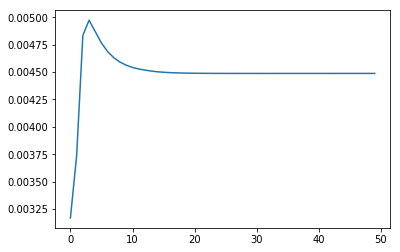

[0.0031701445808565544, 0.003737144956264421, 0.004833035197705758, 0.004972158356270299, 0.004868535641142421, 0.0047640205610192275, 0.004685765238400682, 0.004629777028498018, 0.004590053337170331, 0.004561912618803907, 0.0045419814377872635, 0.004527687332970077, 0.004517834199826043, 0.004508817140634745, 0.004502428944465828, 0.004497906670601652, 0.004494708032976186, 0.0044924481781752484, 0.00449085398924088, 0.004489731653098181, 0.0044889436417214715, 0.004488392374592794, 0.004488008623135942, 0.004487743280726612, 0.004487561521402042, 0.004487438653946315, 0.004487357179273714, 0.004487304701863365, 0.004487272447369093, 0.004487254210475398, 0.004487245608132831, 0.004487243549547539, 0.004487245860021745, 0.004487251013997836, 0.004487257945615967, 0.004487265914291922, 0.004487274409349082, 0.004487283082371546, 0.004487291699233859, 0.0044873001060969295, 0.004487308205316506, 0.004487315938386782, 0.004487323273876199, 0.0044873301989054705, 0.004487336713138335, 0.0

In [13]:
xx = np.array([8, 20])
yy = np.array([3, 15])
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]
corr = 0.9         # correlation
covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 

m = np.random.multivariate_normal(means, covs, 800).T

xx = np.array([10, 50])
yy = np.array([4, 30])
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]
corr = 0.5         # correlation
covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 

m2 = np.random.multivariate_normal(means, covs, 800).T

inp = []
for i in range(800):
    a1 =  [m2[0][i],  m[1][i]]
    a2 =  [m[0][i],  m2[1][i]]
    a3 = a1 + a2
    a3 /= np.linalg.norm(a3)
    inp.append(np.transpose([a3]))
    
np.set_printoptions(suppress=True)
neuron_list = [4,2,4]
nn = Autoencoder(neuron_list)
err = nn.train(inp,inp, 50)
plt.plot(err)
plt.show()
print(err)